<a href="https://colab.research.google.com/github/sivasurasani/Material-Science-Research/blob/main/25062024_code_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Static variables

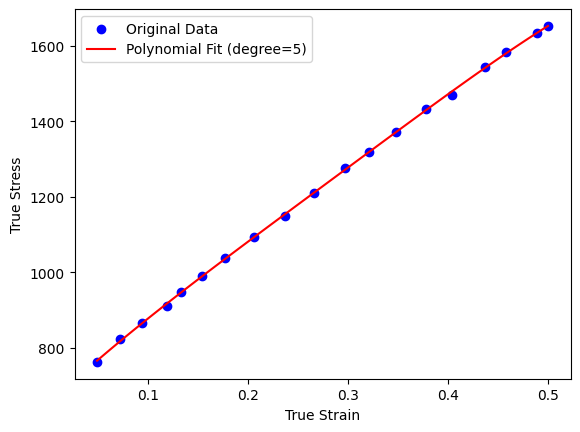

    t.strain     t.stress    hard.Rate
0   0.048828   766.088533  2262.099088
1   0.053386   776.399359  2246.082838
2   0.057944   786.637182  2230.607255
3   0.062502   796.804466  2215.665679
4   0.067061   806.903645  2201.251285
5   0.071619   816.937123  2187.357090
6   0.076177   826.907269  2173.975948
7   0.080735   836.816423  2161.100551
8   0.085293   846.666890  2148.723429
9   0.089851   856.460941  2136.836952
10  0.094409   866.200812  2125.433325
11  0.098967   875.888705  2114.504595
12  0.103525   885.526784  2104.042644
13  0.108083   895.117177  2094.039195
14  0.112641   904.661973  2084.485808
15  0.117199   914.163224  2075.373880
16  0.121758   923.622942  2066.694648
17  0.126316   933.043099  2058.439187
18  0.130874   942.425627  2050.598410
19  0.135432   951.772417  2043.163069
20  0.139990   961.085315  2036.123752
21  0.144548   970.366128  2029.470888
22  0.149106   979.616617  2023.194743
23  0.153664   988.838498  2017.285421
24  0.158222   998.033444

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the work hardening function
def work_hardening(true_stress, true_strain):
    if len(true_stress) != len(true_strain):
        raise ValueError("true_stress and true_strain must have the same length")

    if len(true_stress) < 2:
        return np.array([])

    work_hardening_rate = np.diff(true_stress) / np.diff(true_strain)
    return work_hardening_rate

# Read the Excel file
data = pd.read_excel('Eng Values.xlsx')
if 't.stress' not in data.columns and 't.strain' not in data.columns:
    data['t.stress'] = data['eng.stress'] * (1 + data['eng.strain'])
    data['t.strain'] = np.log(1 + data['eng.strain'])

# Choose the degree of the polynomial
degree = 5

# Perform the polynomial fit using the correct column names
coefficients = np.polyfit(data['t.strain'], data['t.stress'], degree)

# Create a polynomial function from the coefficients
polynomial = np.poly1d(coefficients)

# Generate 100 evenly spaced values over the range of the original true strain values
new_true_strain = np.linspace(data['t.strain'].min(), data['t.strain'].max(), 100)

# Evaluate the polynomial at the new strain values
fitted_true_stress = polynomial(new_true_strain)

# Create a new DataFrame to store the fitted values
fitted_data = pd.DataFrame({
    't.strain': new_true_strain,
    't.stress': fitted_true_stress
})

# Optionally, plot the original data and the fitted polynomial
plt.scatter(data['t.strain'], data['t.stress'], label='Original Data', color='blue')
plt.plot(new_true_strain, fitted_true_stress, label=f'Polynomial Fit (degree={degree})', color='red')
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.legend()
plt.show()

# Calculate Work Hardening Rate
work_hardening_rate = work_hardening(fitted_true_stress, new_true_strain)

# Add NaN to make the length equal to the original arrays
work_hardening_rate_padded = np.append(work_hardening_rate, np.nan)
# Identify the first index where the work hardening rate starts to increase
first_index = 0
for i in range(1, len(work_hardening_rate_padded)):
    if work_hardening_rate_padded[i] < work_hardening_rate_padded[i - 1] and (work_hardening_rate_padded[i+1] < work_hardening_rate_padded[i]):
        break
    first_index = i

# Slice the DataFrame to include only the increasing portion
fitted_data = fitted_data.iloc[first_index:].reset_index(drop=True)

# Update the work hardening rate in the fitted data DataFrame
fitted_data['hard.Rate'] = np.append(work_hardening_rate[first_index:], np.nan)

# Save the fitted data to a new Excel file
fitted_data.to_excel('fitted_hard_rate_cal.xlsx', index=False)
print(fitted_data)

In [63]:
# # Define column names
x_axis = 't.strain'
y1_axis = 't.stress'
y2_axis = 'hard.Rate'

# Set the value of k for spline interpolation
k_value = 5

ee = 0.001

# Excel data file path
file_path = '/content/fitted_hard_rate_cal.xlsx'

# PDF path for the research paper
pdf_file_path = "/content/rs.pdf"

# link to the research paper
link = "http://www/google.com"


# Keywords to search for
keywords = {"stress", "strain", "additive manufacturing", "cast", "forge", "powder", "rolling", "extrusion"}


# All import statments

In [64]:
# Install PyPDF2 package
!pip install PyPDF2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, CubicSpline
import re
from PyPDF2 import PdfReader
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import string
import json
import os
import PyPDF2


# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

- The above code block assigns the values to variables.
- x_axis: column name of the x-axis in Excel sheet
- y_axis: column name of the y-axis in Excel sheet
- k_value is the polynomial degree which will be used to find the b0 value.
- flie_path: The path of the Excel sheet
- pdf_file_path: The file path of the research paper (format as pdf)
- keywords: An array of keywords that you wish to find in the research paper.



In [51]:
from google.colab import drive
import os
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Directory containing all the data folders
data_directory = "/content/drive/MyDrive/Colab Notebooks/Material_Science/allData"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Find best paraameters

In [ ]:
# Changing the data points to change accomodate the current implementation



# Find Best B0 in a method

In [65]:
def calculate_b0_range(file_path, x_axis, y2_axis, k_value):


    # Read Excel file
    df = pd.read_excel(file_path)

    # Remove the last row
    df = df.drop(df.tail(2).index)

    # Extract x and y columns
    x = df[x_axis].values
    y = df[y2_axis].values

    # Check for and handle NaN or infinite values
    mask = np.isfinite(x) & np.isfinite(y)
    x = x[mask]
    y = y[mask]
    threshold = 10
    # Extract x and y values
    indication = 1
    for k in range(1, len(y)):
      if(y[k] > y[k - 1]):
        indication = 0
    if indication == 1:
      # Identify where the differences in y-values are below the threshold
      y_diff = np.diff(y)
      close_indices = np.where(np.abs(y_diff) < threshold)[0]
      clusters = []
      current_cluster = [close_indices[0]]

      for i in range(1, len(close_indices)):
          if close_indices[i] == close_indices[i-1] + 1:
              current_cluster.append(close_indices[i])
          else:
              if len(current_cluster) > 1 and current_cluster[0] != 0:  # Only add clusters with more than one point and not the initial indices
                  clusters.append(current_cluster)
              current_cluster = [close_indices[i]]
      if len(current_cluster) > 1 and current_cluster[0] != 0:  # Add the last cluster if it has more than one point and not the initial indices
          clusters.append(current_cluster)

      # Find the longest cluster
      longest_cluster = max(clusters, key=len)
      # print(longest_cluster)
      count = 0
      total_count = len(longest_cluster) // 2
      for i in longest_cluster:
        if(count < total_count):
          y[i] = y[i-1] + 3
        else:
          y[i] = y[i-1] - 15
    # Perform cubic spline interpolation
    spline_interp = make_interp_spline(x, y, k=k_value)

    # Generate new x values for interpolation
    x_new = np.linspace(min(x), max(x), 100)

    # Perform interpolation
    y_new = spline_interp(x_new)

    # Fit cubic polynomial to the entire dataset
    coefficients = np.polyfit(x, y, k_value)

    # Print the coefficients
    print("Cubic Polynomial Coefficients:", coefficients)

    # Generate y values for the cubic polynomial
    y_cubic = np.polyval(coefficients, x_new)

    # Dynamic equation print
    cubic_equation = "Polynomial Equation: "
    for i, coef in enumerate(coefficients):
        cubic_equation += f"{coef:.6f} x^{k_value-i} + " if i < k_value else f"{coef:.6f}"
    print()

    # Remove the trailing ' + ' at the end
    cubic_equation = cubic_equation.rstrip(' + ')
    print(cubic_equation)
    print()

    # Take the derivative of the polynomial
    derivative_coefficients = np.polyder(coefficients)

    # Dynamic equation print for the derivative
    derivative_equation = "Derivative Equation: "
    for i, coef in enumerate(derivative_coefficients):
        derivative_equation += f"{coef:.6f} x^{k_value-1 -i} + " if i < k_value-1 else f"{coef:.6f}"

    # Remove the trailing ' + ' at the end
    derivative_equation = derivative_equation.rstrip(' + ')
    print(derivative_equation)
    print()

    # Find the roots (zeros) of the derivative equation
    roots = np.roots(derivative_coefficients)
    print("Roots (Zeros) of the Derivative Equation:", roots)
    print()

    # Calculate y values for each root using the original cubic polynomial
    y_roots = np.polyval(coefficients, roots)

    # Print the corresponding y values for the roots
    for i, root in enumerate(roots):
        print(f"For x = {root:.6f}, y = {y_roots[i]:.6f}")
    print()

    # Plot the original data, interpolated curve, and cubic polynomial
    plt.scatter(x, y, label='Original Data')
    plt.plot(x_new, y_new, label='Interpolated Curve', color='red')
    plt.plot(x_new, y_cubic, label='Polynomial', linestyle='dashed', color='green')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.title('Interpolation and Polynomial Fit')
    plt.show()

    # Filter out the original y values and assign them back
    y_roots = [np.real(y_roots[i]) for i in range(len(roots)) if np.isclose(np.imag(y_roots[i]), 0)]

    # Print the corresponding y values for the original roots
    print("Original Y Values for the Roots:")
    for root, y_value in zip(roots, y_roots):
        if np.isclose(np.imag(y_value), 0):
            print(f"For x = {root:.6f}, y = {y_value:.6f}")
    print()

    # Sort the y_roots array
    y_roots_sorted = np.sort(y_roots)

    # Find the differences between consecutive roots
    differences = np.diff(y_roots_sorted)

    # Find the index of the minimum difference
    min_diff_index = np.argmin(differences)

    # Determine the indices of the two closest roots
    index1 = min_diff_index
    index2 = min_diff_index + 1

    # Store the minimum and maximum values
    min_b0 = min(y_roots_sorted[index1], y_roots_sorted[index2])
    max_b0 = max(y_roots_sorted[index1], y_roots_sorted[index2])

    print("Minimum b0:", min_b0)
    print("Maximum b0:", max_b0)

    # Round down min_b0 to the nearest hundred
    rounded_min_b0 = int(min_b0 // 100) * 100

    # Calculate from_b0 and to_b0
    from_b0 = rounded_min_b0 - 100
    to_b0 = rounded_min_b0 + 200

    # Print from_b0 and to_b0
    print("From_b0:", from_b0)
    print("To_b0:", to_b0)

    return from_b0, to_b0




- The above code find the best b0_value.
- Step 1: Generate a polynomial equation of k degree.
- Step 2: Find the derivative of that equation.
- Step 3: Find the roots of that derivative.
- Step 4: Substitute the roots in the original equation to get the b0_values.
- The number of b0_values that you get is k-1.

- The above code extracts the original b0_values.
- The 2 y values that are close to each other are the original values out of all the values.

- To get accurate b0_values we consider some values which are less than and greater than b0_values.

# Find Best D1 in a method

In [66]:
def calculate_min_max_slope(file_path, x_axis, y2_axis):

    # Set display options to show all rows and columns
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)

    # Define the column names
    column_names = [x_axis, y2_axis]

    # Read only the specified columns from Excel file
    data = pd.read_excel(file_path, usecols=column_names)

    # Drop rows with missing or non-finite values
    data.dropna(inplace=True)
    threshold = 10
    # Extract x and y values
    x = data[column_names[0]].values
    y = data[column_names[1]].values
    indication = 1
    for k in range(1, len(y)):
      if(y[k] > y[k - 1]):
        indication = 0
    if indication == 1:
      # Identify where the differences in y-values are below the threshold
      y_diff = np.diff(y)
      close_indices = np.where(np.abs(y_diff) < threshold)[0]
      clusters = []
      current_cluster = [close_indices[0]]

      for i in range(1, len(close_indices)):
          if close_indices[i] == close_indices[i-1] + 1:
              current_cluster.append(close_indices[i])
          else:
              if len(current_cluster) > 1 and current_cluster[0] != 0:  # Only add clusters with more than one point and not the initial indices
                  clusters.append(current_cluster)
              current_cluster = [close_indices[i]]
      if len(current_cluster) > 1 and current_cluster[0] != 0:  # Add the last cluster if it has more than one point and not the initial indices
          clusters.append(current_cluster)

      # Find the longest cluster
      longest_cluster = max(clusters, key=len)
      # print(longest_cluster)
      count = 0
      total_count = len(longest_cluster) // 2
      for i in longest_cluster:
        if(count < total_count):
          y[i] = y[i-1] + 3
        else:
          y[i] = y[i-1] - 15
        count += 1
    # Fit a cubic spline to the data
    cs = CubicSpline(x, y)

    # Calculate the slope for each data point
    slopes = cs(x, 1)

    # Print the slopes along with their corresponding x and y values
    print("Point   |   x       |   y       |   Slope")
    print("---------------------------------------------")
    for i, (x_val, y_val, slope_val) in enumerate(zip(x, y, slopes)):
        print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {slope_val:.3f}")

    # Plot the original data and cubic spline
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'bo', label='Data')
    plt.plot(x, cs(x), 'r-', label='Cubic Spline')
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
    plt.title('Original Data and Cubic Spline Fit')
    plt.legend()

    plt.show()

    # Filter out negative slopes and their corresponding x, y values
    positive_slope_indices = np.where(slopes > 0)[0]
    # if(positive_slope_indices == [] or positive_slope_indices is None):

    x_positive = x[positive_slope_indices]
    y_positive = y[positive_slope_indices]
    # Calculate the differences between consecutive slopes
    slope_diffs = np.diff(slopes[positive_slope_indices])

    # Consider only the first 10 values or the available maximum
    max_values = min(5, len(x_positive))
    x_positive = x_positive[:max_values]
    y_positive = y_positive[:max_values]
    slope_diffs = slope_diffs[:max_values-1]  # As there are max_values-1 differences for max_values values

    # Initialize an empty array to store the slopes for which the information is printed
    printed_slopes = []

    # Plot the original data and cubic spline
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'bo', label='Data')
    plt.plot(x, cs(x), 'r-', label='Cubic Spline')
    plt.xlabel(column_names[0])
    plt.ylabel(column_names[1])
    plt.title('Original Data and Cubic Spline Fit')
    plt.legend()

    # Add point numbers with a gap above the points in the plot
    gap = 50  # Adjust the gap as needed
    for i, (x_val, y_val) in enumerate(zip(x_positive, y_positive)):
        plt.text(x_val, y_val + gap, f"{i+1}", fontsize=10, ha='center', va='center')
        printed_slopes.append(slopes[positive_slope_indices][i])

    plt.grid(True)

    # Store data point, x, y, and its difference in a new array
    data_and_differences = np.column_stack((x_positive[:-1], y_positive[:-1], slope_diffs, printed_slopes[:-1]))

    print("Data Point | x Value | y Value | Difference | Slope:")
    print("----------------------------------------------------")
    for i, (x_val, y_val, diff, slope) in enumerate(data_and_differences):
        print(f"{i+1}       |   {x_val:.3f}   |   {y_val:.3f}   |   {diff:.3f}   |   {slope:.3f}")

    # Calculate the average of the slopes
    average_slope_printed = np.mean(printed_slopes[:-1])
    print("\nAverage Slope of Printed Slopes:", average_slope_printed)

    plt.show()

    max_d1 = printed_slopes[0]
    min_d1 = printed_slopes[0]

    # Iterate through printed slopes to find max and min
    for slope in printed_slopes[1:]:
        if slope > max_d1:
            max_d1 = slope
        elif slope < min_d1:
            min_d1 = slope

    # Print the maximum and minimum slopes
    print("\nMinimum Slope:", min_d1)
    print("Maximum Slope:", max_d1)

    return min_d1, max_d1

- The above code generate the slopes of the curve at each data points.

- The above code calculates the difference between consecutive slopes.

- The above code narrow down the slopes.
- It finds the slope where there is a rapid change in the first part of the curve, the d1 ranges somewhere near that slope.

- The above code finds the average slope out of the narrowed slopes.

- The above considers the maximum and minimum slopes in the narrowed slopes.
- The d1 lies between the minimum and maximum slope.

# Find all best parametes in a methods

In [67]:
def find_best_parameters(file_path, x_axis, y2_axis, from_b0, to_b0, min_d1, max_d1, ee):

    # Read data from Excel file using global file_path, x_axis, and y2_axis
    data = pd.read_excel(file_path)
    original_results = data[y2_axis].values
    ep_values = data[x_axis].values

    # Define function to calculate MSE
    def calculate_mse(b0, d1, d2, ei):
        calculated_results = []
        for ep in ep_values:
            if abs((ep - ei) / (ei + ee)) < 1:
                result = b0 - d1 * ((abs((ep - ei) / (ei + ee)) * np.arctanh((ep - ei) / (ei + ee))) - (d2 * ((ep - ei) / (ei + ee))))
                calculated_results.append(result)
            else:
                calculated_results.append(None)  # Handle cases where the condition is not met
        valid_results = [result for result in calculated_results if result is not None]  # Filter out None values
        mse = np.mean((np.array(original_results[:len(valid_results)]) - np.array(valid_results)) ** 2)
        euclidean_distance = np.sqrt(np.sum([(x - y) ** 2 for x, y in zip(original_results, valid_results)]))
        return euclidean_distance

    # Initialize variables to store best parameters
    best_b0 = None
    best_d1 = None
    best_d2 = None
    best_ei = None
    min_mse = float('inf')

    # Nested loops to iterate over B0, D1, D2, and Ei values using global from_b0, to_b0, min_d1, max_d1
    for b0_value in range(from_b0, to_b0, 10):
        for d1_value in np.arange(min_d1, max_d1, 5):
            for d2_value in np.arange(0.2, 0.5, 0.05):
                for ei_value in np.arange(0.1, 0.285, 0.05):
                    mse_value = calculate_mse(b0_value, d1_value, d2_value, ei_value)
                    if mse_value < min_mse:
                        min_mse = mse_value
                        best_b0 = b0_value
                        best_d1 = d1_value
                        best_d2 = d2_value
                        best_ei = ei_value

    return best_b0, best_d1, best_d2, best_ei, min_mse




- The above code defines a method that calculates the mean square error (euclidean distance) based on the formula given in the paper which contains the 5 parameters.

- The above code runs loops to find the best parameter combination.
- The original points (given in the excel sheet) are compared with the y values that are generated by the equations.
- The combination which has least error is the best parameter combination.
- We have narrowed the b0 and d1 values which makes the loop run quickly and efficiently.

# Comparision graph in a method

In [68]:
def plot_comparison(file_path, x_axis, y2_axis, best_b0, best_d1, best_d2, ee, best_ei):

    # Read data from Excel file
    data = pd.read_excel(file_path)
    x_values = data[x_axis].values
    original_x_values = data[x_axis].values
    original_y_values = data[y2_axis].values

    # Define function to calculate y values
    def calculate(b0, d1, d2, ee, ei, ep):
        result = np.zeros_like(ep)
        for i in range(len(ep)):
            if abs((ep[i] - ei) / (ei + ee)) < 1:
                result[i] = b0 - d1 * ((abs((ep[i] - ei) / (ei + ee)) * np.arctanh((ep[i] - ei) / (ei + ee))) - (d2 * ((ep[i] - ei) / (ei + ee))))
        return result

    # Calculate y values using the provided function
    y_values = calculate(best_b0, best_d1, best_d2, ee, best_ei, x_values)

    # Plot x-y values
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, y_values, label='Calculated', color='blue')
    plt.plot(original_x_values, original_y_values, label='Original', color='red')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Comparison of Calculated and Original Data')
    plt.legend()
    plt.grid(True)
    plt.show()




Calculating B0 range...
Cubic Polynomial Coefficients: [-655042.95384303  730099.31701627 -334337.7864905    81137.68499332
   -9705.9987142     2565.69206301]

Polynomial Equation: -655042.953843 x^5 + 730099.317016 x^4 + -334337.786491 x^3 + 81137.684993 x^2 + -9705.998714 x^1 + 2565.692063

Derivative Equation: -3275214.769215 x^4 + 2920397.268065 x^3 + -1003013.359472 x^2 + 162275.369987 x^1 + -9705.998714

Roots (Zeros) of the Derivative Equation: [0.35902608+0.j         0.19930911+0.14786613j 0.19930911-0.14786613j
 0.13402157+0.j        ]

For x = 0.359026+0.000000j, y = 2290.200103+0.000000j
For x = 0.199309+0.147866j, y = 2116.362529+104.478826j
For x = 0.199309-0.147866j, y = 2116.362529-104.478826j
For x = 0.134022+0.000000j, y = 2124.641654+0.000000j



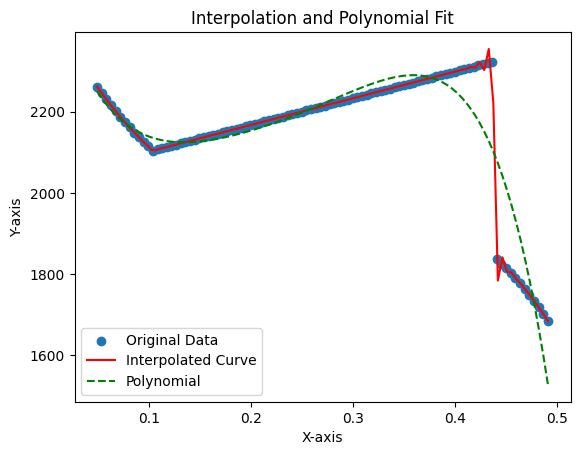

Original Y Values for the Roots:
For x = 0.359026+0.000000j, y = 2290.200103
For x = 0.199309+0.147866j, y = 2124.641654

Minimum b0: 2124.6416539826405
Maximum b0: 2290.2001034406894
From_b0: 2000
To_b0: 2300
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.049   |   2262.099   |   -3573.606
2       |   0.053   |   2246.083   |   -3454.266
3       |   0.058   |   2230.607   |   -3336.372
4       |   0.063   |   2215.666   |   -3219.971
5       |   0.067   |   2201.251   |   -3105.024
6       |   0.072   |   2187.357   |   -2991.855
7       |   0.076   |   2173.976   |   -2879.418
8       |   0.081   |   2161.101   |   -2771.792
9       |   0.085   |   2148.723   |   -2653.915
10       |   0.090   |   2136.837   |   -2582.171
11       |   0.094   |   2125.433   |   -2346.297
12       |   0.099   |   2114.505   |   -2731.172
13       |   0.104   |   2104.043   |   -807.761
14       |   0.

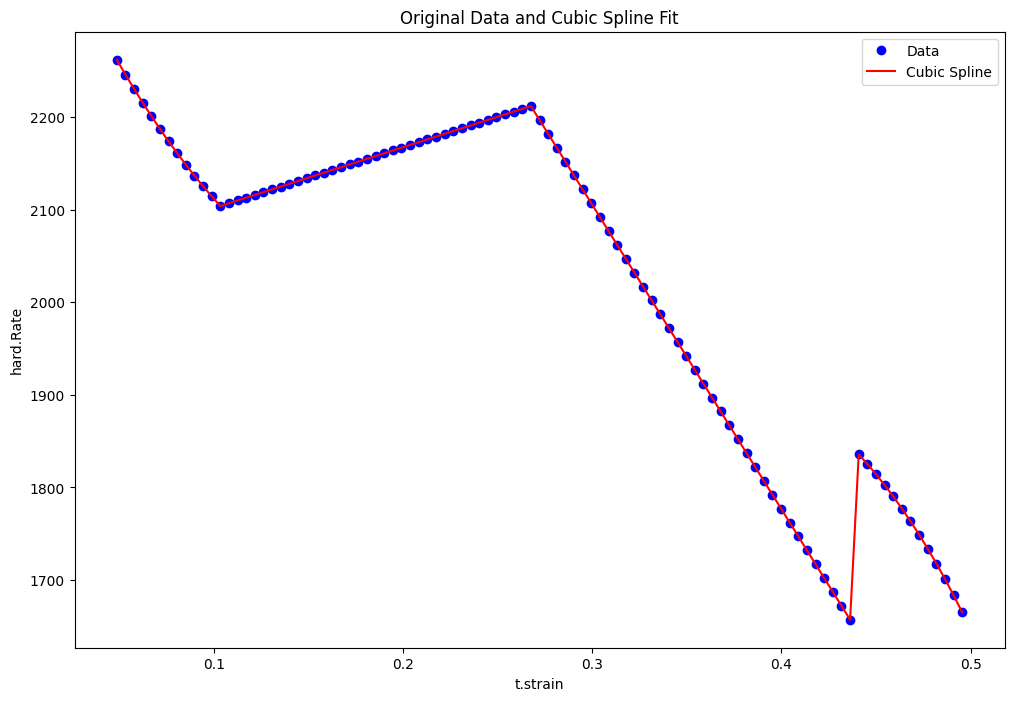

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.108   |   2107.043   |   -498.045   |   1050.967
2       |   0.113   |   2110.043   |   133.451   |   552.923
3       |   0.117   |   2113.043   |   -35.758   |   686.373
4       |   0.122   |   2116.043   |   9.581   |   650.615

Average Slope of Printed Slopes: 735.21978906808


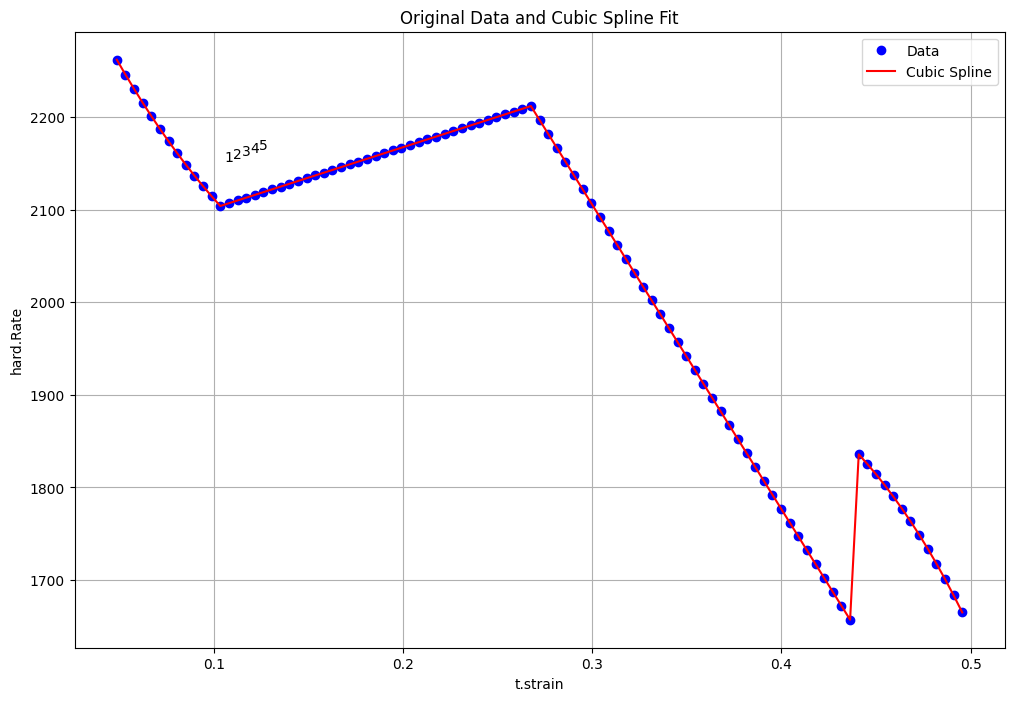


Minimum Slope: 552.9227929764406
Maximum Slope: 1050.9674483659905
Finding best parameters...
Plotting comparison...


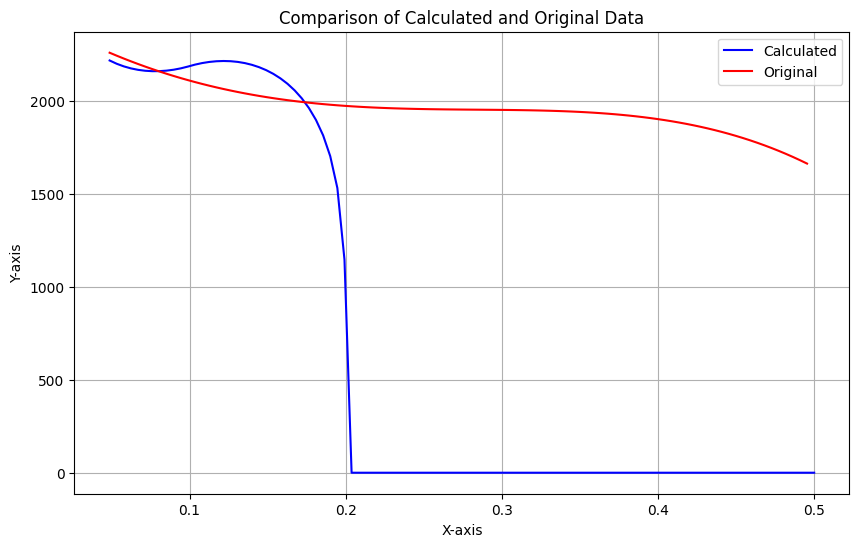

In [71]:
print("Calculating B0 range...")
# Calculate range for B0
from_b0, to_b0 = calculate_b0_range(file_path, x_axis, y2_axis, k_value)

print("Calculating min and max slope values for D1...")
# Calculate min and max slope values for D1
min_d1, max_d1 = calculate_min_max_slope(file_path, x_axis, y2_axis)
print("Finding best parameters...")
# Find best parameters
# max_d1 = 7000
# best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(from_b0, to_b0, min_d1, max_d1)
best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(file_path, x_axis, y2_axis, from_b0, to_b0, min_d1, max_d1, ee)

print("Plotting comparison...")
# Plot comparison
plot_comparison(file_path, x_axis, y2_axis, best_b0, best_d1, best_d2, ee, best_ei)

- In the above code we compare the original graph with the graph values generated by the equation from the parameters we found in the above step.

# Extrract Keywords in a method

In [56]:
def extract_and_find_lemmas(pdf_file_path, keywords):
    all_lemmas = []

    # Parse the PDF and extract text
    text = ""
    try:
        with open(pdf_file_path, "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)
            num_pages = len(pdf_reader.pages)
            for page_number in range(num_pages):
                text += pdf_reader.pages[page_number].extract_text()
    except PyPDF2.utils.PdfReadError as e:
        print("Error reading PDF file:", e)
        return None, None
    except Exception as e:
        print("An error occurred:", e)
        return None, None

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words and punctuation, and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    for word in words:
        if word.lower() not in stop_words and word not in string.punctuation:
            lemma = lemmatizer.lemmatize(word, pos=get_wordnet_pos(word))
            for keyword in keywords:
                if keyword in lemma and lemma not in all_lemmas:
                    all_lemmas.append(lemma)

    return text, all_lemmas

# Function to map POS tag to first character lemmatize() accepts
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)





- The above code reads the pdf paper and extracts the keywords using natural language processing libraries.

# Extract the chemical composition in a method

In [57]:
def extract_chemical_compositions_from_pdf(pdf_file_path, min_length=8):
    with open(pdf_file_path, 'rb') as file:
        reader = PdfReader(file)
        text = ''
        for page in reader.pages:
            text += page.extract_text()

    return extract_chemical_compositions(text, min_length)

def extract_chemical_compositions(text, min_length=8):
    pattern = r'\b(?:[A-Z][a-z]?\d*(?:\.\d+)?)+\b'
    chemical_compositions = re.findall(pattern, text)
    # Filter compositions based on minimum length
    chemical_compositions = [comp for comp in chemical_compositions if len(comp) >= min_length]
    return chemical_compositions

def combine_words(text):
    # Split the text into individual words
    words = text.split()

    # Iterate through the words
    i = 0
    while i < len(words) - 1:
        # Check if the current word ends with a number and the next word starts with a character
        if words[i][-1].isdigit() and words[i+1][0].isalpha():
            # Combine the words
            words[i] += words[i+1]
            # Remove the next word
            del words[i+1]
        # Check if the current word ends with a character and the next word starts with a number
        elif words[i][-1].isalpha() and words[i+1][0].isdigit():
            # Combine the words
            words[i] += words[i+1]
            # Remove the next word
            del words[i+1]
        else:
            # Move to the next pair of words
            i += 1

    # Join the words back into a single string
    combined_text = ' '.join(words)
    return combined_text

import re

def create_element_dictionary(chemical_composition):
    # Initialize an empty dictionary to store key-value pairs
    elements = {}

    # Split the composition string into element symbol and numeric value pairs
    # The regular expression (\D+)(\d*\.?\d*) matches non-digit characters (element symbols) followed by optional digits (numeric values)
    matches = re.findall(r'([A-Z][a-z]?)(\d*\.?\d*)', chemical_composition)

    # Iterate through the matches
    for match in matches:
        # Extract the element symbol
        element = match[0]

        # Extract the numeric value, or 0 if not provided
        value = float(match[1]) if match[1] else 1.0

        # Add the element and its value to the dictionary
        elements[element] = value

    return elements




def find_max_size_chemical(text ,pdf_file_path):
    chemicals = extract_chemical_compositions_from_pdf(pdf_file_path)
    combined_text = combine_words(text)
    chemicals = extract_chemical_compositions(combined_text)
    print()
    print(chemicals)
    if not chemicals:
        print("No chemical compositions found in the text.")
        return None
    max_size_chemical = max(chemicals, key=len)
    print("\nMaximum sized chemical composition:", max_size_chemical)
    element_dict = create_element_dictionary(max_size_chemical)
    return element_dict




- The above code also uses a regular expression to extract the chemical composition from the paper.
- The largest composition is considered (assumed) as the main checmical composition.

- Convert the chemical composition into a key-value pair of element and number.

# Create of Update JSON file

In [58]:
def update_json_data(json_file_path, new_details):
    """
    Update existing JSON data with new details and write back to the JSON file.

    Args:
        json_file_path (str): Path to the JSON file.
        new_details (dict): Dictionary containing the new details to insert/update.
    """
    # Check if the JSON file exists
    if os.path.exists(json_file_path):
        # Read the existing JSON data if the file exists
        with open(json_file_path, 'r') as json_file:
            existing_data = json.load(json_file)
    else:
        # If the file doesn't exist, initialize existing_data as an empty list
        existing_data = []

    # Remove the 'id' field if present in new_details
    if 'id' in new_details:
        del new_details['id']

    # Append new details to existing list
    existing_data.append(new_details)

    # Write the updated data back to the JSON file
    with open(json_file_path, 'w') as json_file:
        json.dump(existing_data, json_file, indent=4)

    print("Data has been updated in", json_file_path)


- The above code creates the JSON file if it does not exist and reads the data from it if it exists.

# Call all the methods

In [59]:
def analyze_pdf_data(file_path, pdf_file_path, keywords, x_axis, y2_axis, k_value):
    print("Calculating B0 range...")
    # Calculate range for B0
    from_b0, to_b0 = calculate_b0_range(file_path, x_axis, y2_axis, k_value)

    print("Calculating min and max slope values for D1...")
    # Calculate min and max slope values for D1
    min_d1, max_d1 = calculate_min_max_slope(file_path, x_axis, y2_axis)

    print("Finding best parameters...")
    # Find best parameters
    # best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(from_b0, to_b0, min_d1, max_d1)
    best_b0, best_d1, best_d2, best_ei, min_mse = find_best_parameters(file_path, x_axis, y2_axis, from_b0, to_b0, min_d1, max_d1, ee)

    print("Plotting comparison...")
    # Plot comparison
    plot_comparison(file_path, x_axis, y2_axis, best_b0, best_d1, best_d2, ee, best_ei)

    print("Extracting text and finding lemmas...")
    # Extract text and find lemmas
    text, all_lemmas = extract_and_find_lemmas(pdf_file_path, keywords)

    print("Finding max size chemical composition...")
    # Find max size chemical composition
    element_dict = find_max_size_chemical(text, pdf_file_path)

    return {
        "best_b0": best_b0,
        "best_d1": best_d1,
        "best_d2": best_d2,
        "best_ei": best_ei,
        "all_lemmas": all_lemmas,
        "element_dict": element_dict
    }


- The above code stores the above data in the json file.
- The above data can be modified as required.

# Read multiple files


Skipping file: .DS_Store, it is not a folder.

PROCESSING FOLDER: paper-1
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-1/Data.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-1/8.pdf
Found text file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-1/readme.txt
Calculating B0 range...
Cubic Polynomial Coefficients: [-3.44658068e-02 -9.90763649e+06  2.27587513e+06 -1.51960796e+04
 -2.26947340e+04  3.70465517e+03]

Polynomial Equation: -0.034466 x^5 + -9907636.485310 x^4 + 2275875.125148 x^3 + -15196.079623 x^2 + -22694.734015 x^1 + 3704.655165

Derivative Equation: -0.172329 x^4 + -39630545.941239 x^3 + 6827625.375443 x^2 + -30392.159246 x^1 + -22694.734015

Roots (Zeros) of the Derivative Equation: [-2.29970221e+08  1.35363472e-01  8.60703068e-02 -4.91518882e-02]

For x = -229970220.699711, y = -5542254546637033430043483773431367860224.000000
For x = 0.135363, y = 2672.619793
For x

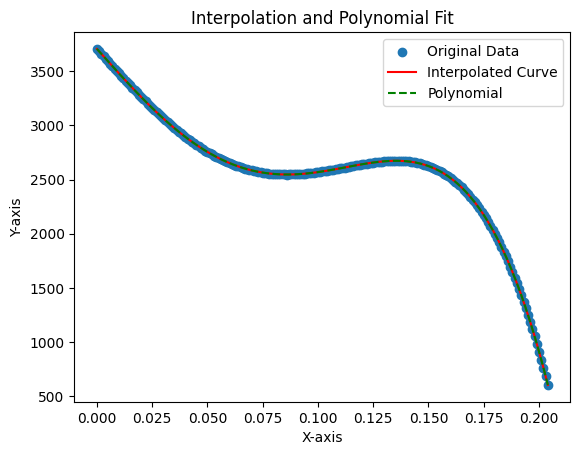

Original Y Values for the Roots:
For x = -229970220.699711, y = -5542254546637033430043483773431367860224.000000
For x = 0.135363, y = 2672.619793
For x = 0.086070, y = 2546.145410
For x = -0.049152, y = 4455.352751

Minimum b0: 2546.145409892201
Maximum b0: 2672.61979269077
From_b0: 2400
To_b0: 2700
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   3704.655   |   -22694.776
2       |   0.001   |   3681.948   |   -22718.327
3       |   0.002   |   3659.223   |   -22728.528
4       |   0.003   |   3636.495   |   -22725.530
5       |   0.004   |   3613.776   |   -22709.598
6       |   0.005   |   3591.080   |   -22680.958
7       |   0.006   |   3568.418   |   -22639.852
8       |   0.007   |   3545.804   |   -22586.519
9       |   0.008   |   3523.249   |   -22521.194
10       |   0.009   |   3500.766   |   -22444.116
11       |   0.010   |   3478.365   |   -22355.524
12       | 

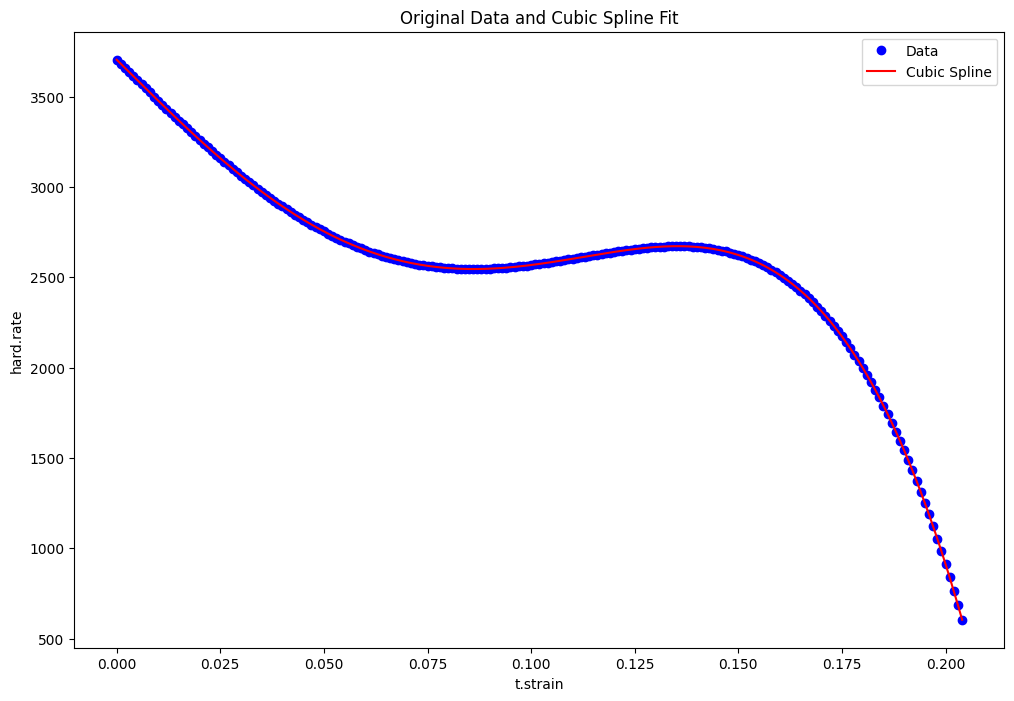

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.087   |   2546.259   |   254.168   |   242.612
2       |   0.088   |   2546.629   |   246.898   |   496.780
3       |   0.089   |   2547.250   |   239.392   |   743.677
4       |   0.090   |   2548.114   |   231.645   |   983.070

Average Slope of Printed Slopes: 616.5346115587133


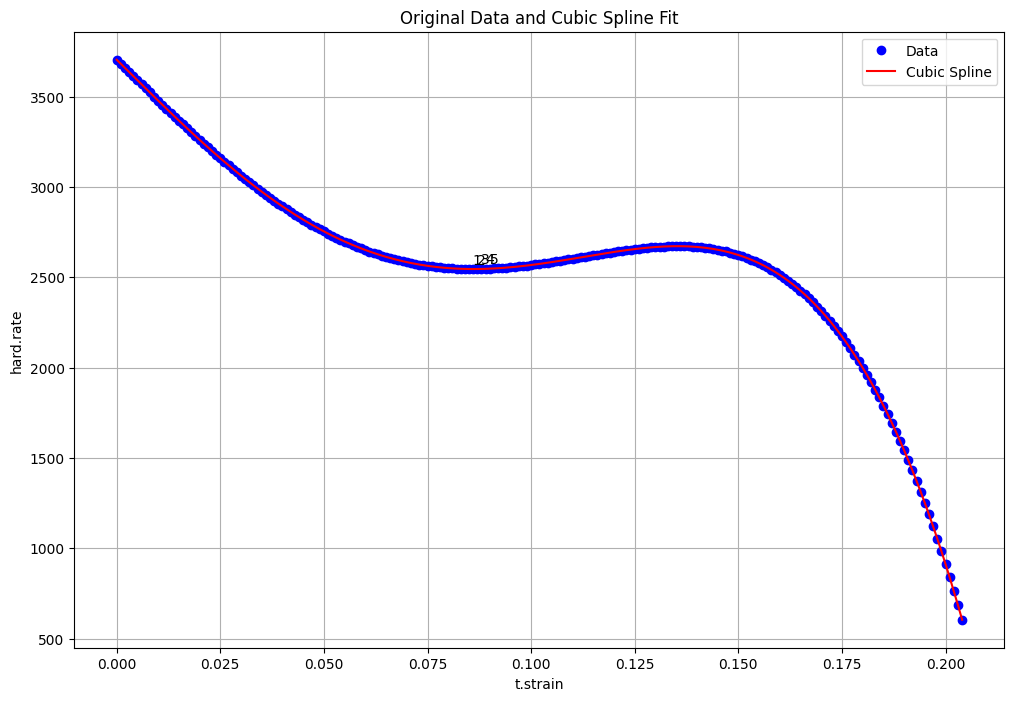


Minimum Slope: 242.61165902875788
Maximum Slope: 1214.7150006759255
Finding best parameters...
Plotting comparison...


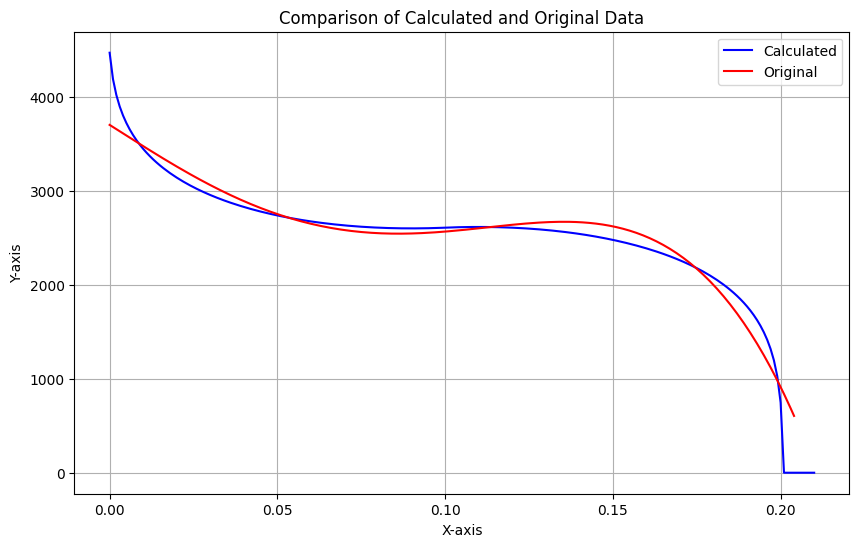

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe38.5Mn20Co20Cr15Si5Cu1.5', 'Fe50Mn30Co10Cr10HEA', 'Fe38.5Mn20Co20Cr15Si5Cu1.5', 'Fe38.5Mn20Co20Cr15Si5Cu1', 'S350S150D']

Maximum sized chemical composition: Fe38.5Mn20Co20Cr15Si5Cu1.5
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-2
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-2/Data.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-2/5.pdf
Found text file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-2/readme.txt
Calculating B0 range...
Cubic Polynomial Coefficients: [ 7.60822297e+00  1.95937980e+06 -1.56997099e+06  4.20104933e+05
 -4.54570940e+04  4.55780102e+03]

Polynomial Equation: 7.608223 x^5 + 1959379.804664 x^4 + -1569970.990355 x^3 + 420104.933471 x^2 + -45457.093975 x^1 + 4557.801024

Derivative Equation: 38.041115 x^4 + 7837519.218654 x^3 + -4709912.97

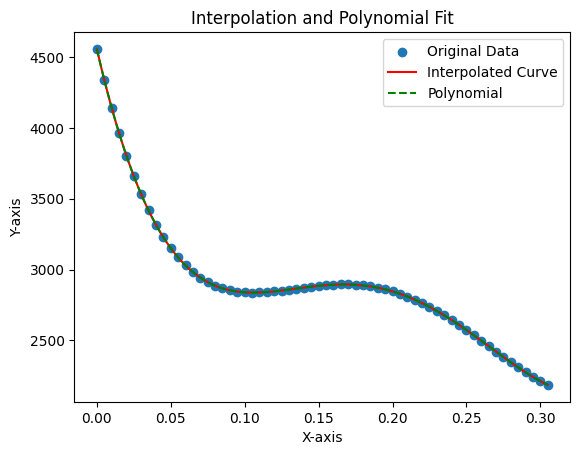

Original Y Values for the Roots:
For x = -206028.190990, y = 706087622000788120604246016.000000
For x = 0.328044, y = 2122.522112
For x = 0.167080, y = 2894.690660
For x = 0.105820, y = 2837.153081

Minimum b0: 2837.1530806493925
Maximum b0: 2894.690660304769
From_b0: 2700
To_b0: 3000
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   4557.801   |   -45456.015
2       |   0.005   |   4340.823   |   -41373.142
3       |   0.010   |   4143.690   |   -37518.015
4       |   0.015   |   3965.269   |   -33887.197
5       |   0.020   |   3804.455   |   -30474.197
6       |   0.025   |   3660.174   |   -27273.016
7       |   0.030   |   3531.381   |   -24278.140
8       |   0.035   |   3417.059   |   -21483.423
9       |   0.040   |   3316.223   |   -18882.969
10       |   0.045   |   3227.915   |   -16471.103
11       |   0.050   |   3151.208   |   -14241.620
12       |   0.055   |   30

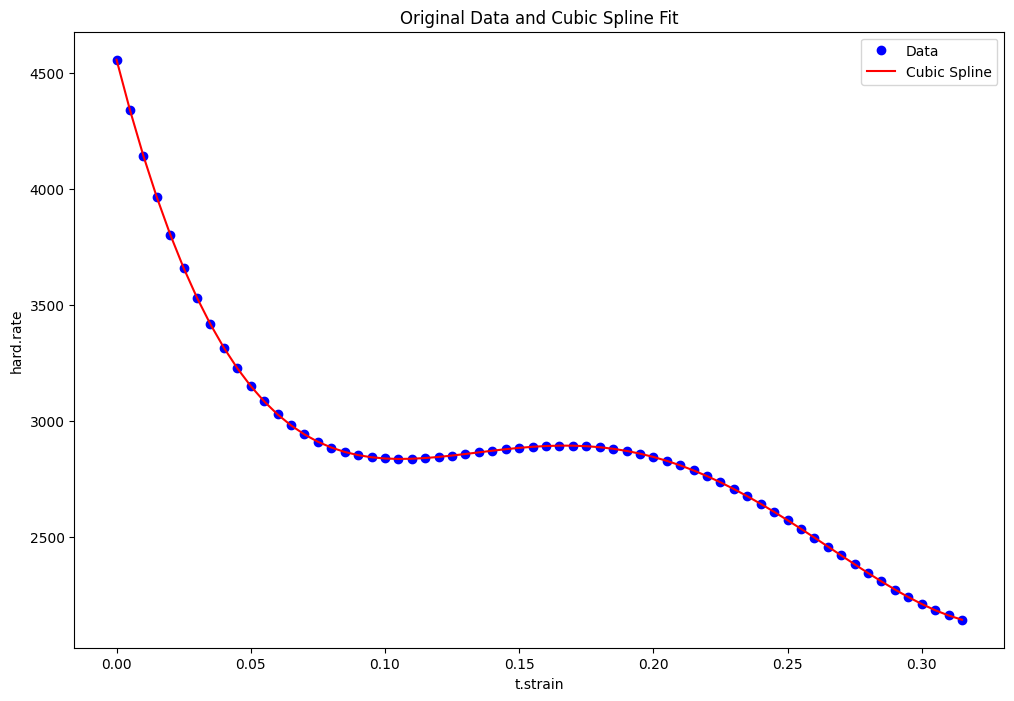

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.110   |   2838.032   |   390.475   |   407.807
2       |   0.115   |   2841.090   |   290.379   |   798.283
3       |   0.120   |   2845.848   |   195.809   |   1088.662
4       |   0.125   |   2851.819   |   107.186   |   1284.471

Average Slope of Printed Slopes: 894.8055814789032


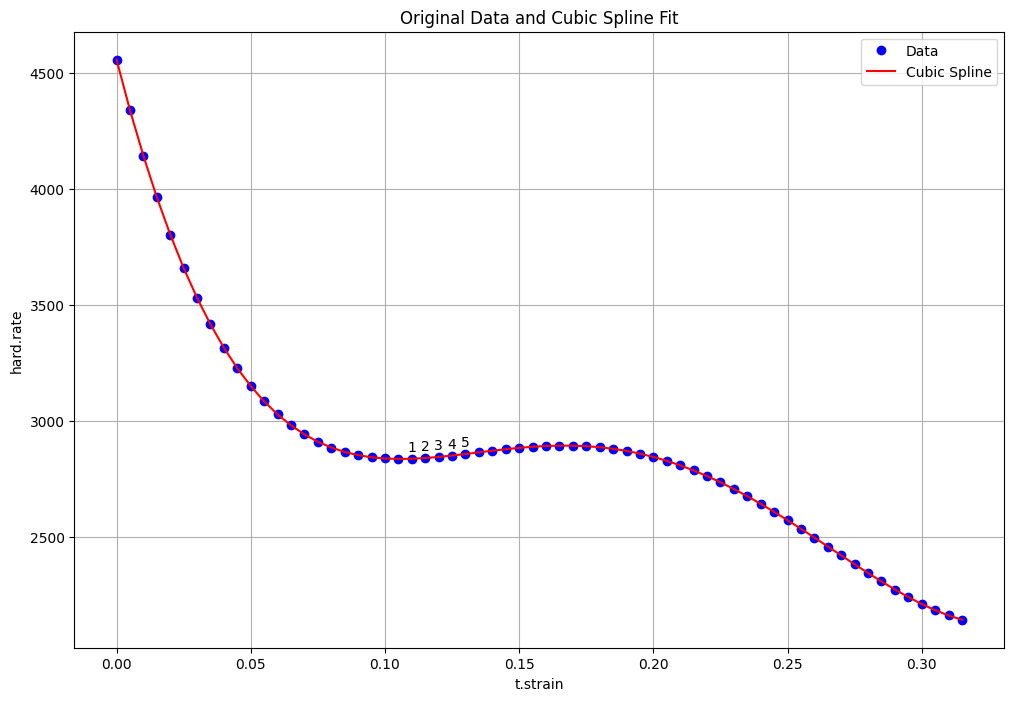


Minimum Slope: 407.8073942024265
Maximum Slope: 1391.6562578025782
Finding best parameters...
Plotting comparison...


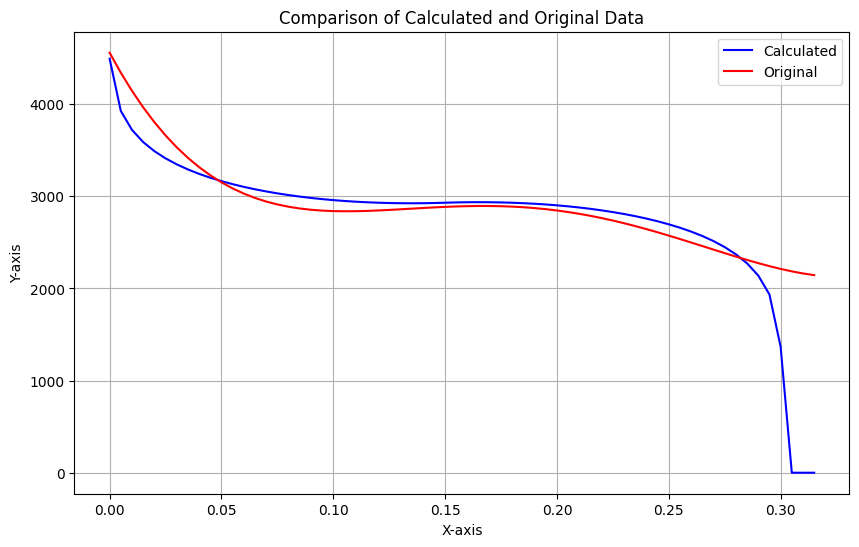

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe50Mn30Co10Cr10', 'Fe20Mn20Ni20Co20Cr20', 'Al1.5CoCr0.5FeNi0', 'FeMnNiCoCr', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'FSP350RPM', 'Fe50Mn30Co10Cr10', 'CoCrFeMnNi', 'Al0.1CoCrFeNi', 'CoCrFeMnNi']

Maximum sized chemical composition: Fe20Mn20Ni20Co20Cr20
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-4
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-4/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-4/Research Paper.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 2.83072127e-07  5.56582628e+05 -4.74958735e+05  1.42331938e+05
 -2.32862980e+04  3.08939599e+03]

Polynomial Equation: 0.000000 x^5 + 556582.628046 x^4 + -474958.734556 x^3 + 142331.938077 x^2 + -23286.297975 x^1 + 3089.395986



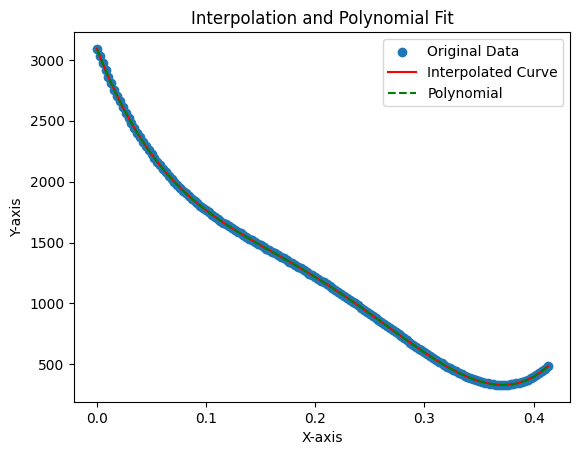

Original Y Values for the Roots:
For x = -1572977554891.968506+0.000000j, y = 681474712842366240750659776789858713583656125799071744.000000
For x = 0.371747+0.000000j, y = 331.653312

Minimum b0: 331.6533116933151
Maximum b0: 6.814747128423662e+53
From_b0: 200
To_b0: 500
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   3089.396   |   -23286.254
2       |   0.003   |   3029.112   |   -22547.250
3       |   0.005   |   2970.746   |   -21827.654
4       |   0.008   |   2914.249   |   -21127.314
5       |   0.011   |   2859.568   |   -20445.962
6       |   0.013   |   2806.656   |   -19783.362
7       |   0.016   |   2755.462   |   -19139.267
8       |   0.018   |   2705.938   |   -18513.436
9       |   0.021   |   2658.037   |   -17905.626
10       |   0.024   |   2611.712   |   -17315.592
11       |   0.026   |   2566.916   |   -16743.093
12       |   0.029   |   2523.603   |   -

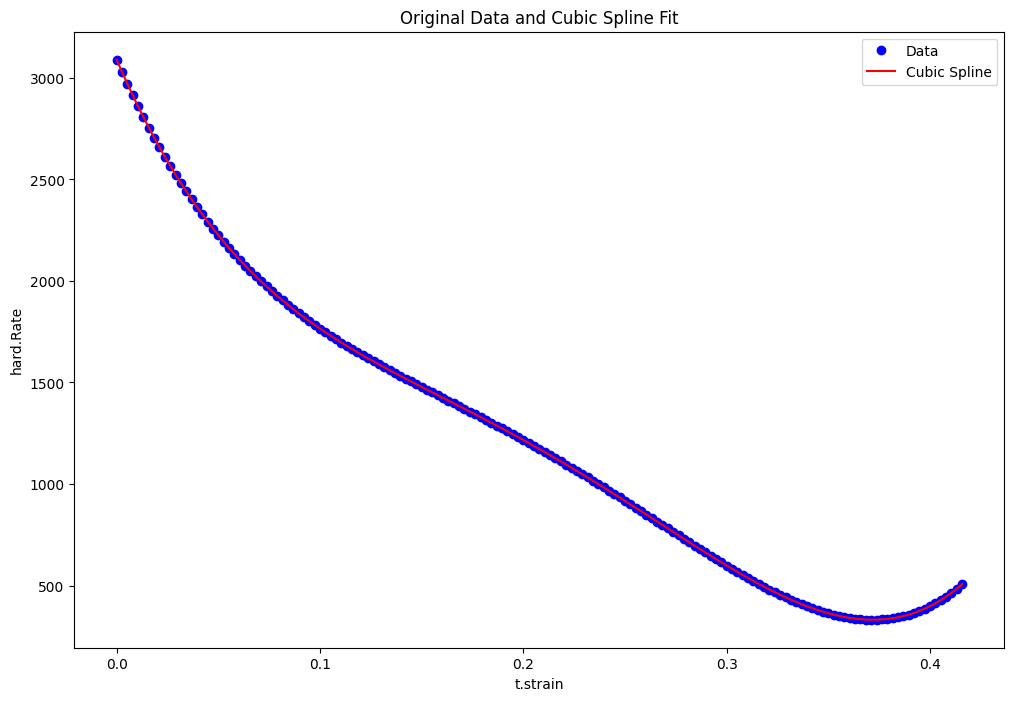

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.374   |   331.901   |   407.741   |   273.365
2       |   0.376   |   333.153   |   422.798   |   681.107
3       |   0.379   |   335.498   |   438.097   |   1103.904
4       |   0.381   |   338.975   |   453.640   |   1542.001

Average Slope of Printed Slopes: 900.0942523183573


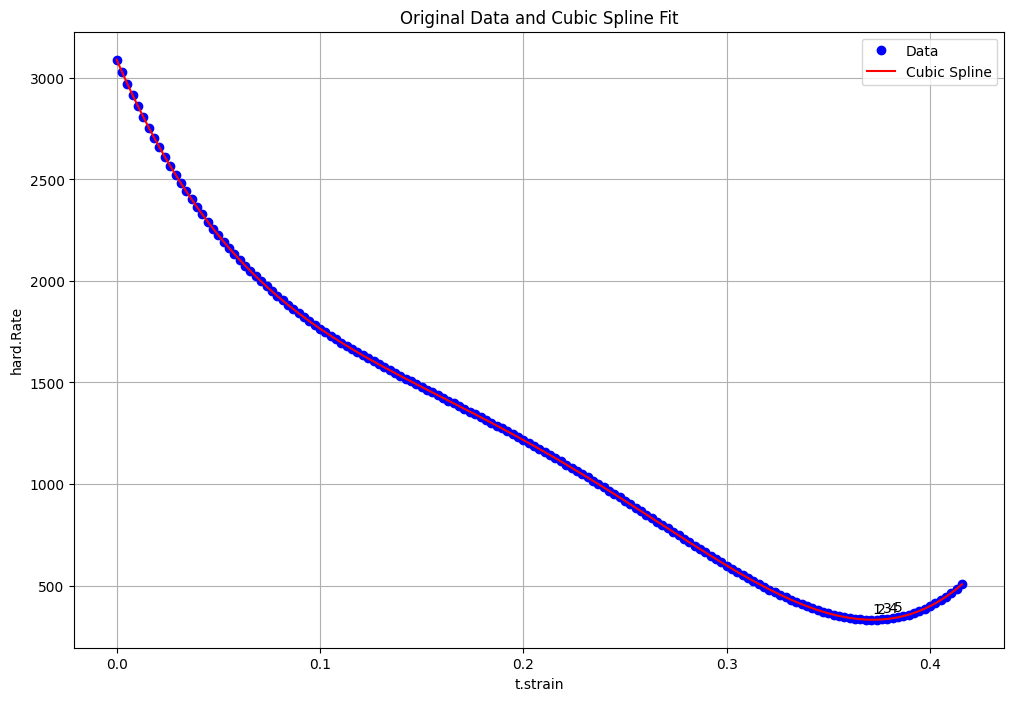


Minimum Slope: 273.3652889137651
Maximum Slope: 1995.6409114925382
Finding best parameters...
Plotting comparison...


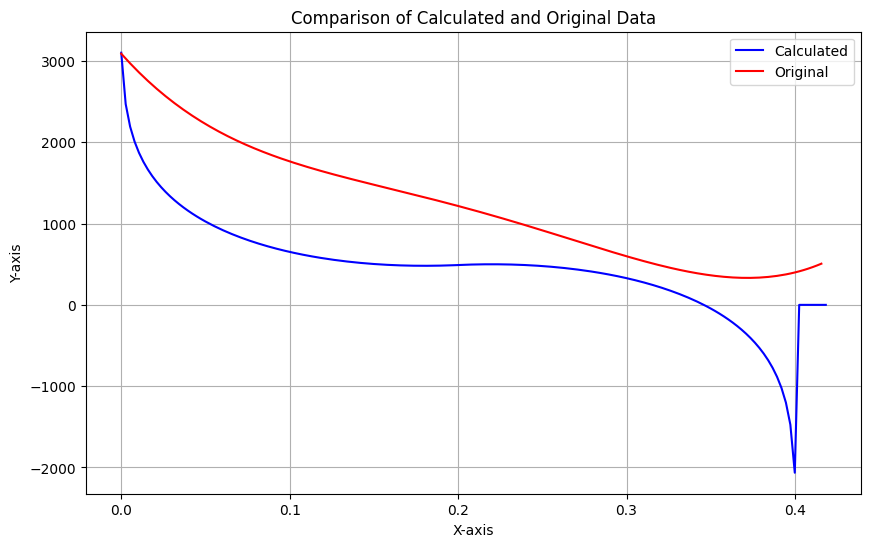

Extracting text and finding lemmas...
Finding max size chemical composition...

['CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCrFeMnNi', 'Al0.1CrFeCoNi', 'CoCuFeMnNi', 'SEM450FE', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCuFeMnNi', 'CoCrFeMnNi', 'CoCuFeMnNi', 'CoCrFeMnNi', 'Al0.1CrFeCoNi', 'NiCrFeCoMn', 'AlCoCr1.5Fe1.5NiTi0', 'AlCoCrFeNi', 'CoCuFeMnNi', 'MnFeCoNiCu', 'CoCuFeMnNi']

Maximum sized chemical composition: AlCoCr1.5Fe1.5NiTi0
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-5
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-5/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-5/Research Paper.pdf
No text file found. Ignoring link.
Calculating B0 range

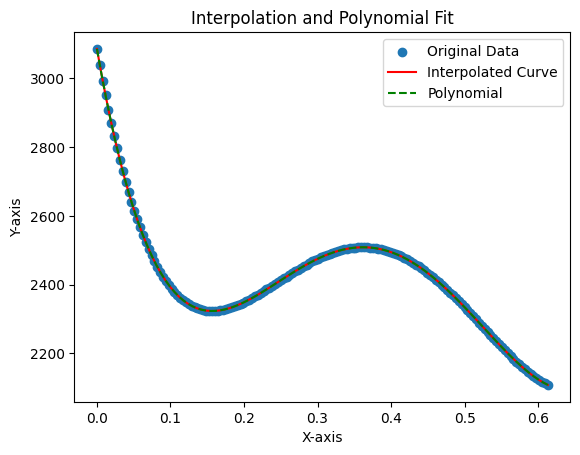

Original Y Values for the Roots:
For x = -13873199880115.935547, y = 628134030479336132757072197567058878141492485876860583936.000000
For x = 0.639324, y = 2093.730235
For x = 0.361938, y = 2508.593963
For x = 0.156737, y = 2323.014091

Minimum b0: 2323.0140912195716
Maximum b0: 2508.5939630020443
From_b0: 2200
To_b0: 2500
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   3086.081   |   -12299.895
2       |   0.004   |   3039.038   |   -11791.522
3       |   0.008   |   2993.957   |   -11294.975
4       |   0.012   |   2950.793   |   -10810.176
5       |   0.016   |   2909.500   |   -10336.993
6       |   0.020   |   2870.032   |   -9875.307
7       |   0.023   |   2832.345   |   -9424.996
8       |   0.027   |   2796.395   |   -8985.939
9       |   0.031   |   2762.138   |   -8558.015
10       |   0.035   |   2729.530   |   -8141.103
11       |   0.039   |   2698.530   |   -773

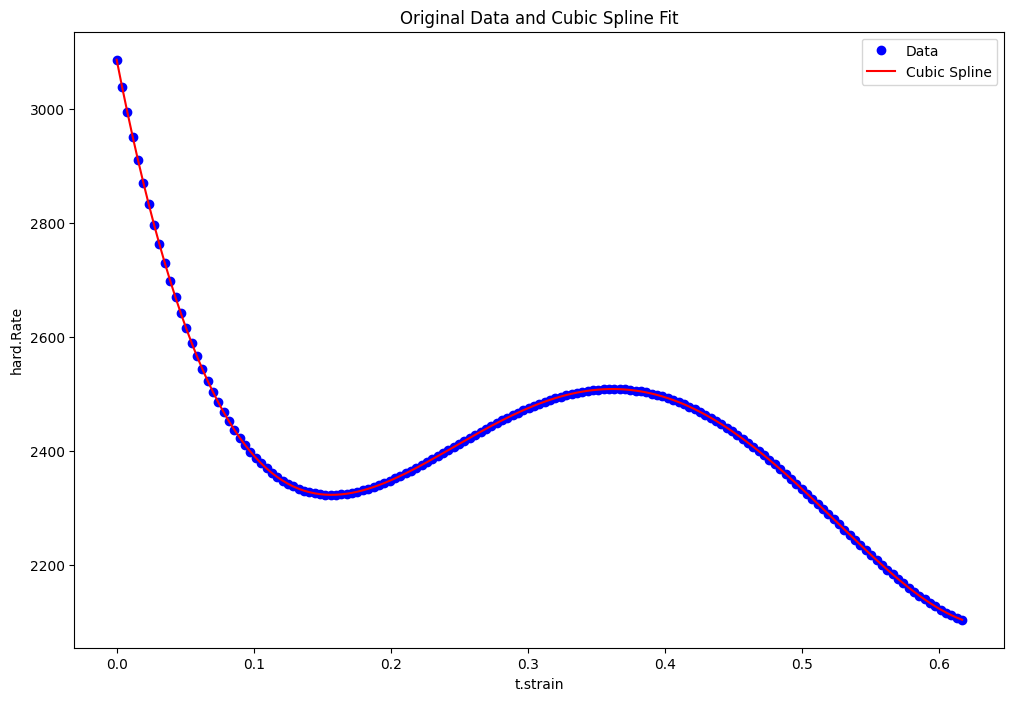

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.160   |   2323.205   |   121.540   |   111.401
2       |   0.164   |   2323.880   |   114.650   |   232.941
3       |   0.168   |   2325.015   |   107.882   |   347.592
4       |   0.172   |   2326.586   |   101.235   |   455.473

Average Slope of Printed Slopes: 286.8518833001374


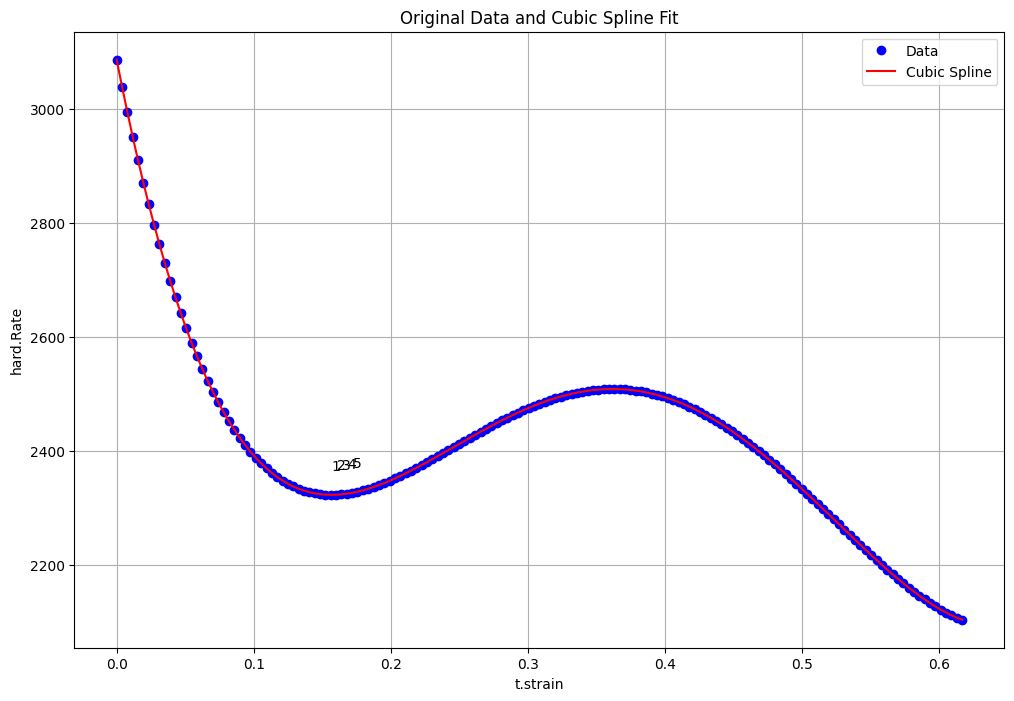


Minimum Slope: 111.40126761436994
Maximum Slope: 556.7080291642394
Finding best parameters...
Plotting comparison...


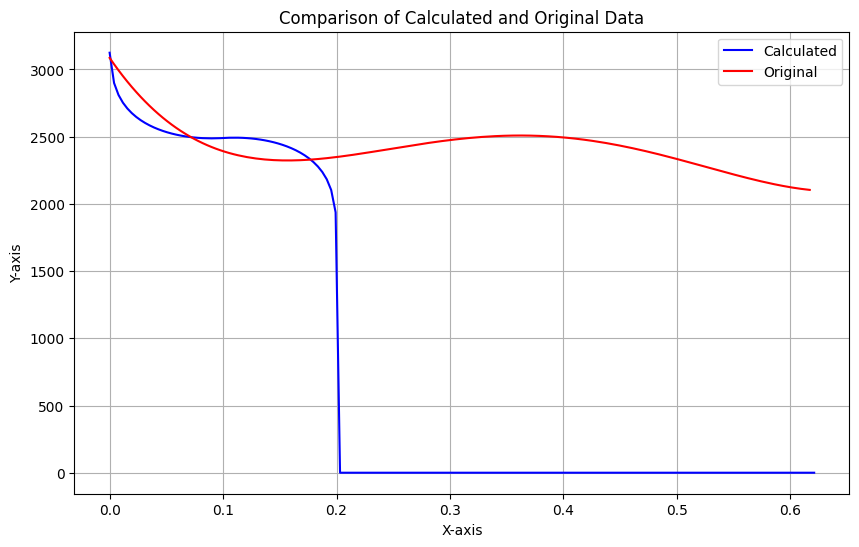

Extracting text and finding lemmas...
Finding max size chemical composition...

['CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'JEOL6500F', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'FeMnAlSi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'FeMnAlSi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'AIME1969', 'AIME1962']

Maximum sized chemical composition: CoCrFeMnNi
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-6
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-6/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-6/Research Paper.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-1.54472709e-07 -5.56718552e+05  3.41713607e+05 -6.38

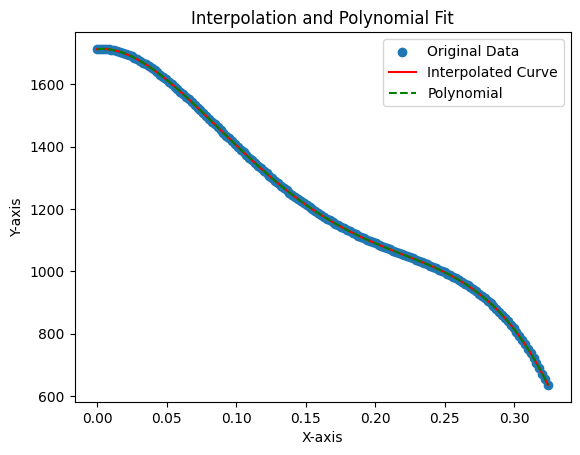

Original Y Values for the Roots:
For x = -2883194349969.875977+0.000000j, y = -7694162652122276016792636145417482717031128056171855872.000000
For x = 0.228359+0.059747j, y = 1713.140662

Minimum b0: -7.694162652122276e+54
Maximum b0: 1713.1406618170265
From_b0: -7694162652122276186933819605886714448718431772055961700
To_b0: -7694162652122276186933819605886714448718431772055961400
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   1712.330   |   450.633
2       |   0.002   |   1712.992   |   190.979
3       |   0.004   |   1713.126   |   -60.071
4       |   0.006   |   1712.749   |   -302.592
5       |   0.008   |   1711.881   |   -536.714
6       |   0.010   |   1710.537   |   -762.550
7       |   0.012   |   1708.735   |   -980.221
8       |   0.014   |   1706.491   |   -1189.844
9       |   0.017   |   1703.823   |   -1391.536
10       |   0.019   |   1700.745   |   -1585.415
1

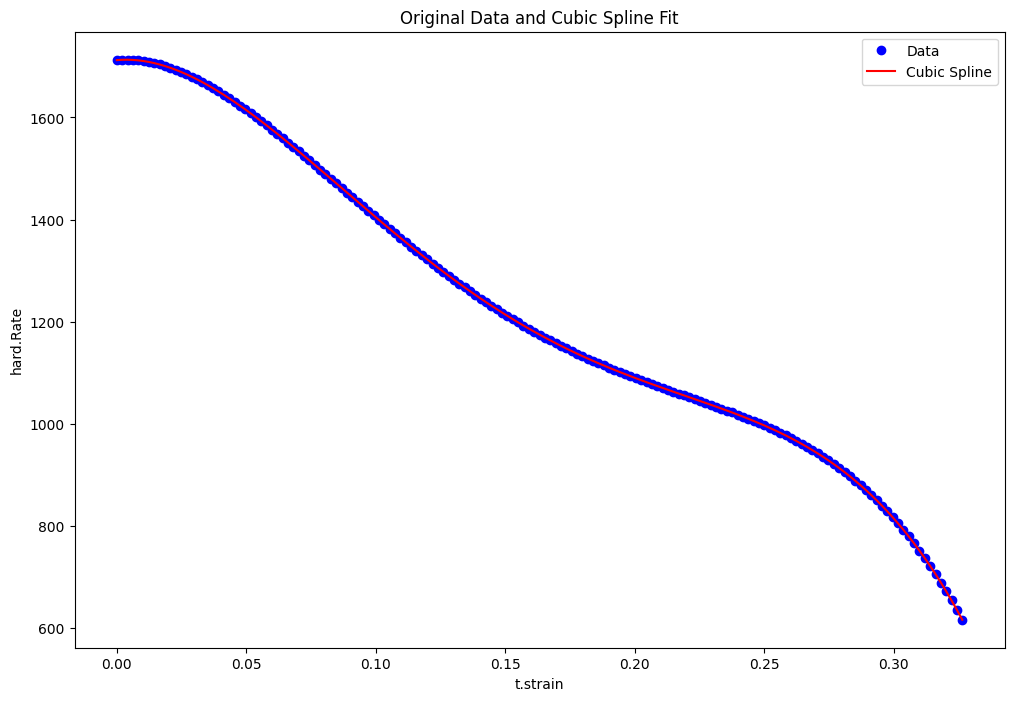

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.000   |   1712.330   |   -259.654   |   450.633

Average Slope of Printed Slopes: 450.63316339386114


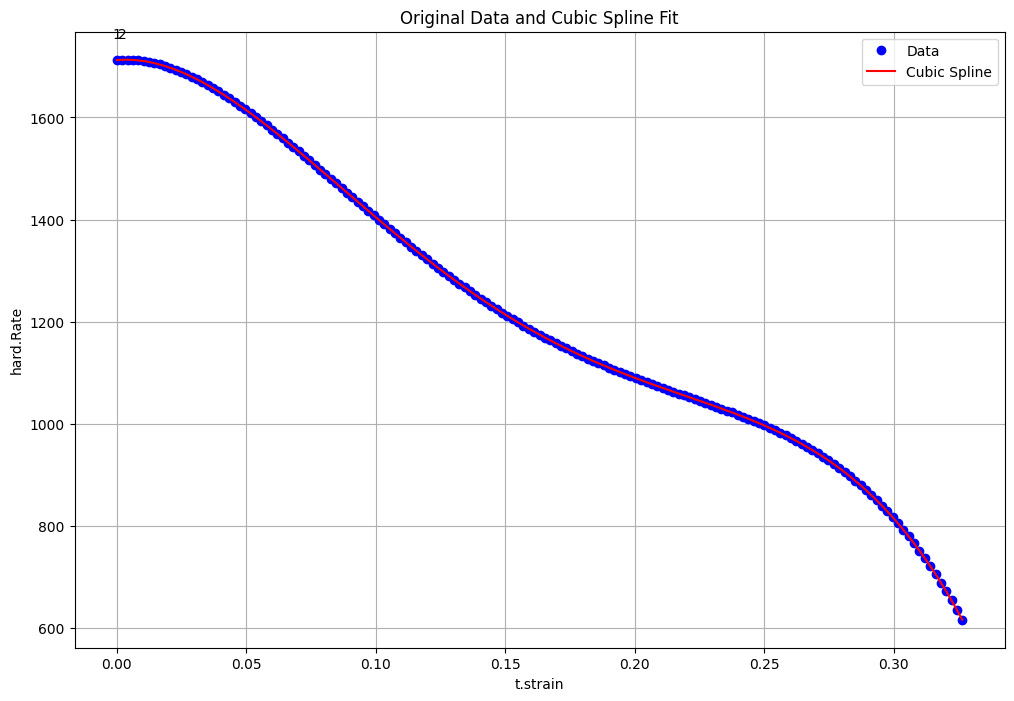


Minimum Slope: 190.97923315485684
Maximum Slope: 450.63316339386114
Finding best parameters...
Plotting comparison...


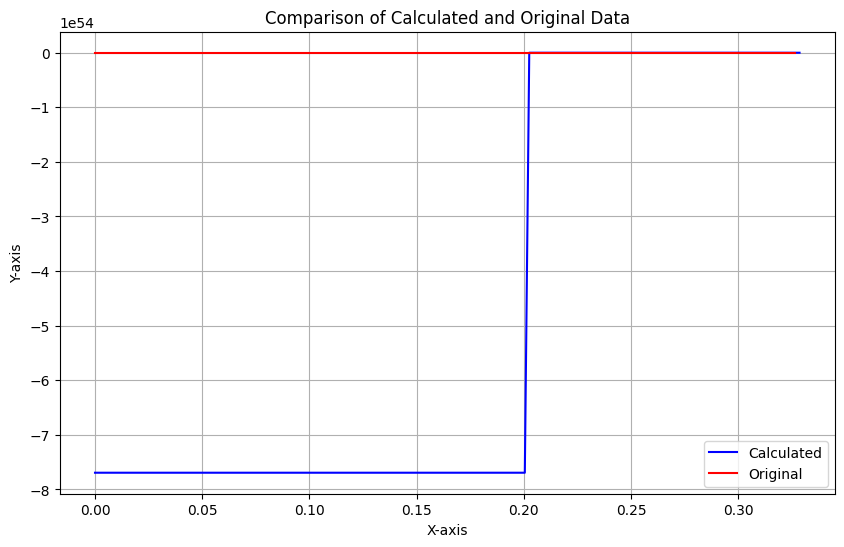

Extracting text and finding lemmas...
Finding max size chemical composition...

['CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'JEOL6500F', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'FeMnAlSi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'FeMnAlSi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'AIME1969', 'AIME1962']

Maximum sized chemical composition: CoCrFeMnNi
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-22
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-22/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-22/orange_rs_s150.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 3.40985436e-07 -1.27283921e+06  1.73118966e+05  1

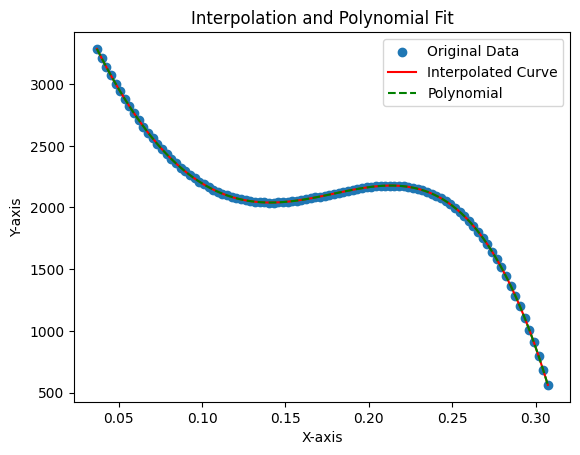

Original Y Values for the Roots:
For x = 2986260587773.339844, y = -20244840136668657280056917491377365199147051090920341504.000000
For x = -0.252210, y = 15907.346183
For x = 0.213252, y = 2177.762677
For x = 0.140965, y = 2040.158320

Minimum b0: 2040.1583202102643
Maximum b0: 2177.762676644665
From_b0: 1900
To_b0: 2200
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.037   |   3285.456   |   -26981.760
2       |   0.040   |   3211.509   |   -26092.288
3       |   0.043   |   3140.040   |   -25204.377
4       |   0.045   |   3071.042   |   -24318.449
5       |   0.048   |   3004.509   |   -23435.229
6       |   0.051   |   2940.432   |   -22555.359
7       |   0.054   |   2878.802   |   -21679.506
8       |   0.057   |   2819.606   |   -20808.330
9       |   0.059   |   2762.831   |   -19942.492
10       |   0.062   |   2708.460   |   -19082.653
11       |   0.065   |   2656.476   |   

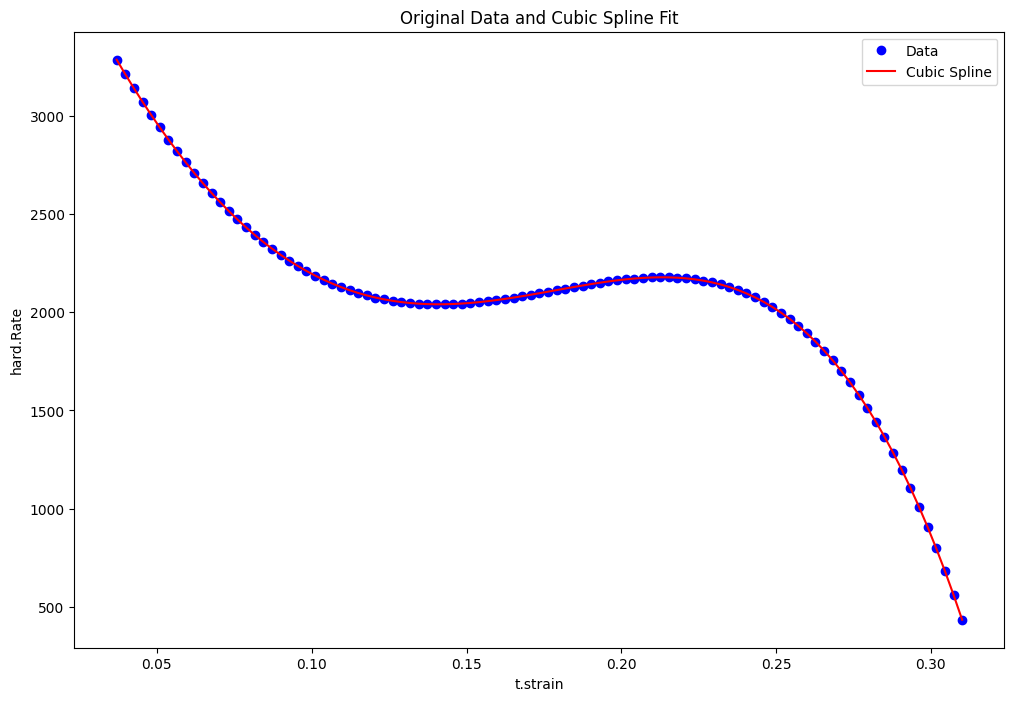

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.143   |   2040.422   |   372.528   |   272.198
2       |   0.146   |   2041.706   |   346.039   |   644.726
3       |   0.148   |   2043.991   |   318.890   |   990.765
4       |   0.151   |   2047.202   |   291.079   |   1309.654

Average Slope of Printed Slopes: 804.335750950793


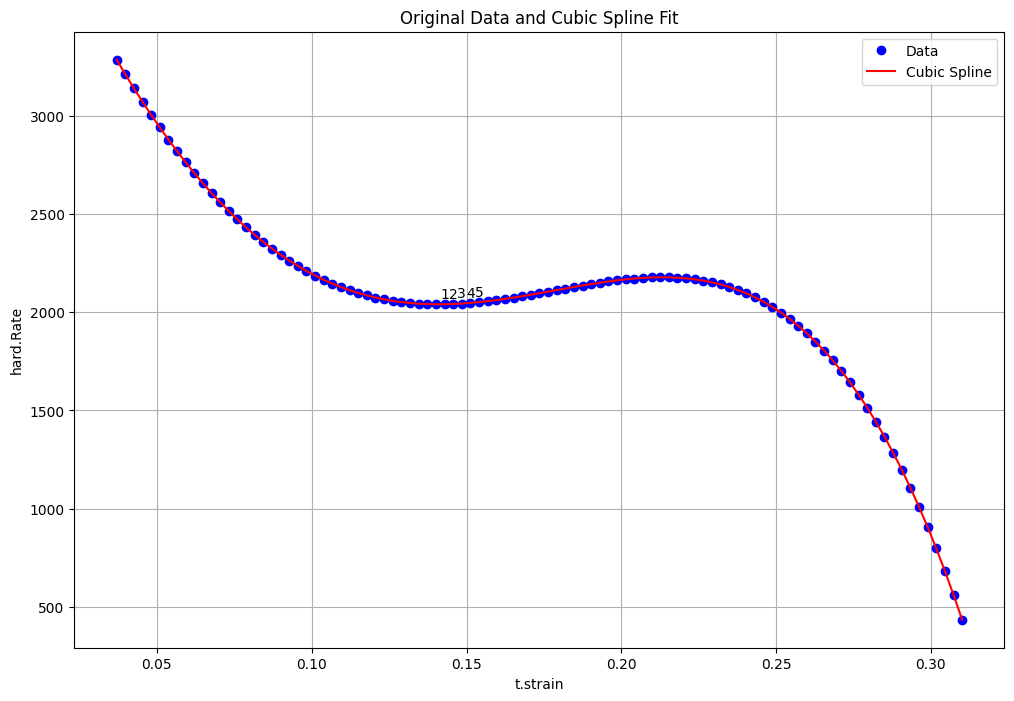


Minimum Slope: 272.19785624110233
Maximum Slope: 1600.7333327140198
Finding best parameters...
Plotting comparison...


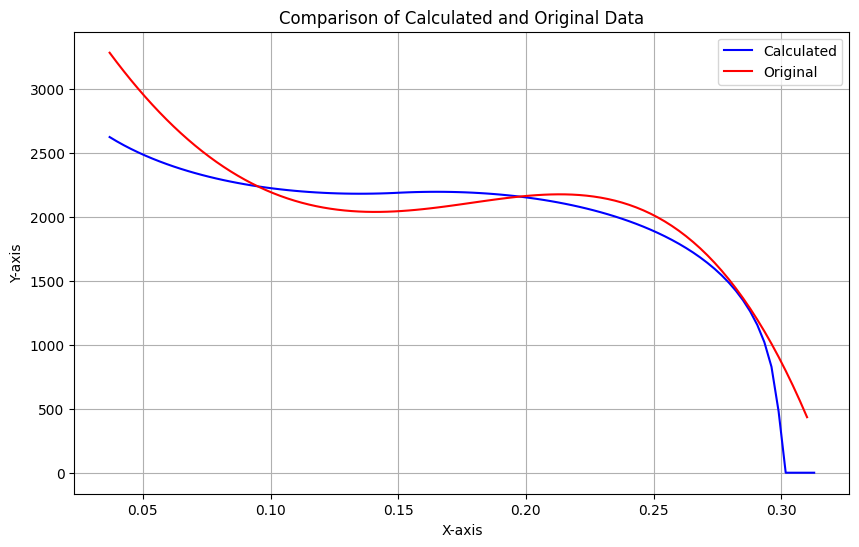

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe38.5Mn20Co20Cr15Si5Cu1.5', 'Fe50Mn30Co10Cr10HEA', 'Fe38.5Mn20Co20Cr15Si5Cu1.5', 'Fe38.5Mn20Co20Cr15Si5Cu1', 'S350S150D']

Maximum sized chemical composition: Fe38.5Mn20Co20Cr15Si5Cu1.5
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-23
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-23/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-23/D-pass-rs.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 1.19163561e-06 -1.27283921e+06  1.72681830e+05  1.50941143e+05
 -3.85751861e+04  4.49743535e+03]

Polynomial Equation: 0.000001 x^5 + -1272839.211464 x^4 + 172681.829599 x^3 + 150941.142893 x^2 + -38575.186149 x^1 + 4497.435350

Derivative Equation: 0.000006 x^4 + -5091356.845856 x^3 + 518045.488796 x^2 + 301882.285787 x^1 + -38575.186

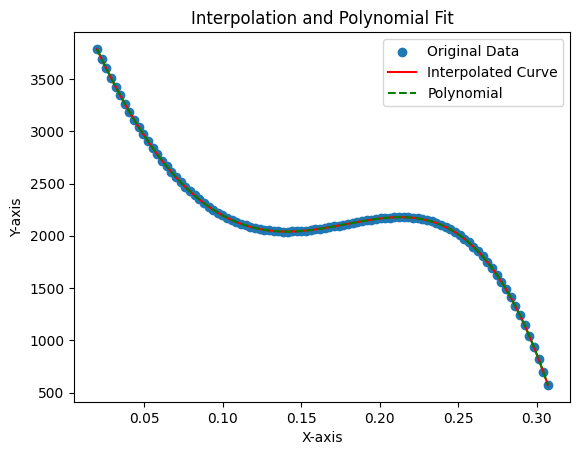

Original Y Values for the Roots:
For x = 854515726366.549316, y = -135732478908995779662831019868906484828622082369650688.000000
For x = 0.213165, y = 2177.755636
For x = 0.140880, y = 2040.164268
For x = -0.252295, y = 15907.307885

Minimum b0: 2040.1642680502687
Maximum b0: 2177.755635670695
From_b0: 1900
To_b0: 2200
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.020   |   3787.486   |   -32371.195
2       |   0.023   |   3693.111   |   -31433.015
3       |   0.026   |   3601.515   |   -30492.134
4       |   0.029   |   3512.706   |   -29549.053
5       |   0.032   |   3426.689   |   -28604.641
6       |   0.035   |   3343.467   |   -27659.667
7       |   0.038   |   3263.040   |   -26714.928
8       |   0.041   |   3185.407   |   -25771.213
9       |   0.044   |   3110.562   |   -24829.314
10       |   0.047   |   3038.501   |   -23890.022
11       |   0.050   |   2969.214   |   -22

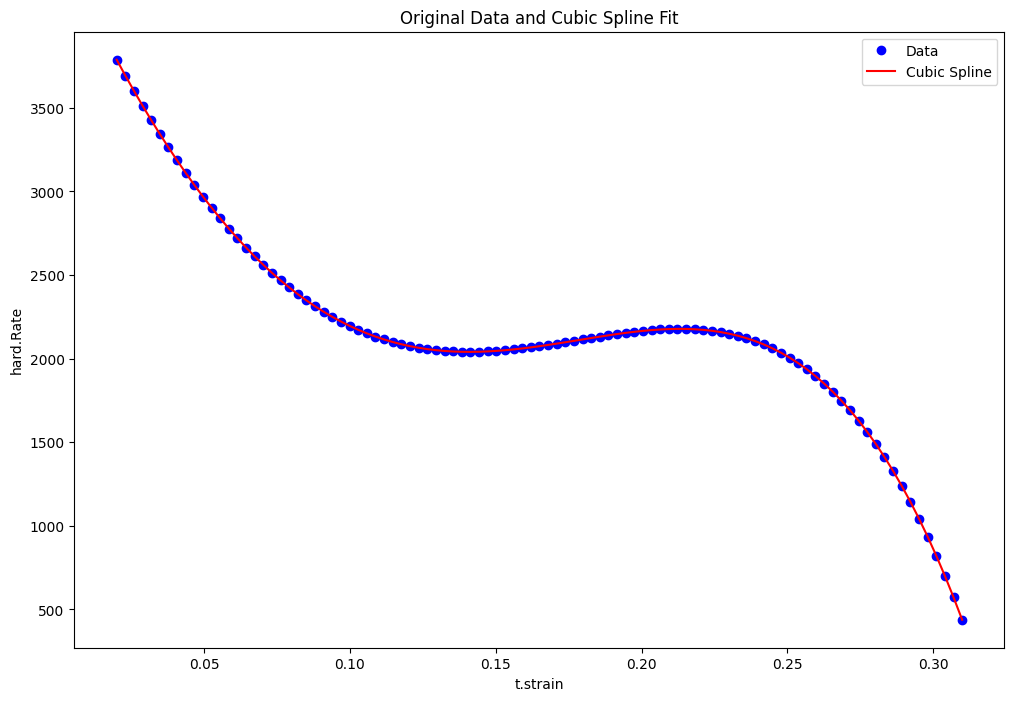

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.141   |   2040.176   |   409.619   |   58.770
2       |   0.144   |   2040.963   |   380.124   |   468.389
3       |   0.147   |   2042.918   |   349.838   |   848.513
4       |   0.150   |   2045.954   |   318.761   |   1198.350

Average Slope of Printed Slopes: 643.5054588216769


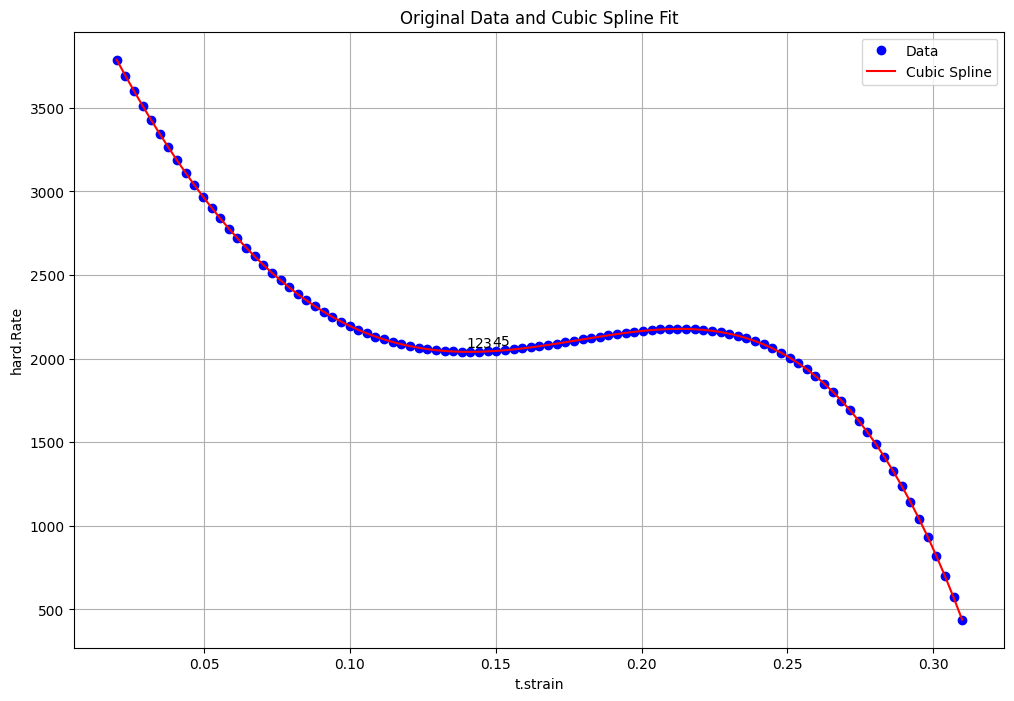


Minimum Slope: 58.770130801047586
Maximum Slope: 1517.1112001819222
Finding best parameters...
Plotting comparison...


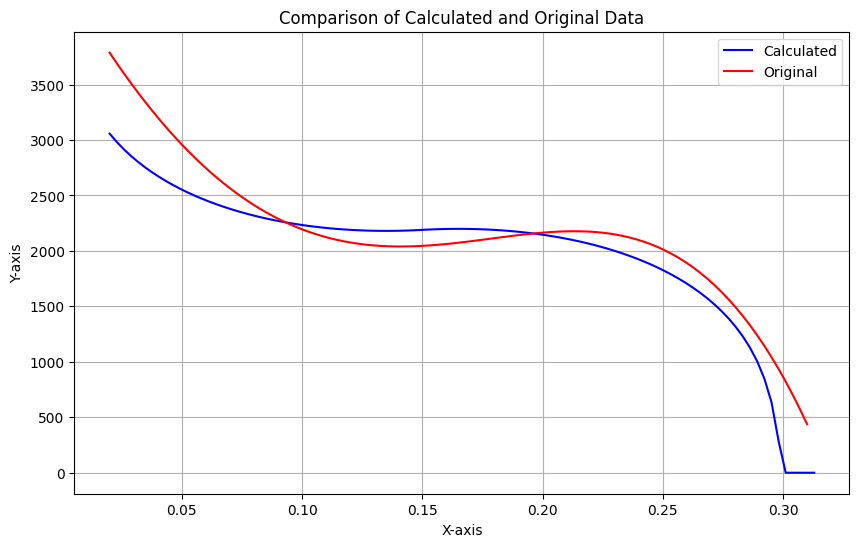

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe38.5Mn20Co20Cr15Si5Cu1.5', 'Fe50Mn30Co10Cr10HEA', 'Fe38.5Mn20Co20Cr15Si5Cu1.5', 'Fe38.5Mn20Co20Cr15Si5Cu1', 'S350S150D']

Maximum sized chemical composition: Fe38.5Mn20Co20Cr15Si5Cu1.5
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-25
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-25/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-25/Research Paper blue.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-7.79993324e-08 -9.04927848e+05  5.18775000e+05 -5.26718594e+04
 -1.34251256e+04  4.44112374e+03]

Polynomial Equation: -0.000000 x^5 + -904927.848301 x^4 + 518774.999952 x^3 + -52671.859431 x^2 + -13425.125560 x^1 + 4441.123740

Derivative Equation: -0.000000 x^4 + -3619711.393203 x^3 + 1556324.999855 x^2 + -105343.718861 x^1

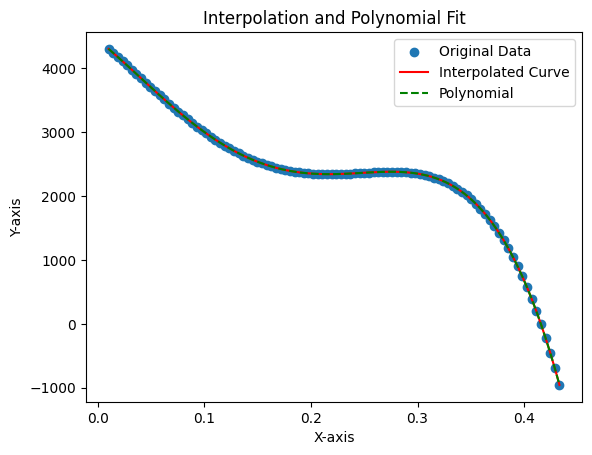

Original Y Values for the Roots:
For x = -9281390708605.572266, y = -1343062333558335860901109402683217497120860262628000268288.000000
For x = 0.275334, y = 2379.398025
For x = 0.216767, y = 2342.046619
For x = -0.062143, y = 4934.004245

Minimum b0: 2342.0466187027946
Maximum b0: 2379.3980246937767
From_b0: 2200
To_b0: 2500
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.010   |   4302.115   |   -14326.874
2       |   0.014   |   4238.926   |   -14627.774
3       |   0.019   |   4174.540   |   -14875.872
4       |   0.023   |   4109.185   |   -15072.314
5       |   0.027   |   4043.081   |   -15219.080
6       |   0.032   |   3976.443   |   -15317.927
7       |   0.036   |   3909.474   |   -15370.671
8       |   0.041   |   3842.372   |   -15379.114
9       |   0.045   |   3775.327   |   -15345.060
10       |   0.049   |   3708.520   |   -15270.314
11       |   0.054   |   3642.125   |

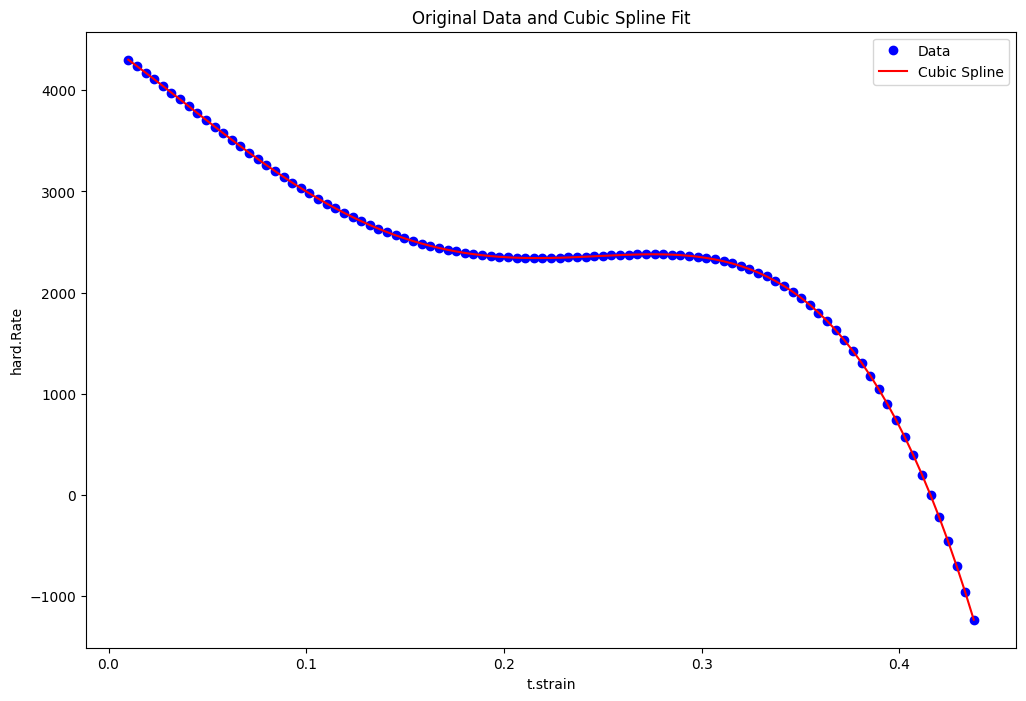

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.219   |   2342.253   |   223.013   |   152.279
2       |   0.224   |   2343.415   |   189.734   |   375.292
3       |   0.228   |   2345.479   |   154.651   |   565.026
4       |   0.233   |   2348.295   |   117.763   |   719.677

Average Slope of Printed Slopes: 453.0684609474582


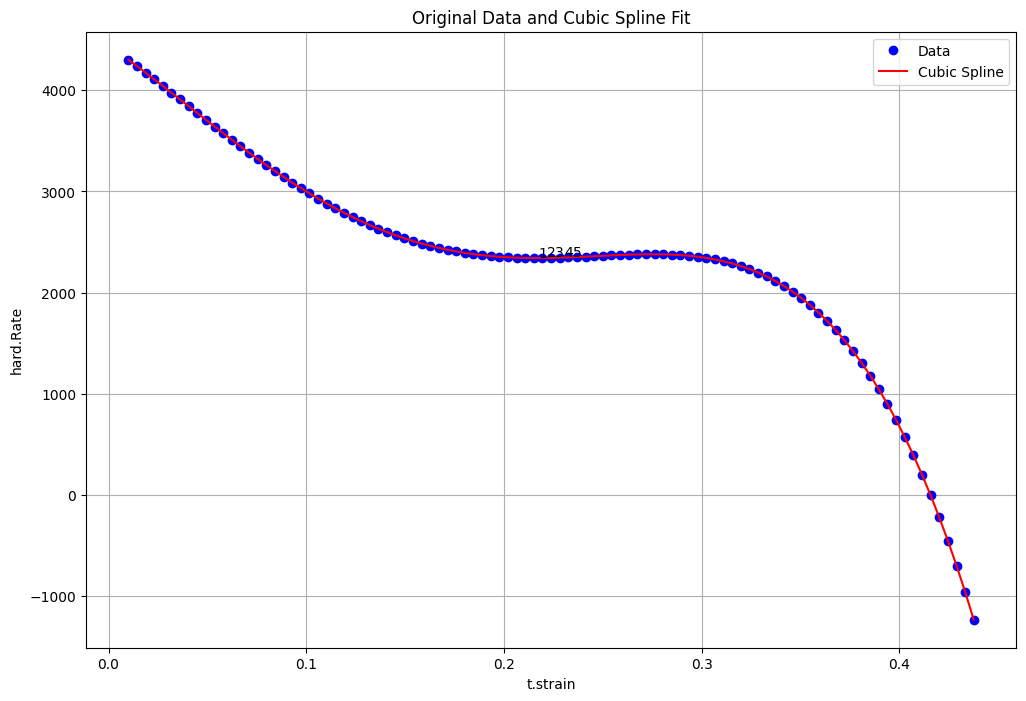


Minimum Slope: 152.2788500523404
Maximum Slope: 837.4403592750218
Finding best parameters...
Plotting comparison...


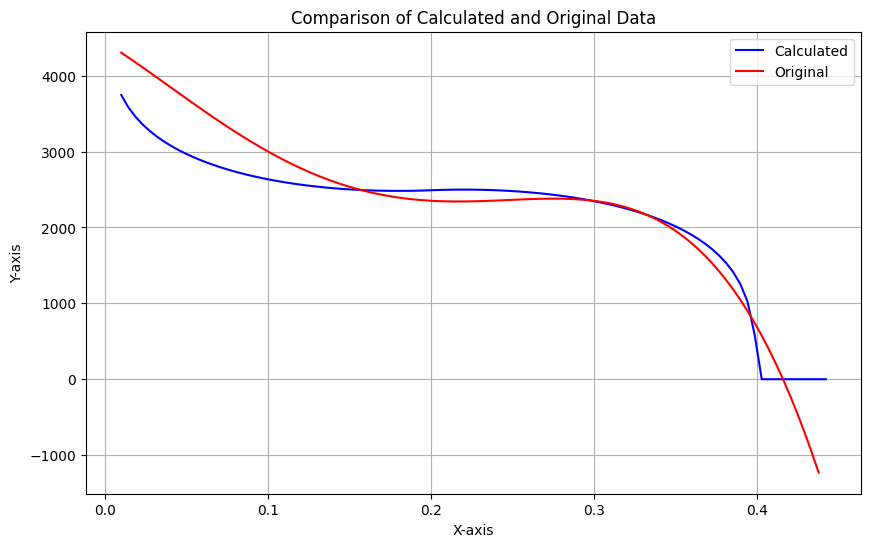

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe50Mn30Co10Cr10', 'Fe20Mn20Ni20Co20Cr20', 'Al1.5CoCr0.5FeNi0', 'FeMnNiCoCr', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'FSP350RPM', 'Fe50Mn30Co10Cr10', 'CoCrFeMnNi', 'Al0.1CoCrFeNi', 'CoCrFeMnNi']

Maximum sized chemical composition: Fe20Mn20Ni20Co20Cr20
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-26
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-26/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-26/Research Paper Black.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-4.36461017e-09 -1.00140421e+06  7.05211882e+05 -1.68303202e+05
  1.29947162e+04  2.34645772e+03]

Polynomial Equation: -0.000000 x^5 + -1001404.213203 x^4 + 705211.881992 x^3 + -168303.202478 x^2 + 12994.716206 x^1 + 23

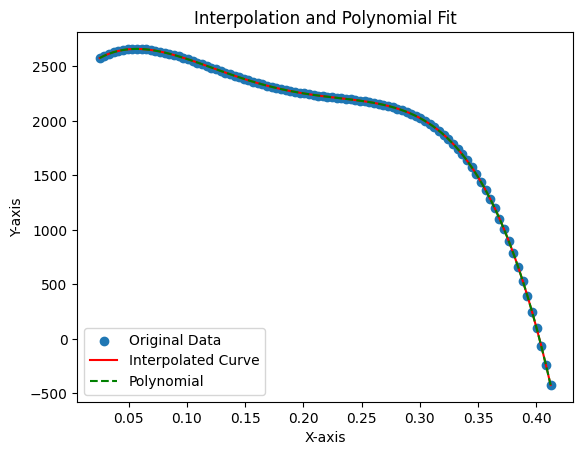

Original Y Values for the Roots:
For x = -183549810910413.406250+0.000000j, y = -227329174920026918167640757580349593477077043194629102795489280.000000
For x = 0.235806+0.041915j, y = 2660.382242

Minimum b0: -2.273291749200269e+62
Maximum b0: 2660.382242092261
From_b0: -227329174920026925303879221110148998768506890442104784709222500
To_b0: -227329174920026925303879221110148998768506890442104784709222200
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.025   |   2576.764   |   5838.966
2       |   0.029   |   2598.223   |   4916.118
3       |   0.033   |   2616.108   |   4049.209
4       |   0.037   |   2630.641   |   3237.266
5       |   0.041   |   2642.038   |   2478.610
6       |   0.045   |   2650.508   |   1771.748
7       |   0.049   |   2656.257   |   1115.139
8       |   0.053   |   2659.481   |   507.254
9       |   0.057   |   2660.372   |   -53.438
10       |   0.061   |   26

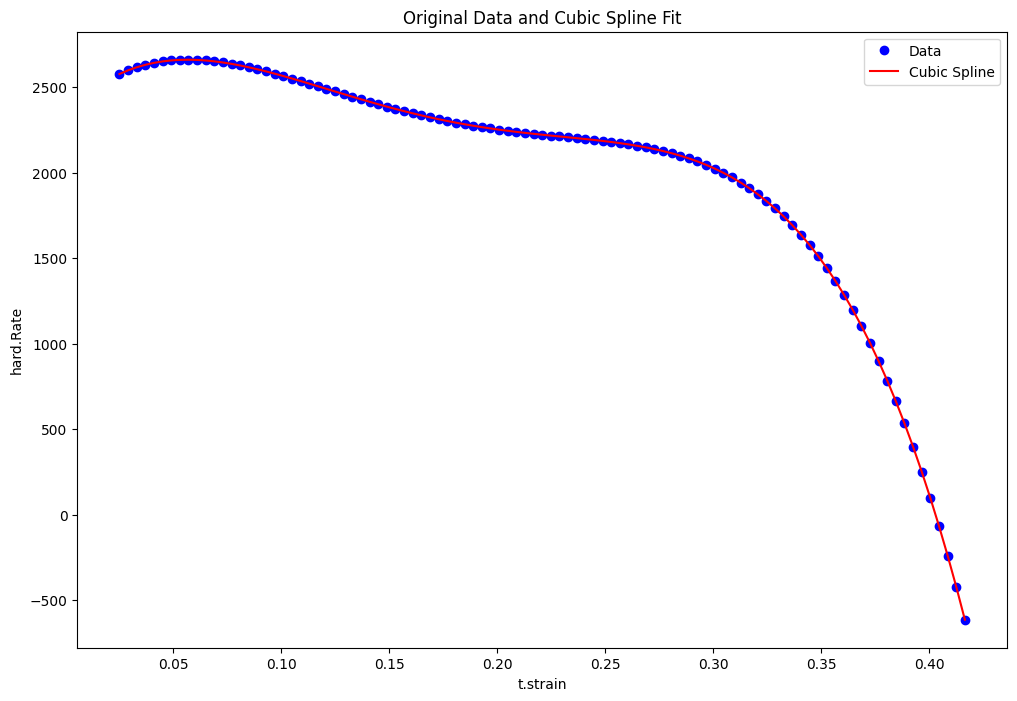

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.025   |   2576.764   |   -922.847   |   5838.966
2       |   0.029   |   2598.223   |   -866.909   |   4916.118
3       |   0.033   |   2616.108   |   -811.942   |   4049.209
4       |   0.037   |   2630.641   |   -758.657   |   3237.266

Average Slope of Printed Slopes: 4510.389864375595


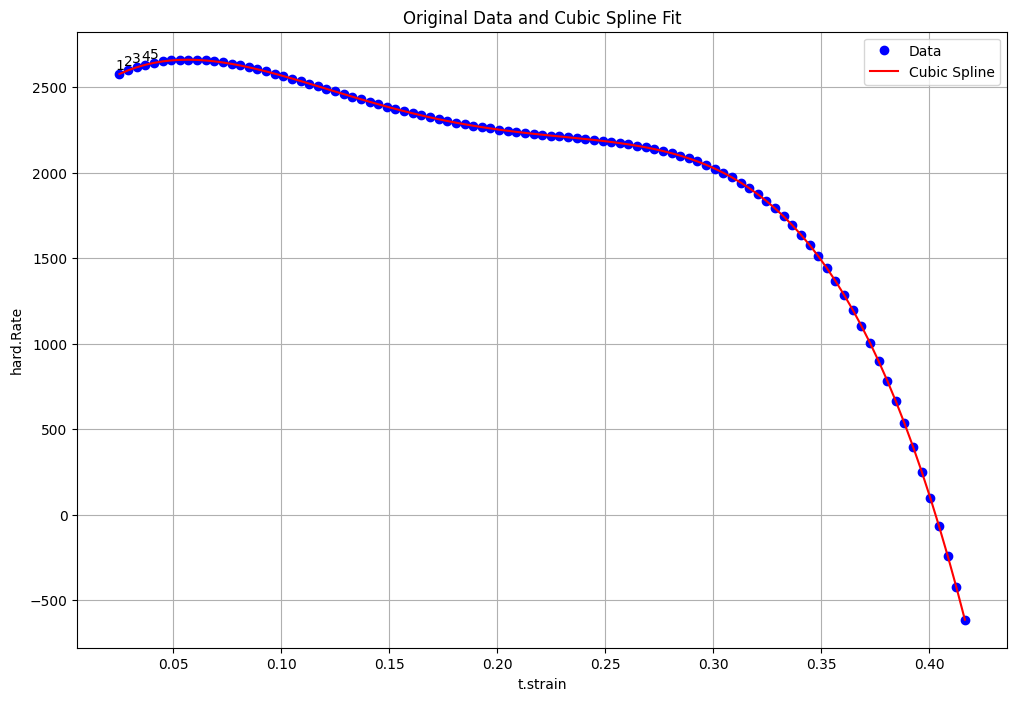


Minimum Slope: 2478.609773940573
Maximum Slope: 5838.965661885643
Finding best parameters...
Plotting comparison...


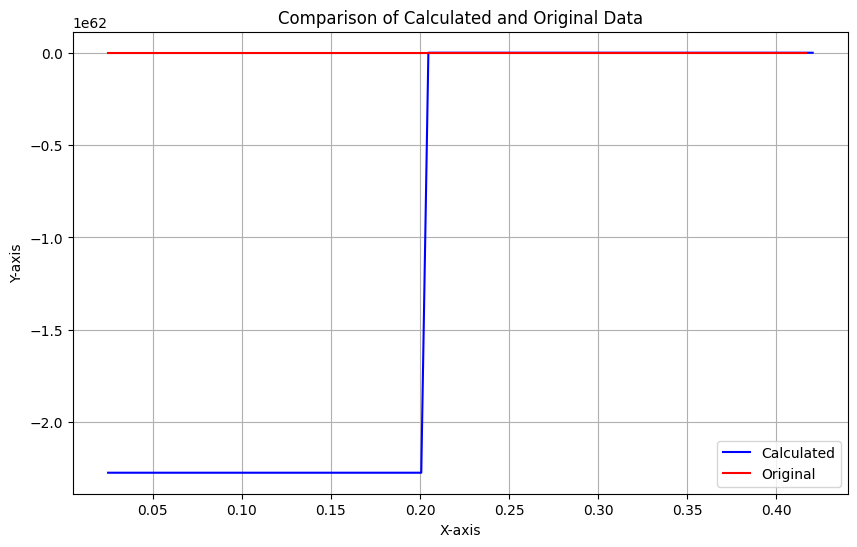

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe50Mn30Co10Cr10', 'Fe20Mn20Ni20Co20Cr20', 'Al1.5CoCr0.5FeNi0', 'FeMnNiCoCr', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'FSP350RPM', 'Fe50Mn30Co10Cr10', 'CoCrFeMnNi', 'Al0.1CoCrFeNi', 'CoCrFeMnNi']

Maximum sized chemical composition: Fe20Mn20Ni20Co20Cr20
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-27
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-27/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-27/Research Paper Green.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 2.24808268e-07  5.05672842e+05 -5.25613814e+05  1.76297229e+05
 -2.35615179e+04  2.96073399e+03]

Polynomial Equation: 0.000000 x^5 + 505672.841833 x^4 + -525613.814444 x^3 + 176297.229479 x^2 + -23561.517897 x^1 + 2960

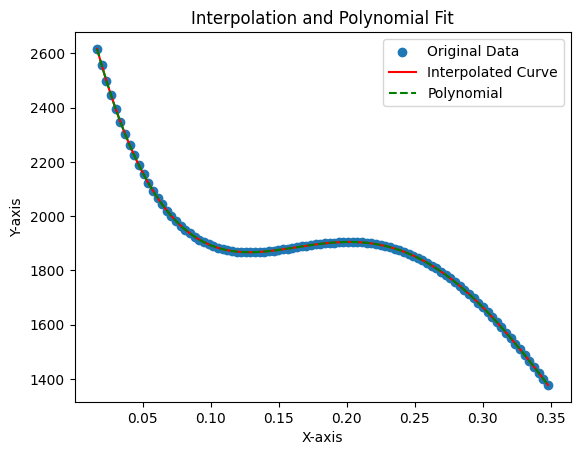

Original Y Values for the Roots:
For x = -1799481297102.707031, y = 1060447015020778506239250507385634848786013534147313664.000000
For x = 0.449298, y = 897.388307
For x = 0.201809, y = 1904.544990
For x = 0.128469, y = 1866.756701

Minimum b0: 1866.756701295277
Maximum b0: 1904.5449902762198
From_b0: 1700
To_b0: 2000
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.017   |   2616.371   |   -18142.684
2       |   0.020   |   2556.153   |   -17128.542
3       |   0.023   |   2499.340   |   -16148.215
4       |   0.027   |   2445.817   |   -15201.394
5       |   0.030   |   2395.472   |   -14287.550
6       |   0.034   |   2348.192   |   -13406.212
7       |   0.037   |   2303.867   |   -12556.894
8       |   0.040   |   2262.389   |   -11739.111
9       |   0.044   |   2223.650   |   -10952.382
10       |   0.047   |   2187.546   |   -10196.222
11       |   0.051   |   2153.973   |   -947

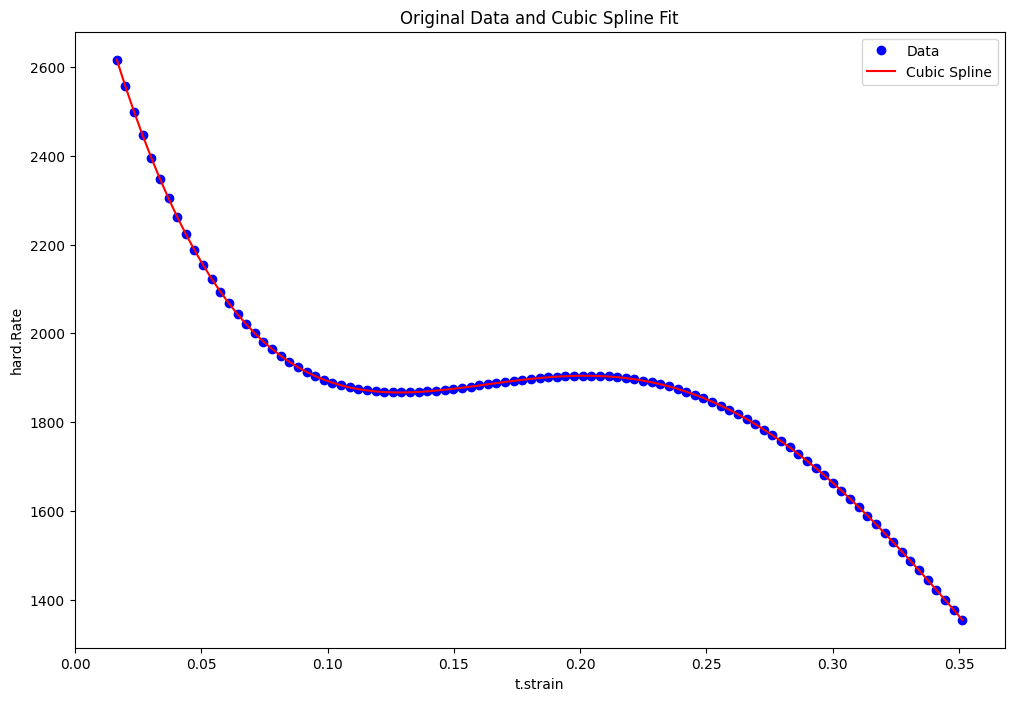

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.129   |   1866.772   |   149.028   |   37.602
2       |   0.133   |   1867.160   |   131.027   |   186.630
3       |   0.136   |   1868.026   |   113.509   |   317.657
4       |   0.140   |   1869.310   |   96.475   |   431.165

Average Slope of Printed Slopes: 243.26356192726826


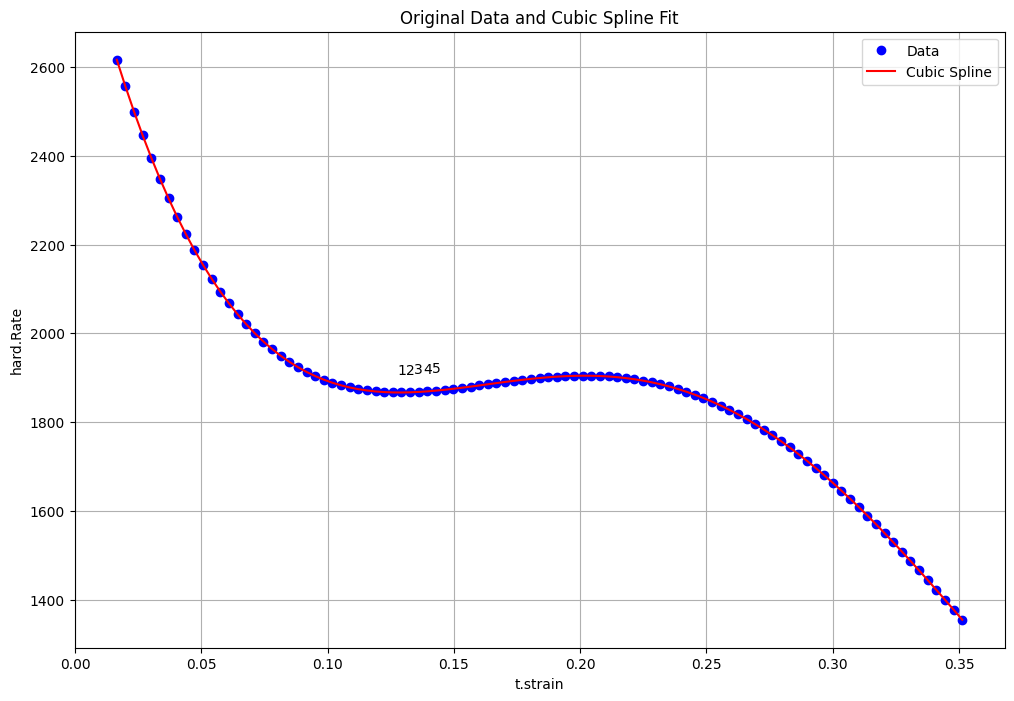


Minimum Slope: 37.60232172705781
Maximum Slope: 527.6402068963292
Finding best parameters...
Plotting comparison...


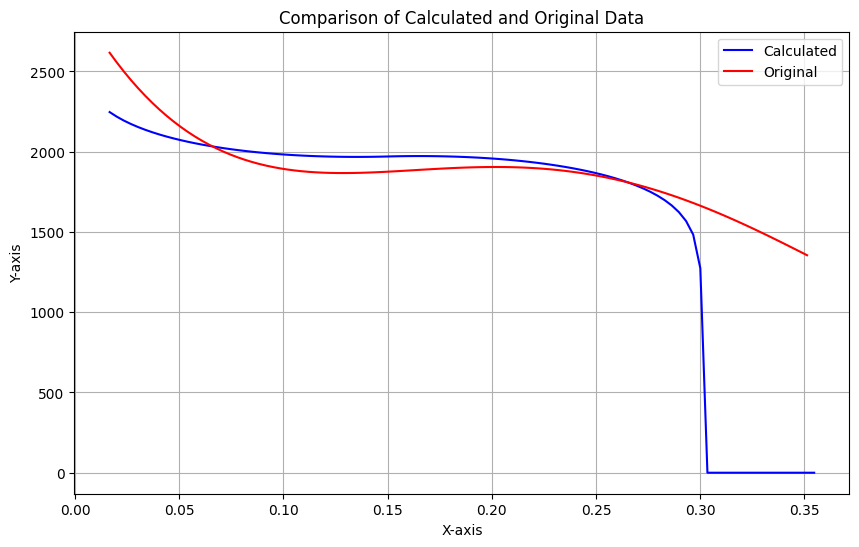

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe50Mn30Co10Cr10', 'Fe20Mn20Ni20Co20Cr20', 'Al1.5CoCr0.5FeNi0', 'FeMnNiCoCr', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'Fe50Mn30Co10Cr10HEA', 'Al0.1CoCrFeNi', 'FSP350RPM', 'Fe50Mn30Co10Cr10', 'CoCrFeMnNi', 'Al0.1CoCrFeNi', 'CoCrFeMnNi']

Maximum sized chemical composition: Fe20Mn20Ni20Co20Cr20
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-7
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-7/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-7/Research Paper.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 2.85138825e-06  2.59632689e+06 -1.50971323e+06  3.34120297e+05
 -3.53457557e+04  5.64158382e+03]

Polynomial Equation: 0.000003 x^5 + 2596326.894371 x^4 + -1509713.230739 x^3 + 334120.296919 x^2 + -35345.755739 x^1 + 5641.583821

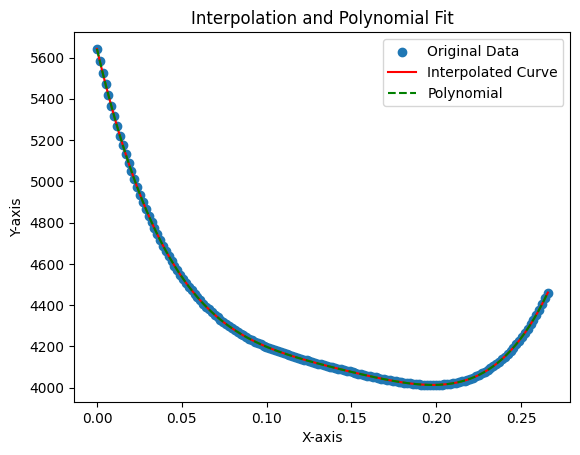

Original Y Values for the Roots:
For x = -728438688460.906372+0.000000j, y = 146204716422075200174306216928956102047566969241075712.000000
For x = 0.197788+0.000000j, y = 4013.422257

Minimum b0: 4013.422256934172
Maximum b0: 1.462047164220752e+53
From_b0: 3900
To_b0: 4200
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   5641.584   |   -35345.701
2       |   0.002   |   5582.695   |   -34227.401
3       |   0.003   |   5525.679   |   -33134.673
4       |   0.005   |   5470.490   |   -32067.326
5       |   0.007   |   5417.088   |   -31025.027
6       |   0.008   |   5365.429   |   -30007.482
7       |   0.010   |   5315.471   |   -29014.387
8       |   0.012   |   5267.175   |   -28045.439
9       |   0.014   |   5220.499   |   -27100.337
10       |   0.015   |   5175.402   |   -26178.778
11       |   0.017   |   5131.847   |   -25280.460
12       |   0.019   |   5089.792   |  

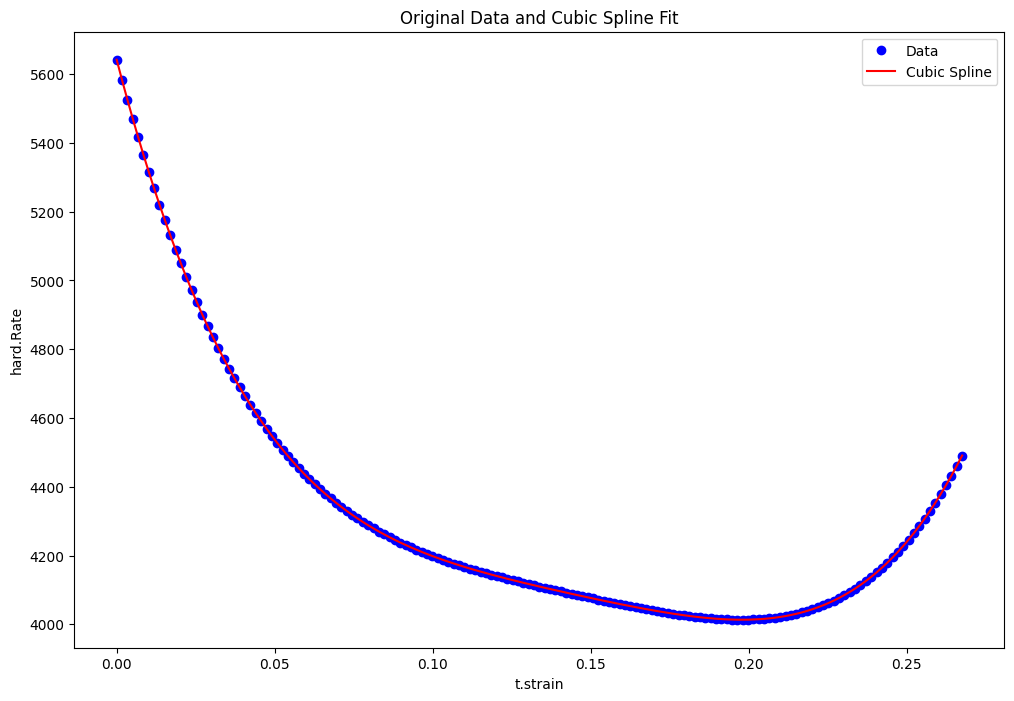

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.198   |   4013.426   |   167.933   |   27.580
2       |   0.200   |   4013.614   |   177.648   |   195.513
3       |   0.201   |   4014.094   |   187.666   |   373.161
4       |   0.203   |   4014.883   |   197.985   |   560.827

Average Slope of Printed Slopes: 289.2704965206739


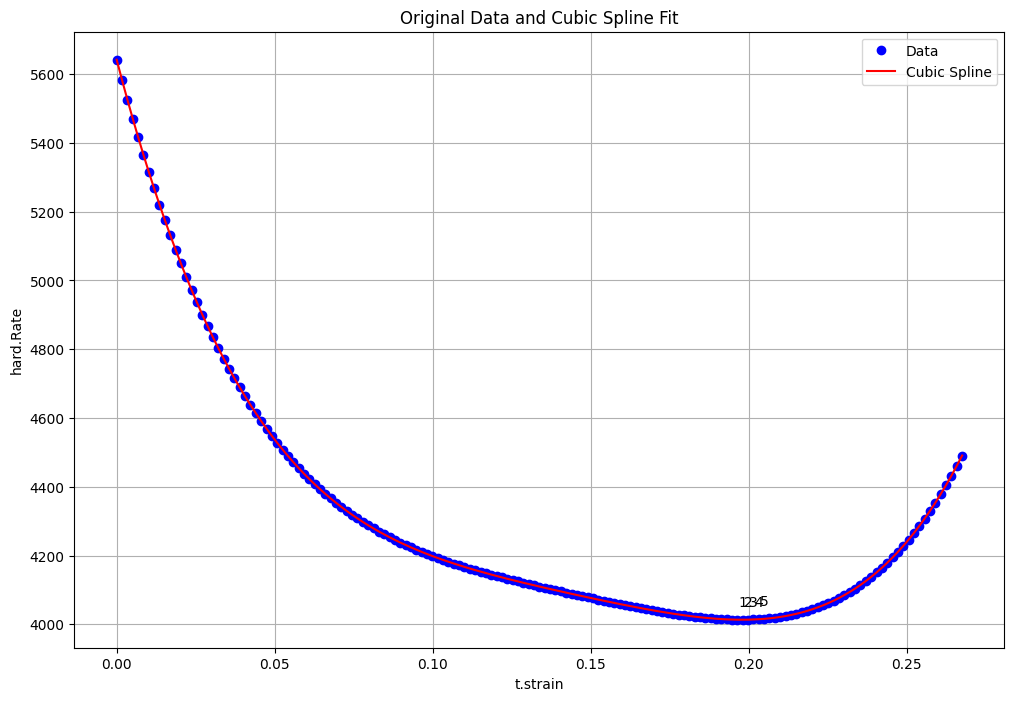


Minimum Slope: 27.580200253675407
Maximum Slope: 758.8123422037587
Finding best parameters...
Plotting comparison...


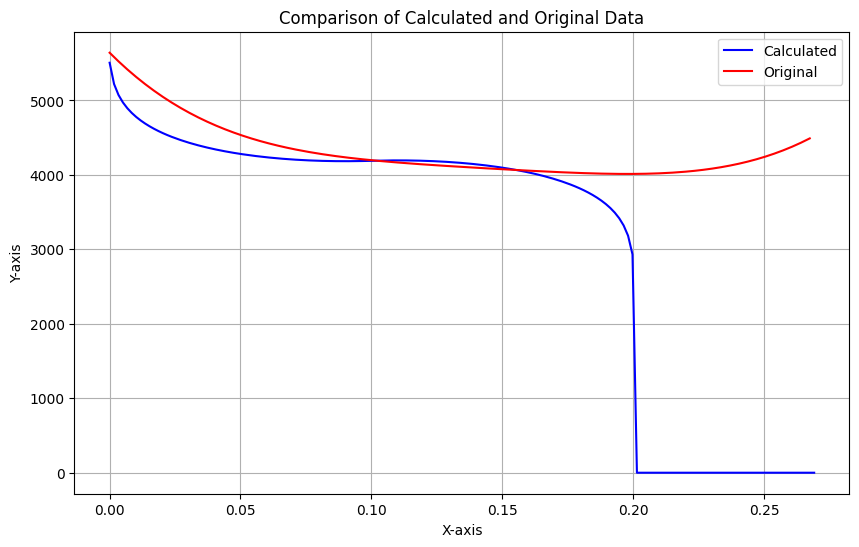

Extracting text and finding lemmas...
Finding max size chemical composition...

['CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'Al0.1CrFeCoNi', 'Al0.3CrFeCoNi', 'TiHfZrTaNb', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'ARAMIS5M', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'Al0.1CrFeCoNi', 'Al0.1CrFeCoNi', 'Al0.1CrFeCoNi', 'CoCrFeMnNi', 'Al0.1CrFeCoNi', 'Al0.1CrFeCoNi', 'CoCrFeNi', 'Al0.1CrFeCoNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'Al0.5CoCrCuFeNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CrMnFeCoNi', 'AlCoCr1.5Fe1.5NiTi0', 'VCrMnFeCoNi', 'NiFeCrCoMn', 'CoCrFeMnNi']

Maximum sized chemical composition: AlCoCr1.5Fe1.5NiTi0
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-8
Found Excel file: /content/drive/MyDrive/Colab N

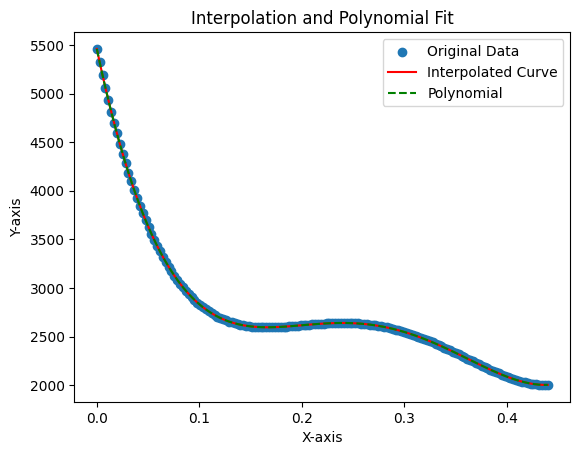

Original Y Values for the Roots:
For x = 7403860407583.487305, y = 431350164289052513391365868230422491111424116499645726720.000000
For x = 0.437508, y = 2003.574441
For x = 0.239758, y = 2640.560170
For x = 0.166486, y = 2596.442039

Minimum b0: 2596.4420392534685
Maximum b0: 2640.5601703172665
From_b0: 2400
To_b0: 2700
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   5458.413   |   -50137.528
2       |   0.003   |   5320.296   |   -48404.849
3       |   0.006   |   5186.984   |   -46709.756
4       |   0.008   |   5058.371   |   -45052.008
5       |   0.011   |   4934.354   |   -43431.188
6       |   0.014   |   4814.830   |   -41846.926
7       |   0.017   |   4699.695   |   -40298.841
8       |   0.020   |   4588.851   |   -38786.553
9       |   0.022   |   4482.196   |   -37309.684
10       |   0.025   |   4379.632   |   -35867.852
11       |   0.028   |   4281.061   |   -

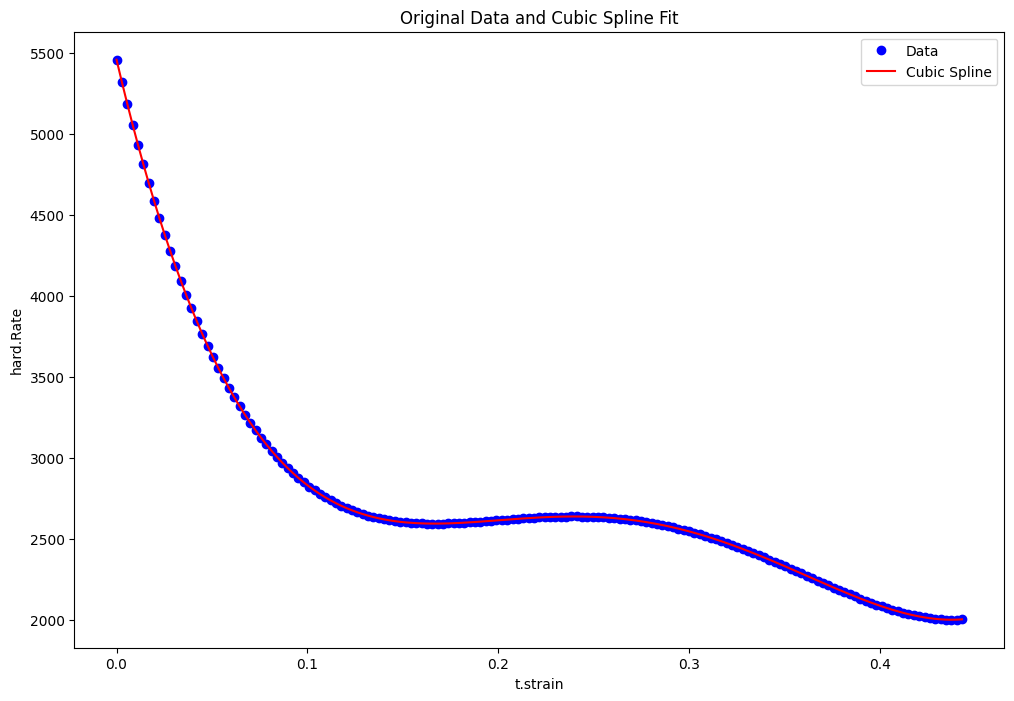

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.168   |   2596.524   |   142.796   |   94.965
2       |   0.171   |   2596.994   |   127.872   |   237.761
3       |   0.174   |   2597.843   |   113.327   |   365.633
4       |   0.177   |   2599.031   |   99.161   |   478.959

Average Slope of Printed Slopes: 294.32940928464495


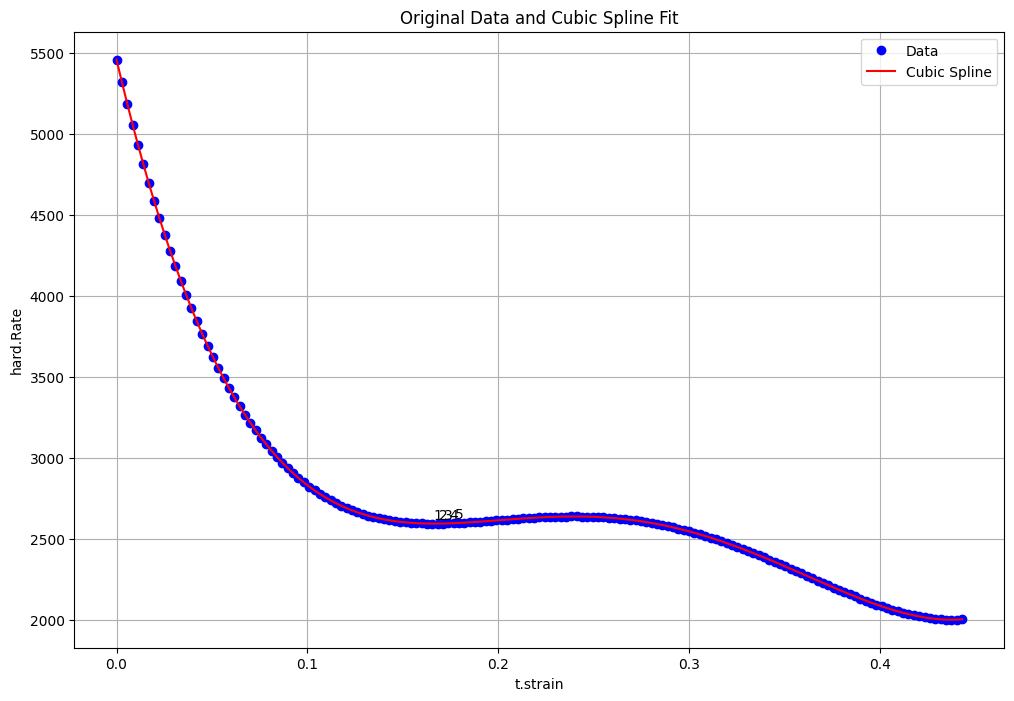


Minimum Slope: 94.96462998214434
Maximum Slope: 578.1208588004212
Finding best parameters...
Plotting comparison...


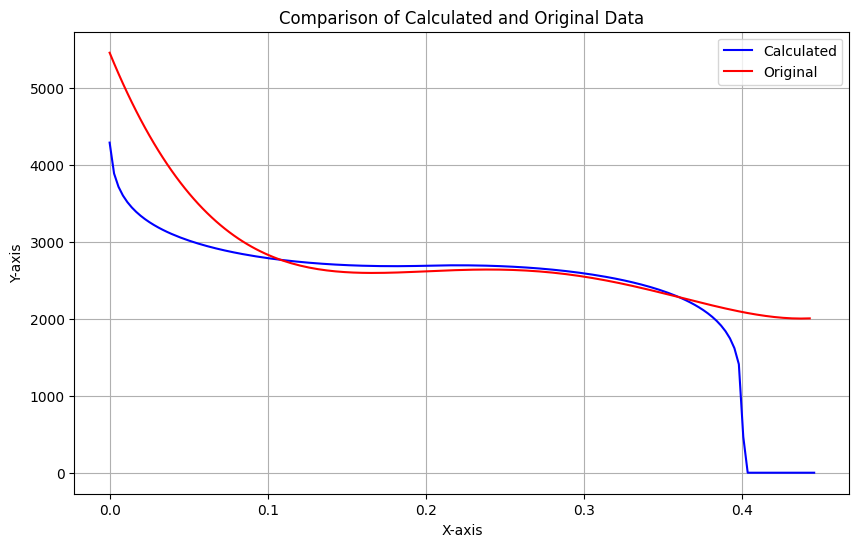

Extracting text and finding lemmas...
Finding max size chemical composition...

['CrMnFeCoNi', 'CoCrFeMnNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'NiFeCrCoMn', 'FeCrNiCoMn', 'FeCoNiCrMn', 'CoCrFeMnNi', 'CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CrMnFeCoNi', 'FeCrCoNiMn', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CoCrFeMnNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'FeNiCoCrMn', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CoCrFeNiMn']

Maximum sized chemical composition: CrMnFeCoNi
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-51
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-51/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-51/RS_ORANGE.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 7.16710865e-08  2.94644052e+06 -2.72551921e+06  8.20198681e

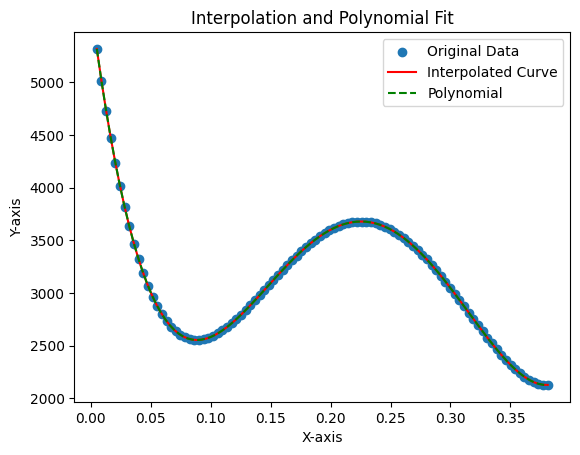

Original Y Values for the Roots:
For x = -32888470476615.007812, y = 689449370881648290167550562271412441609152319915486064148480.000000
For x = 0.379873, y = 2128.181859
For x = 0.225406, y = 3678.558698
For x = 0.088486, y = 2554.536997

Minimum b0: 2128.181859117733
Maximum b0: 2554.5369969884823
From_b0: 2000
To_b0: 2300
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.005   |   5315.466   |   -81297.295
2       |   0.009   |   5011.795   |   -75370.662
3       |   0.013   |   4730.649   |   -69679.280
4       |   0.017   |   4471.119   |   -64220.537
5       |   0.021   |   4232.312   |   -58989.904
6       |   0.024   |   4013.351   |   -53983.368
7       |   0.028   |   3813.376   |   -49196.776
8       |   0.032   |   3631.542   |   -44626.014
9       |   0.036   |   3467.020   |   -40266.956
10       |   0.040   |   3318.996   |   -36115.480
11       |   0.044   |   3186.675   |

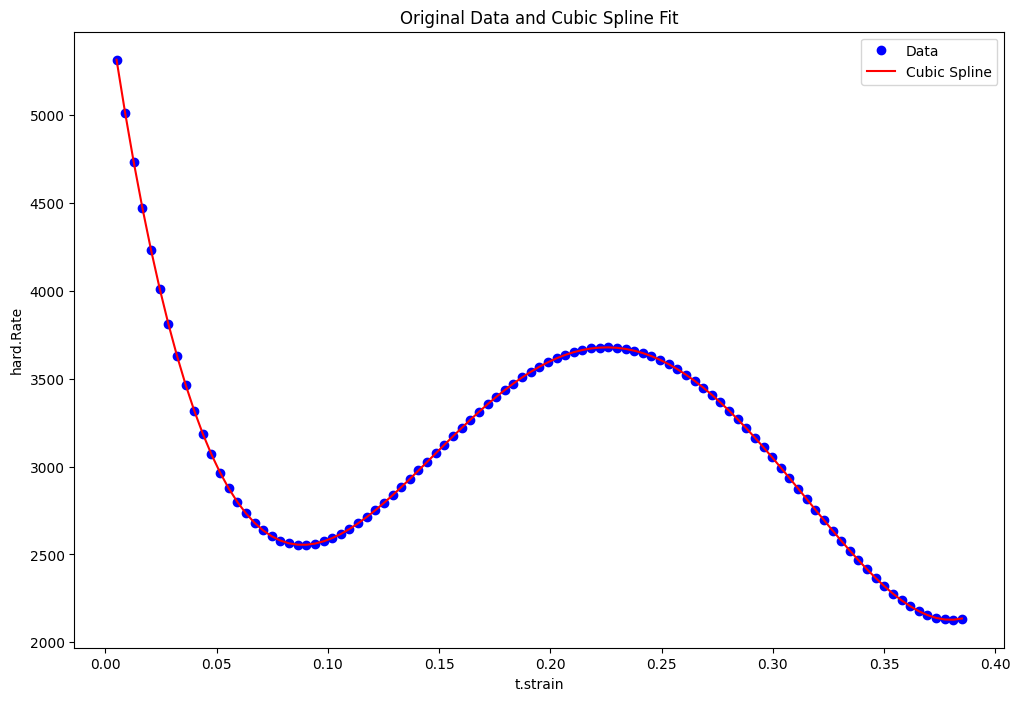

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.090   |   2555.307   |   1678.224   |   839.623
2       |   0.094   |   2561.864   |   1532.484   |   2517.846
3       |   0.098   |   2574.645   |   1390.867   |   4050.330
4       |   0.102   |   2593.092   |   1253.373   |   5441.198

Average Slope of Printed Slopes: 3212.2492139715473


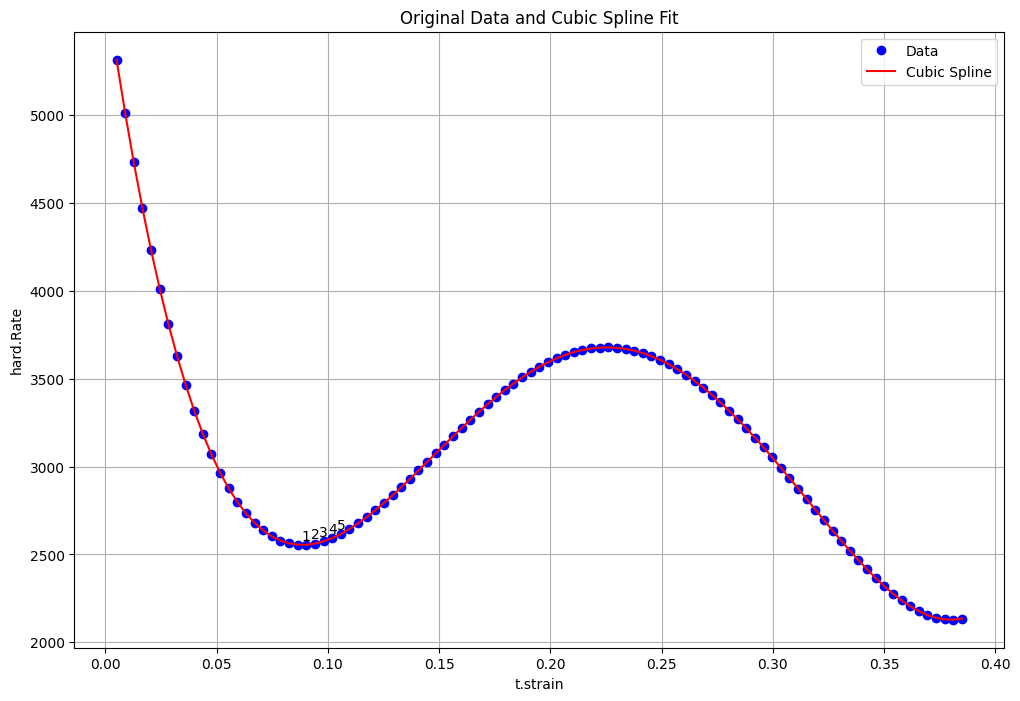


Minimum Slope: 839.6225570520127
Maximum Slope: 6694.570987866942
Finding best parameters...
Plotting comparison...


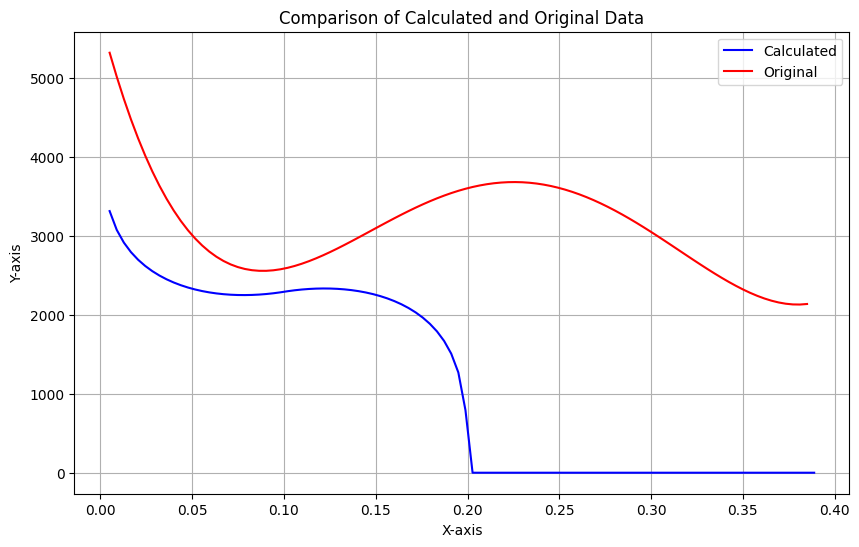

Extracting text and finding lemmas...
Finding max size chemical composition...

['INTRODUCTION', 'VOLUME50B', 'JUNE2019METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'MATERIALS', 'AISI1018', 'METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'VOLUME50B', 'JUNE2019', 'VOLUME50B', 'JUNE2019METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'SIMULINK', 'METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'VOLUME50B', 'JUNE2019', 'VOLUME50B', 'JUNE2019METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'VOLUME50B', 'JUNE2019', 'VOLUME50B', 'JUNE2019METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'VOLUME50B', 'JUNE2019', 'DISCUSSION', 'AISI1018', 'VOLUME50B', 'JUNE2019METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'VOLUME50B', 'JUNE2019', 'VOLUME50B', 'JUNE2019METALLURGICAL', 'MATERIALS', 'TRANSACTIONS', 'MATERIALS', 'TRANSACTIONS', 'VOLUME50B', 'JUNE2019', 'CONCLUSIONS', 'AISI1018', 'A

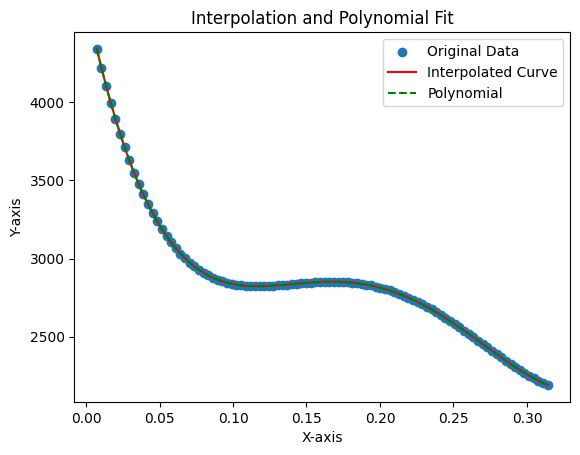

Original Y Values for the Roots:
For x = 999455496218.302979, y = 346080971934874540258125243717824339183400340691091456.000000
For x = 0.333256, y = 2150.586002
For x = 0.167682, y = 2851.247974
For x = 0.116953, y = 2822.430541

Minimum b0: 2822.430540996337
Maximum b0: 2851.2479741996876
From_b0: 2700
To_b0: 3000
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.007   |   4342.708   |   -39725.044
2       |   0.011   |   4220.693   |   -37451.098
3       |   0.014   |   4105.741   |   -35258.131
4       |   0.017   |   3997.598   |   -33145.309
5       |   0.020   |   3896.012   |   -31111.187
6       |   0.023   |   3800.735   |   -29154.482
7       |   0.026   |   3711.527   |   -27273.870
8       |   0.029   |   3628.147   |   -25468.034
9       |   0.033   |   3550.362   |   -23735.660
10       |   0.036   |   3477.941   |   -22075.430
11       |   0.039   |   3410.658   |   -20486

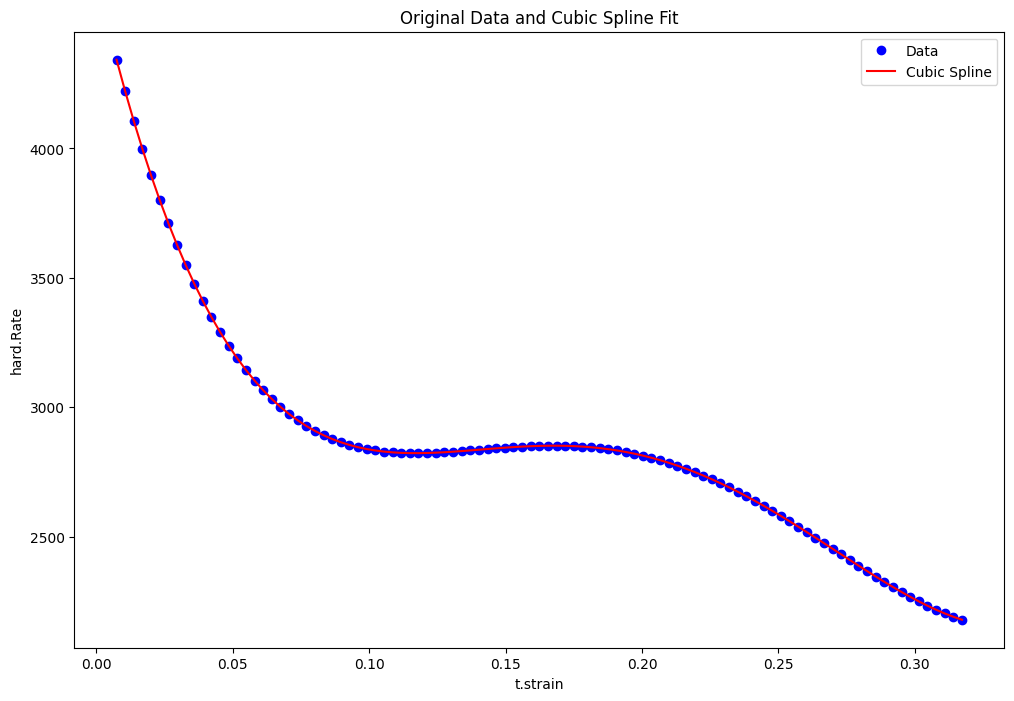

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.118   |   2822.475   |   209.961   |   80.662
2       |   0.121   |   2823.071   |   174.678   |   290.623
3       |   0.124   |   2824.276   |   140.712   |   465.301
4       |   0.128   |   2825.979   |   108.062   |   606.013

Average Slope of Printed Slopes: 360.649937719036


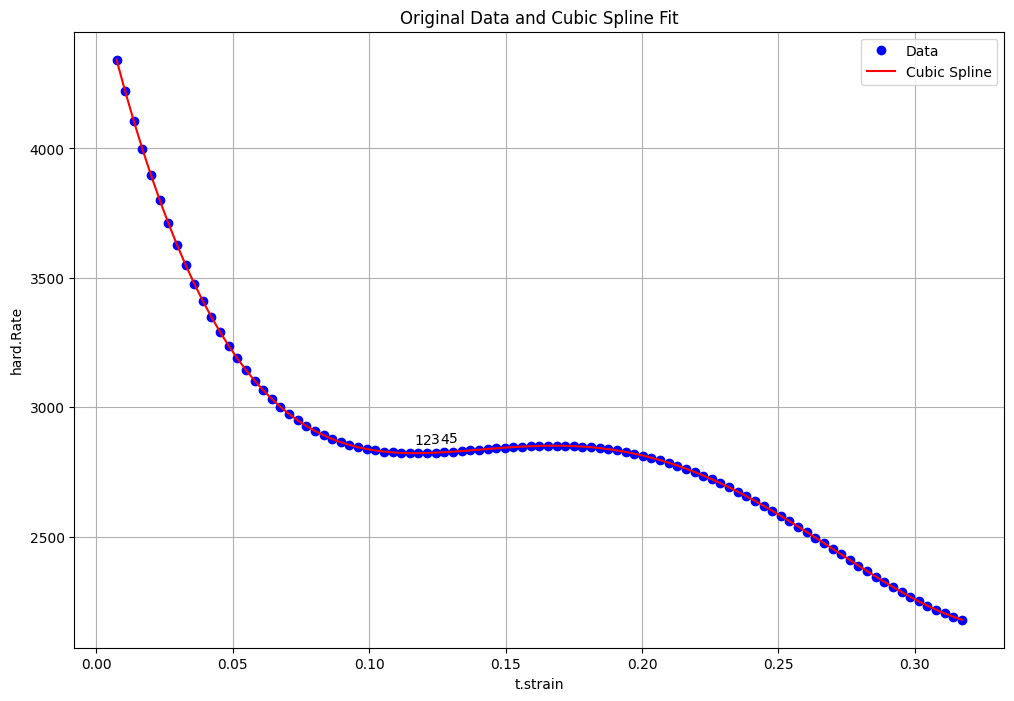


Minimum Slope: 80.66214760084762
Maximum Slope: 714.0746270412175
Finding best parameters...
Plotting comparison...


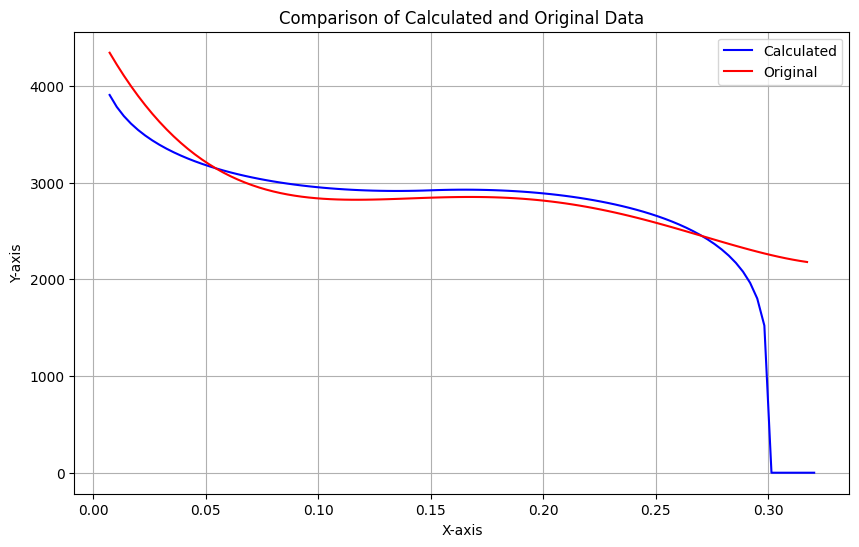

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe40Mn20Co20Cr15Si5HEA', 'CoCrMnFeNi', 'Fe40Mn20Co20Cr15Si5', 'Fe40Mn20Co20Cr15Si5', 'Fe40Mn20Co20Cr15Si5', 'S350S150D']

Maximum sized chemical composition: Fe40Mn20Co20Cr15Si5HEA
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-32
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-32/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-32/RS_144UM.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 3.47713511e-08 -2.13637290e+05  1.69747255e+05 -4.79809045e+04
  5.06663588e+03  1.06298028e+03]

Polynomial Equation: 0.000000 x^5 + -213637.290495 x^4 + 169747.255245 x^3 + -47980.904546 x^2 + 5066.635880 x^1 + 1062.980283

Derivative Equation: 0.000000 x^4 + -854549.161981 x^3 + 509241.765736 x^2 + -95961.809093 x^1 + 5066.635880

Roots (Z

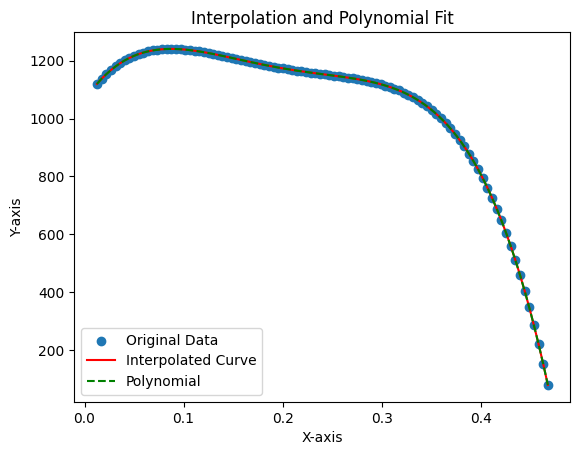

Original Y Values for the Roots:
For x = 4915248528829.150391+0.000000j, y = -24939571333520079308208699155184674899922407784187953152.000000
For x = 0.254278+0.056648j, y = 1240.151743

Minimum b0: -2.493957133352008e+55
Maximum b0: 1240.1517430632261
From_b0: -24939571333520077776938048010961589314736674341231001700
To_b0: -24939571333520077776938048010961589314736674341231001400
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.013   |   1119.382   |   3939.837
2       |   0.017   |   1136.967   |   3558.202
3       |   0.022   |   1152.808   |   3196.894
4       |   0.027   |   1167.001   |   2855.576
5       |   0.031   |   1179.638   |   2533.666
6       |   0.036   |   1190.809   |   2230.649
7       |   0.041   |   1200.602   |   1945.991
8       |   0.045   |   1209.100   |   1679.163
9       |   0.050   |   1216.388   |   1429.635
10       |   0.055   |   1222.544   |   1196.877

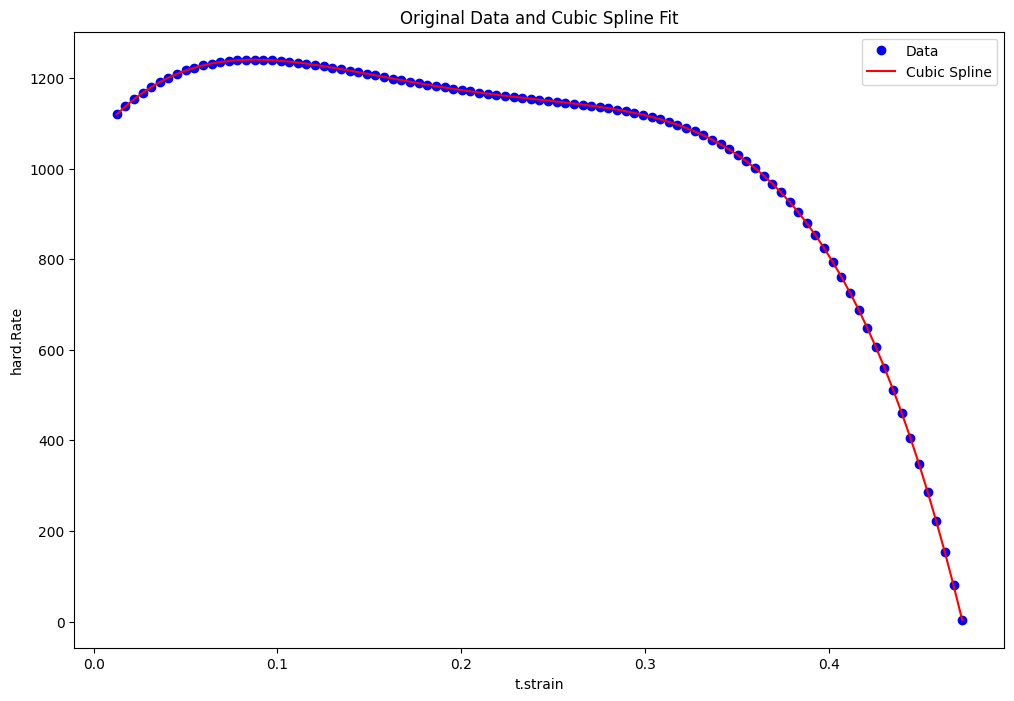

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.013   |   1119.382   |   -381.634   |   3939.837
2       |   0.017   |   1136.967   |   -361.308   |   3558.202
3       |   0.022   |   1152.808   |   -341.318   |   3196.894
4       |   0.027   |   1167.001   |   -321.910   |   2855.576

Average Slope of Printed Slopes: 3387.627220900995


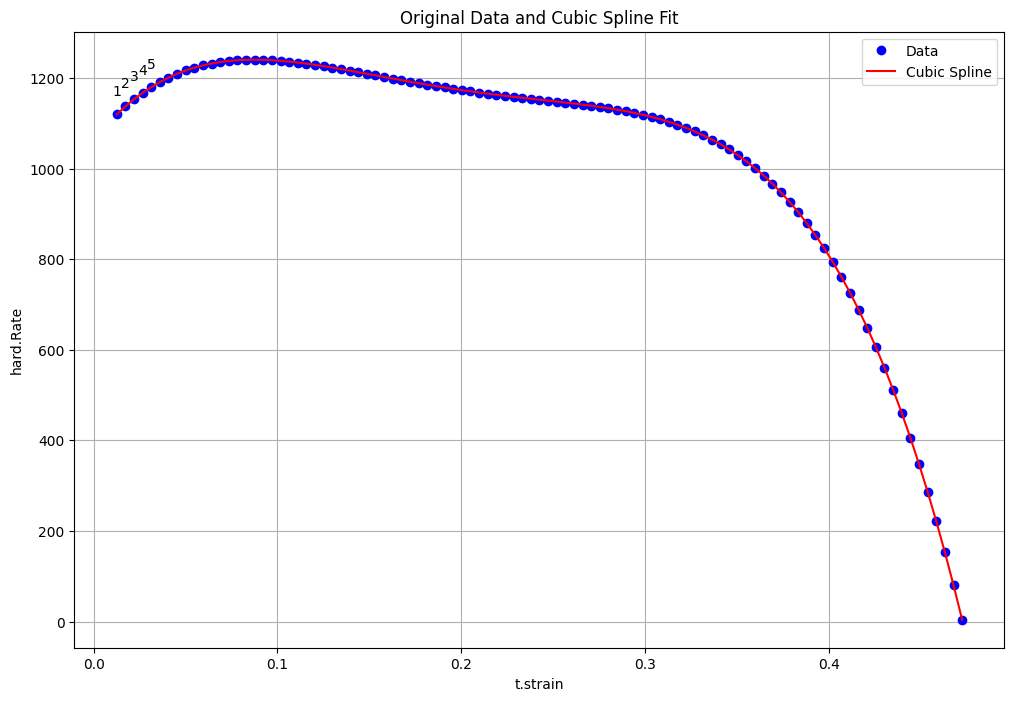


Minimum Slope: 2533.666206258229
Maximum Slope: 3939.836600259606
Finding best parameters...
Plotting comparison...


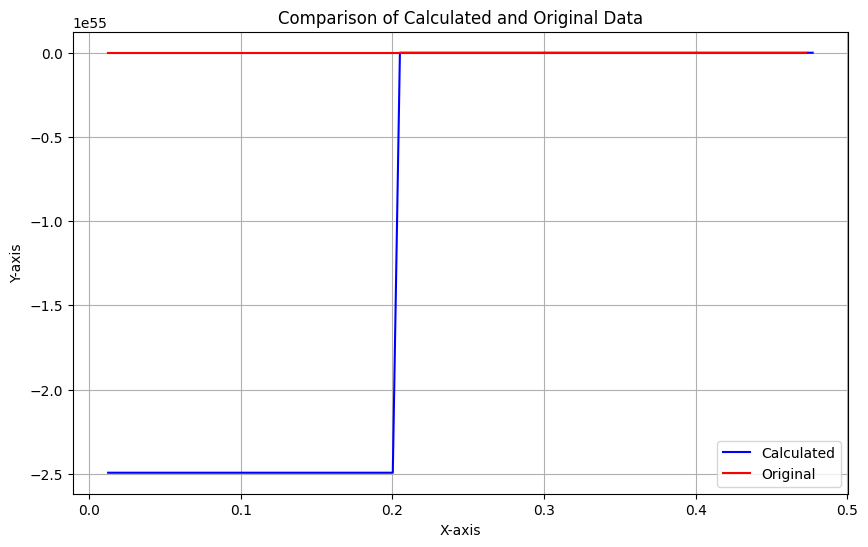

Extracting text and finding lemmas...
Finding max size chemical composition...

['ABSTRACT', 'CoCrFeMnNi', 'CoCrFeMnNi', 'Fe40Mn20Co20Cr15Si5', 'CoCrFeMnNi', 'CoCrFeNiMn', 'Al0.3CoCrFeNi', 'Al8Co17Cr17Cu8Fe17Ni33', 'Al0.5CoCrCuFeNi', 'AlCoCrCuFeNi', 'CoCrFeMnNi', 'CoCrFeNi', 'Al0.4Hf0.6NbTaTiZr', 'AlMo0.5NbTa0.5TiZr', 'NbTiV2Zr', 'BCC3RHEA', 'CrNbTiZr', 'CrNbTiVZr', 'VMoNbTaW', 'Al0.25NbTaTiV', 'Al0.5NbTaTiV', 'AlNbTaTiV', 'CrHfNbTiZr', 'HfNbTiVZr', 'Al0.3NbTa0.8Ti1.4V0.2Zr1', 'Al0.5NbTa0.8Ti1.5V0.2Zr', 'BCC2RHEA', 'Al0.3NbTaTi1.4Zr1', 'BCC2RHEA', 'AlNb1.5Ta0.5Ti1.5V0.2Zr0', 'Fe50Mn30Co10Cr10', 'Fe40Mn20Co10Cr15Si5', 'CoCrFeNi', 'CuNiAlCoCrFeSi', 'CoCrFeMnNi', 'Fe42Mn28Co10Cr15Si5', 'Fe39Mn20Co10Cr15Si5Al1', 'Al0.1CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeNiMn', 'CoCrFeMnCu', 'CoMoFeMnNi', 'TiCrFeMnNi', 'CoVFeMnNi', 'CoCrVMnNi', 'CoCrFeMnNi', 'CoCrFeMn0.5Ni', 'CuCoCrFeNi', 'CoCrFeNi', 'CoCrFeNiMn', 'Al0.1CoCrFeNi', 'Al0.1CoCrFeNi', 'Al0.1CoCrFeNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'Cr26Mn20Fe20Co20Ni

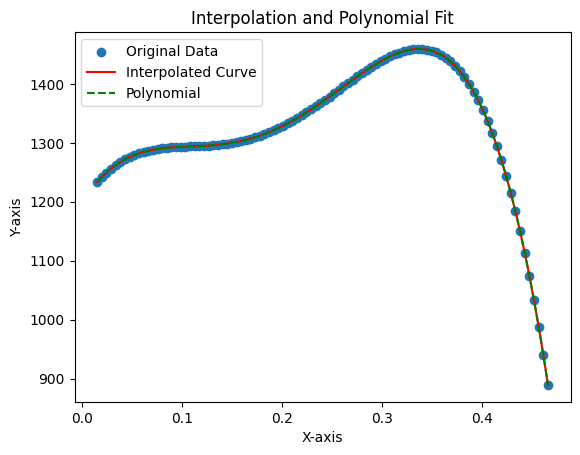

Original Y Values for the Roots:
For x = -4762976055213.761719+0.000000j, y = -17410304592547201289072731731303055903219512380959490048.000000
For x = 0.336694+0.000000j, y = 1459.368300

Minimum b0: -1.74103045925472e+55
Maximum b0: 1459.3683000417034
From_b0: -17410304592547200693578589619660744842313949375365120100
To_b0: -17410304592547200693578589619660744842313949375365119800
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.015   |   1233.290   |   1945.396
2       |   0.019   |   1241.848   |   1738.299
3       |   0.024   |   1249.476   |   1545.478
4       |   0.029   |   1256.240   |   1366.673
5       |   0.033   |   1262.205   |   1201.436
6       |   0.038   |   1267.432   |   1049.371
7       |   0.043   |   1271.982   |   910.066
8       |   0.047   |   1275.914   |   783.114
9       |   0.052   |   1279.283   |   668.107
10       |   0.057   |   1282.144   |   564.638
11 

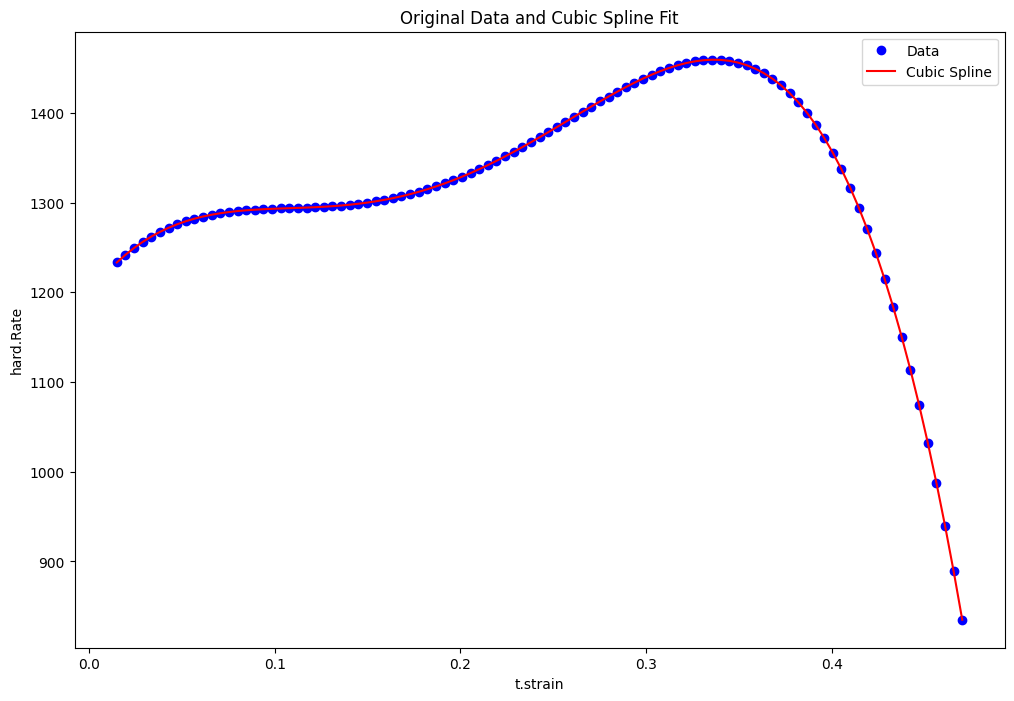

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.015   |   1233.290   |   -207.097   |   1945.396
2       |   0.019   |   1241.848   |   -192.822   |   1738.299
3       |   0.024   |   1249.476   |   -178.805   |   1545.478
4       |   0.029   |   1256.240   |   -165.237   |   1366.673

Average Slope of Printed Slopes: 1648.961436209951


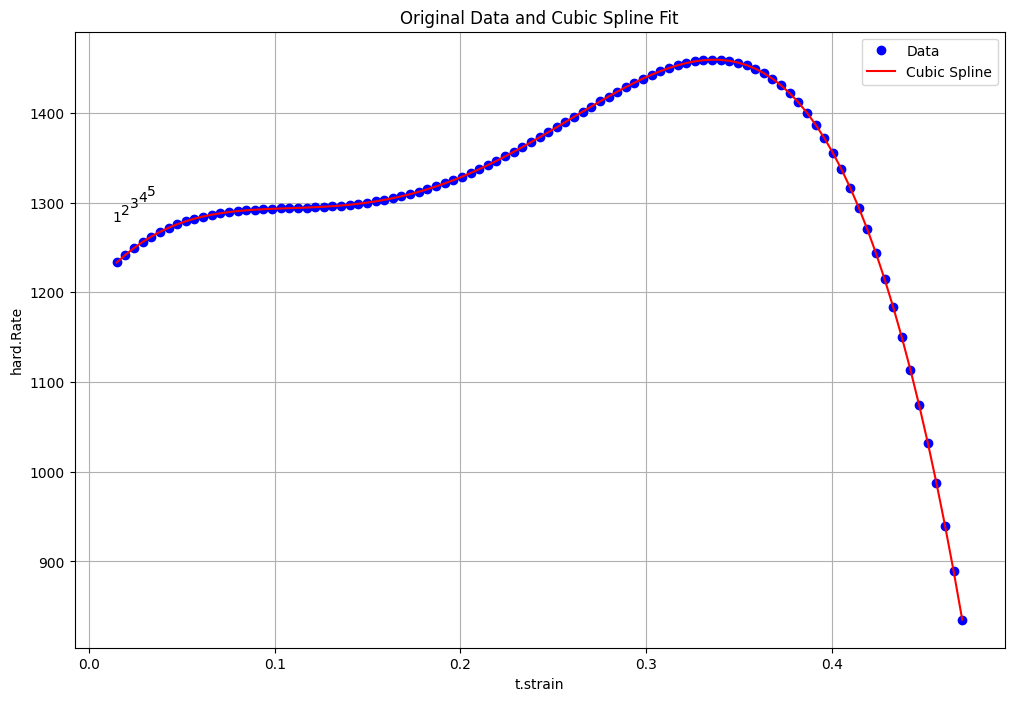


Minimum Slope: 1201.4359424433753
Maximum Slope: 1945.3961288172482
Finding best parameters...
Plotting comparison...


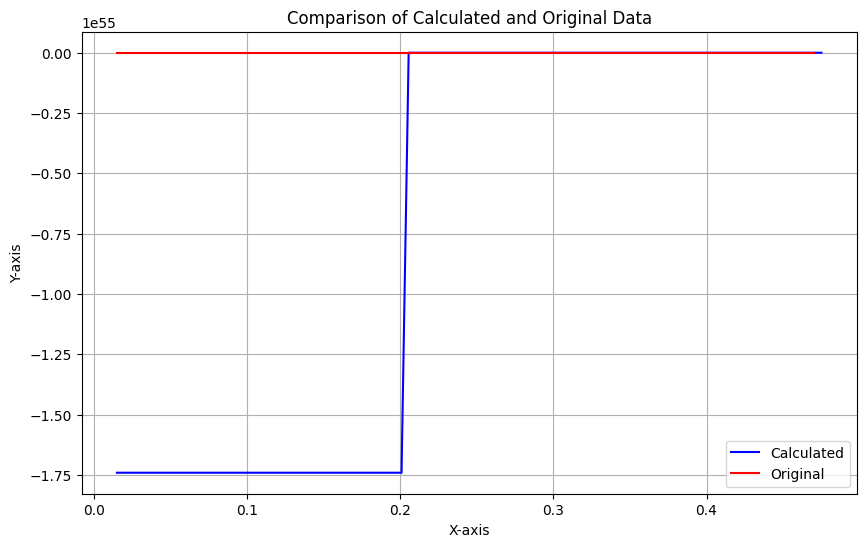

Extracting text and finding lemmas...
Finding max size chemical composition...

['ABSTRACT', 'CoCrFeMnNi', 'CoCrFeMnNi', 'Fe40Mn20Co20Cr15Si5', 'CoCrFeMnNi', 'CoCrFeNiMn', 'Al0.3CoCrFeNi', 'Al8Co17Cr17Cu8Fe17Ni33', 'Al0.5CoCrCuFeNi', 'AlCoCrCuFeNi', 'CoCrFeMnNi', 'CoCrFeNi', 'Al0.4Hf0.6NbTaTiZr', 'AlMo0.5NbTa0.5TiZr', 'NbTiV2Zr', 'BCC3RHEA', 'CrNbTiZr', 'CrNbTiVZr', 'VMoNbTaW', 'Al0.25NbTaTiV', 'Al0.5NbTaTiV', 'AlNbTaTiV', 'CrHfNbTiZr', 'HfNbTiVZr', 'Al0.3NbTa0.8Ti1.4V0.2Zr1', 'Al0.5NbTa0.8Ti1.5V0.2Zr', 'BCC2RHEA', 'Al0.3NbTaTi1.4Zr1', 'BCC2RHEA', 'AlNb1.5Ta0.5Ti1.5V0.2Zr0', 'Fe50Mn30Co10Cr10', 'Fe40Mn20Co10Cr15Si5', 'CoCrFeNi', 'CuNiAlCoCrFeSi', 'CoCrFeMnNi', 'Fe42Mn28Co10Cr15Si5', 'Fe39Mn20Co10Cr15Si5Al1', 'Al0.1CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeNiMn', 'CoCrFeMnCu', 'CoMoFeMnNi', 'TiCrFeMnNi', 'CoVFeMnNi', 'CoCrVMnNi', 'CoCrFeMnNi', 'CoCrFeMn0.5Ni', 'CuCoCrFeNi', 'CoCrFeNi', 'CoCrFeNiMn', 'Al0.1CoCrFeNi', 'Al0.1CoCrFeNi', 'Al0.1CoCrFeNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'Cr26Mn20Fe20Co20Ni

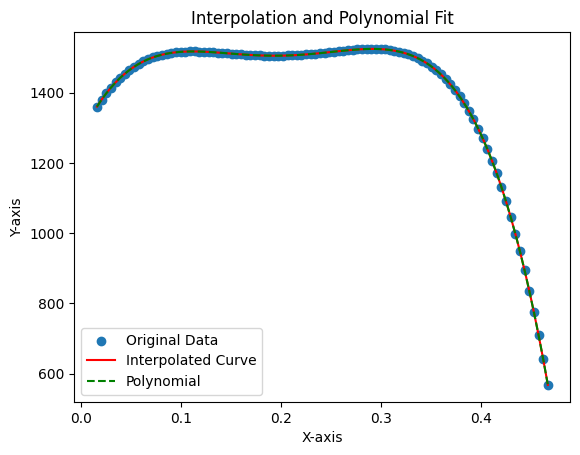

Original Y Values for the Roots:
For x = -13654332967188.822266, y = -1656745552420565169336463167062463592583231359644105441280.000000
For x = 0.291118, y = 1524.615314
For x = 0.193517, y = 1505.300666
For x = 0.111556, y = 1517.423121

Minimum b0: 1517.423121300885
Maximum b0: 1524.6153136021107
From_b0: 1400
To_b0: 1700
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.016   |   1360.218   |   4463.902
2       |   0.020   |   1380.024   |   4066.574
3       |   0.025   |   1398.034   |   3691.081
4       |   0.030   |   1414.350   |   3337.063
5       |   0.034   |   1429.071   |   3003.887
6       |   0.039   |   1442.291   |   2690.997
7       |   0.044   |   1454.103   |   2397.815
8       |   0.048   |   1464.598   |   2123.769
9       |   0.053   |   1473.864   |   1868.285
10       |   0.058   |   1481.984   |   1630.789
11       |   0.062   |   1489.042   |   1410.708
12       

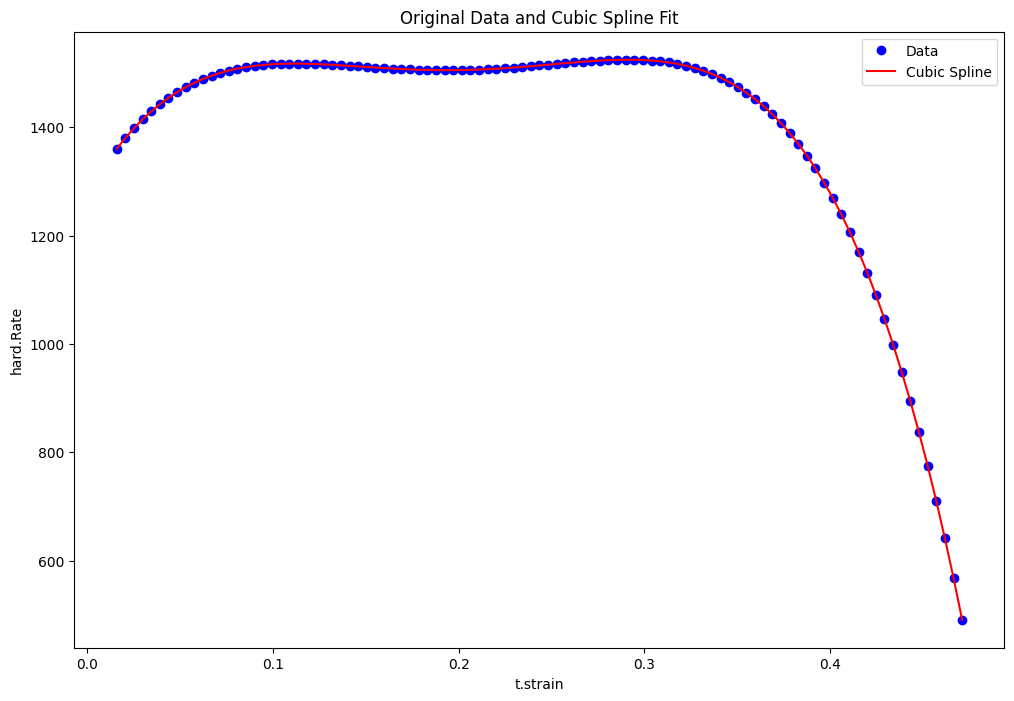

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.016   |   1360.218   |   -397.329   |   4463.902
2       |   0.020   |   1380.024   |   -375.492   |   4066.574
3       |   0.025   |   1398.034   |   -354.019   |   3691.081
4       |   0.030   |   1414.350   |   -333.175   |   3337.063

Average Slope of Printed Slopes: 3889.6549664248005


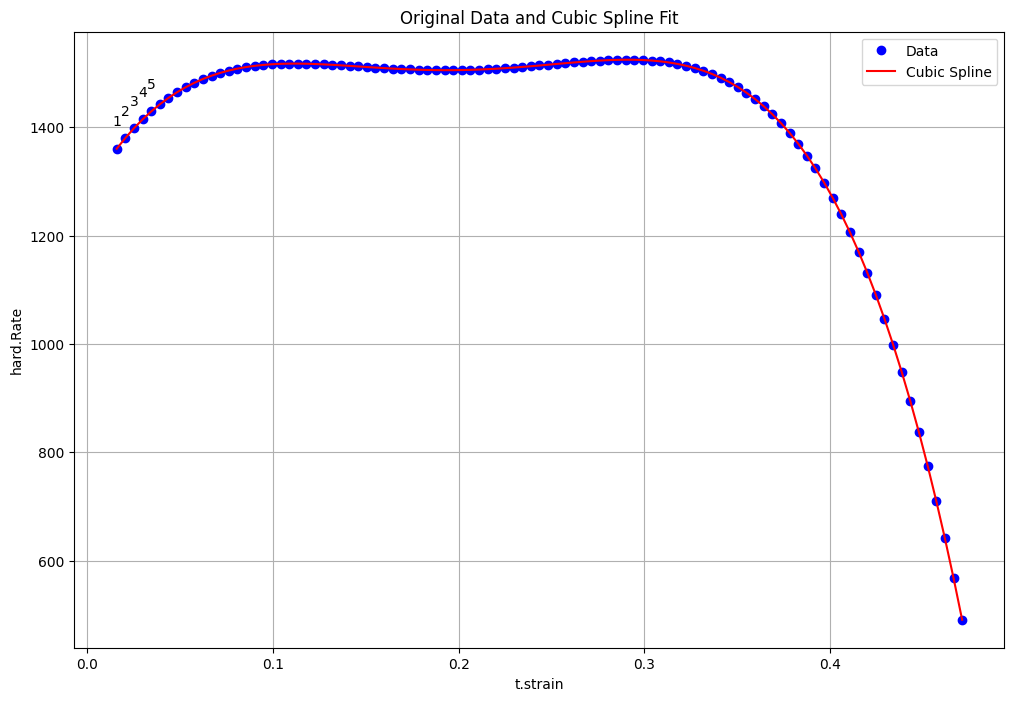


Minimum Slope: 3003.887283925985
Maximum Slope: 4463.902432359132
Finding best parameters...
Plotting comparison...


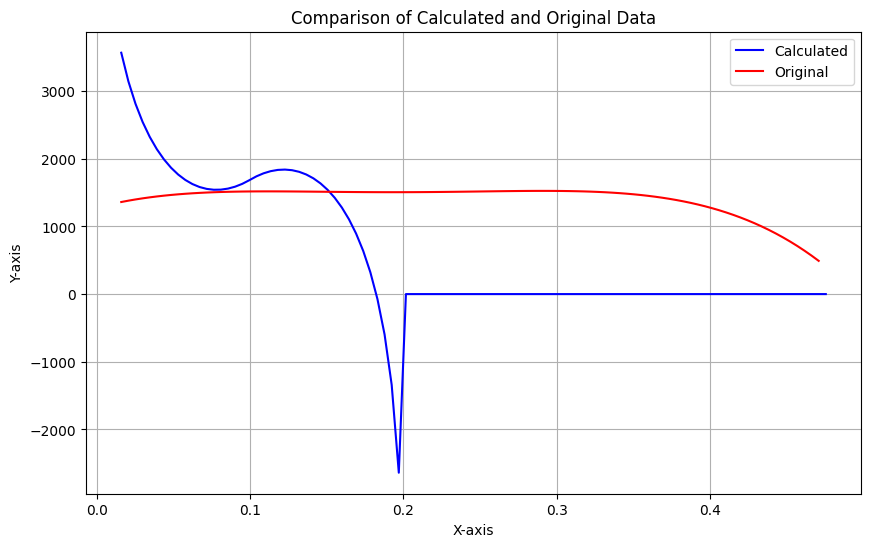

Extracting text and finding lemmas...
Finding max size chemical composition...

['ABSTRACT', 'CoCrFeMnNi', 'CoCrFeMnNi', 'Fe40Mn20Co20Cr15Si5', 'CoCrFeMnNi', 'CoCrFeNiMn', 'Al0.3CoCrFeNi', 'Al8Co17Cr17Cu8Fe17Ni33', 'Al0.5CoCrCuFeNi', 'AlCoCrCuFeNi', 'CoCrFeMnNi', 'CoCrFeNi', 'Al0.4Hf0.6NbTaTiZr', 'AlMo0.5NbTa0.5TiZr', 'NbTiV2Zr', 'BCC3RHEA', 'CrNbTiZr', 'CrNbTiVZr', 'VMoNbTaW', 'Al0.25NbTaTiV', 'Al0.5NbTaTiV', 'AlNbTaTiV', 'CrHfNbTiZr', 'HfNbTiVZr', 'Al0.3NbTa0.8Ti1.4V0.2Zr1', 'Al0.5NbTa0.8Ti1.5V0.2Zr', 'BCC2RHEA', 'Al0.3NbTaTi1.4Zr1', 'BCC2RHEA', 'AlNb1.5Ta0.5Ti1.5V0.2Zr0', 'Fe50Mn30Co10Cr10', 'Fe40Mn20Co10Cr15Si5', 'CoCrFeNi', 'CuNiAlCoCrFeSi', 'CoCrFeMnNi', 'Fe42Mn28Co10Cr15Si5', 'Fe39Mn20Co10Cr15Si5Al1', 'Al0.1CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeNiMn', 'CoCrFeMnCu', 'CoMoFeMnNi', 'TiCrFeMnNi', 'CoVFeMnNi', 'CoCrVMnNi', 'CoCrFeMnNi', 'CoCrFeMn0.5Ni', 'CuCoCrFeNi', 'CoCrFeNi', 'CoCrFeNiMn', 'Al0.1CoCrFeNi', 'Al0.1CoCrFeNi', 'Al0.1CoCrFeNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'Cr26Mn20Fe20Co20Ni

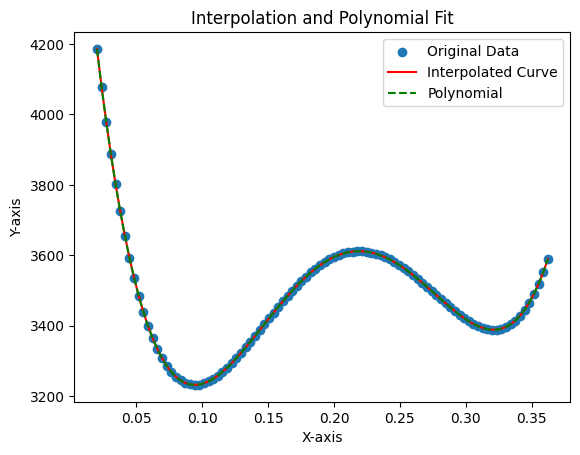

Original Y Values for the Roots:
For x = -483297645503677.812500, y = 19480718266037059372196276165498241579701554013283603562044063744.000000
For x = 0.321123, y = 3388.656265
For x = 0.218958, y = 3611.760889
For x = 0.094253, y = 3232.015310

Minimum b0: 3232.015309875539
Maximum b0: 3388.6562651666927
From_b0: 3100
To_b0: 3400
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.020   |   4185.883   |   -31768.082
2       |   0.024   |   4078.022   |   -29373.501
3       |   0.027   |   3978.436   |   -27078.663
4       |   0.031   |   3886.774   |   -24882.373
5       |   0.034   |   3802.693   |   -22782.564
6       |   0.038   |   3725.855   |   -20777.400
7       |   0.041   |   3655.929   |   -18864.986
8       |   0.045   |   3592.592   |   -17043.442
9       |   0.048   |   3535.525   |   -15310.882
10       |   0.052   |   3484.419   |   -13665.425
11       |   0.055   |   3438.9

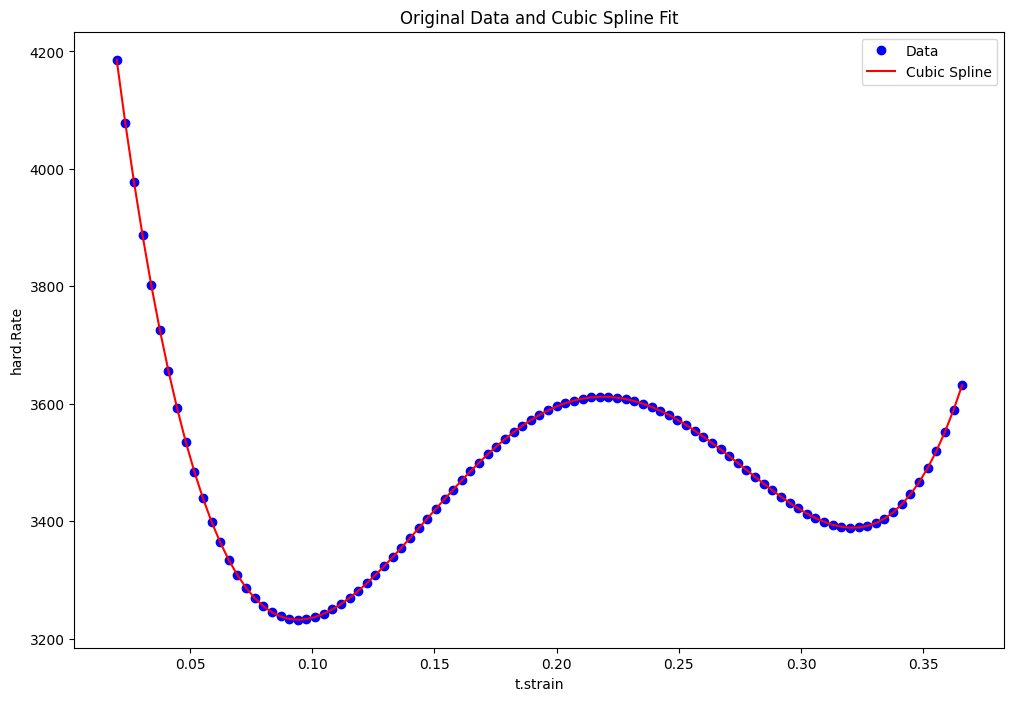

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.098   |   3233.143   |   623.792   |   656.211
2       |   0.101   |   3236.578   |   564.942   |   1280.003
3       |   0.105   |   3242.109   |   507.975   |   1844.945
4       |   0.108   |   3249.533   |   452.892   |   2352.920

Average Slope of Printed Slopes: 1533.519908795029


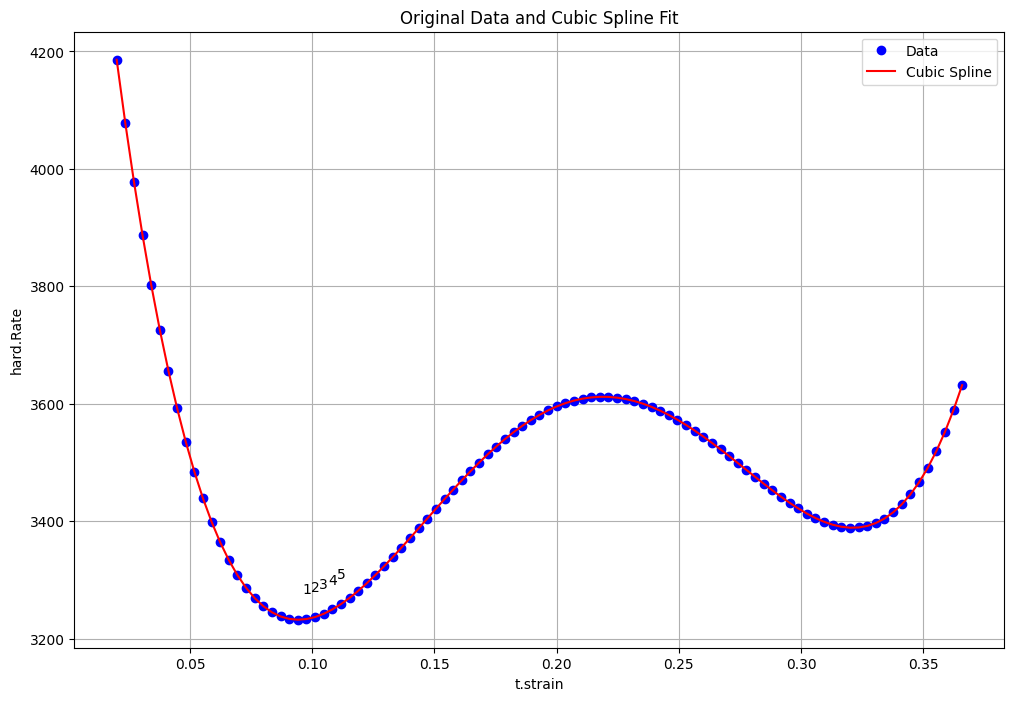


Minimum Slope: 656.2112353436515
Maximum Slope: 2805.8117264484717
Finding best parameters...
Plotting comparison...


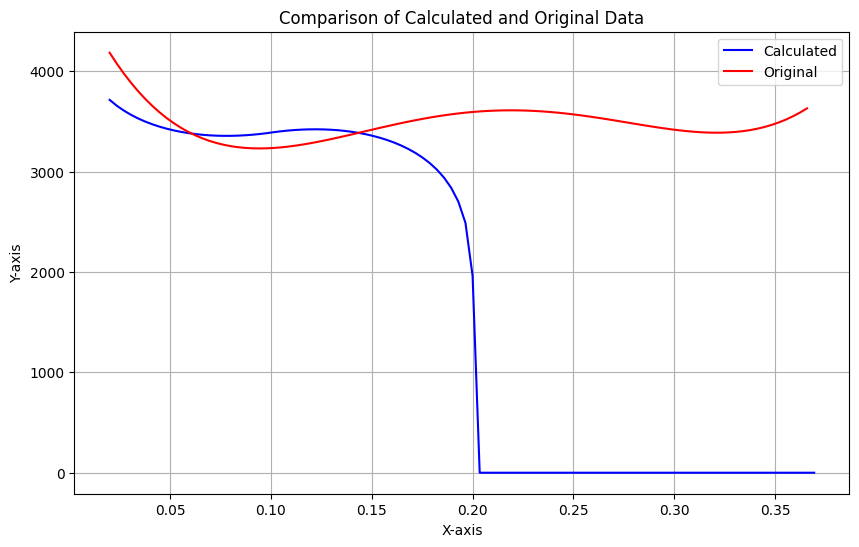

Extracting text and finding lemmas...
Finding max size chemical composition...

[]
No chemical compositions found in the text.
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-39
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-39/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-39/CRSA_620_RS.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-1.82622956e-06 -3.92270510e+06  2.80269606e+06 -6.90105042e+05
  6.43117050e+04  4.40172008e+02]

Polynomial Equation: -0.000002 x^5 + -3922705.104829 x^4 + 2802696.057757 x^3 + -690105.042037 x^2 + 64311.704969 x^1 + 440.172008

Derivative Equation: -0.000009 x^4 + -15690820.419316 x^3 + 8408088.173271 x^2 + -1380210.084074 x^1 + 64311.704969

Roots (Zeros) of the Derivative Equation: [-1.71838423e+12  2.46168990e-01  2.10651374e-01  7.90399642e-02]

For x = -171838423094

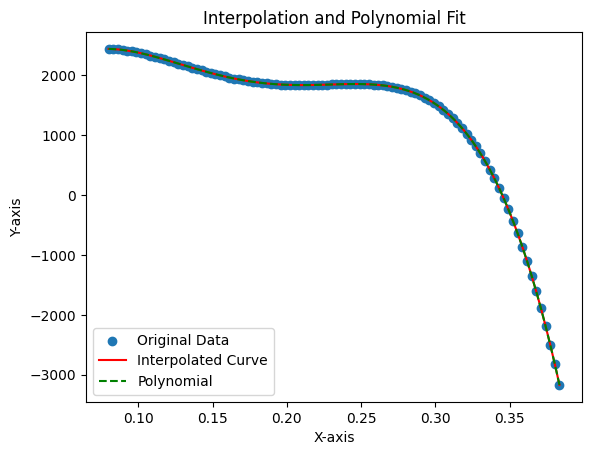

Original Y Values for the Roots:
For x = -1718384230945.957275, y = -6840640557003971923362570047628145184053240313862422528.000000
For x = 0.246169, y = 1856.336150
For x = 0.210651, y = 1838.834076
For x = 0.079040, y = 2442.900189

Minimum b0: 1838.8340755162988
Maximum b0: 1856.3361497335343
From_b0: 1700
To_b0: 2000
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.080   |   2442.743   |   -327.556
2       |   0.083   |   2440.120   |   -1333.998
3       |   0.086   |   2434.484   |   -2253.225
4       |   0.089   |   2426.106   |   -3087.068
5       |   0.093   |   2415.248   |   -3838.695
6       |   0.096   |   2402.162   |   -4510.915
7       |   0.099   |   2387.093   |   -5106.635
8       |   0.102   |   2370.276   |   -5628.734
9       |   0.105   |   2351.936   |   -6080.100
10       |   0.108   |   2332.291   |   -6463.618
11       |   0.111   |   2311.548   |   -6782.173
12

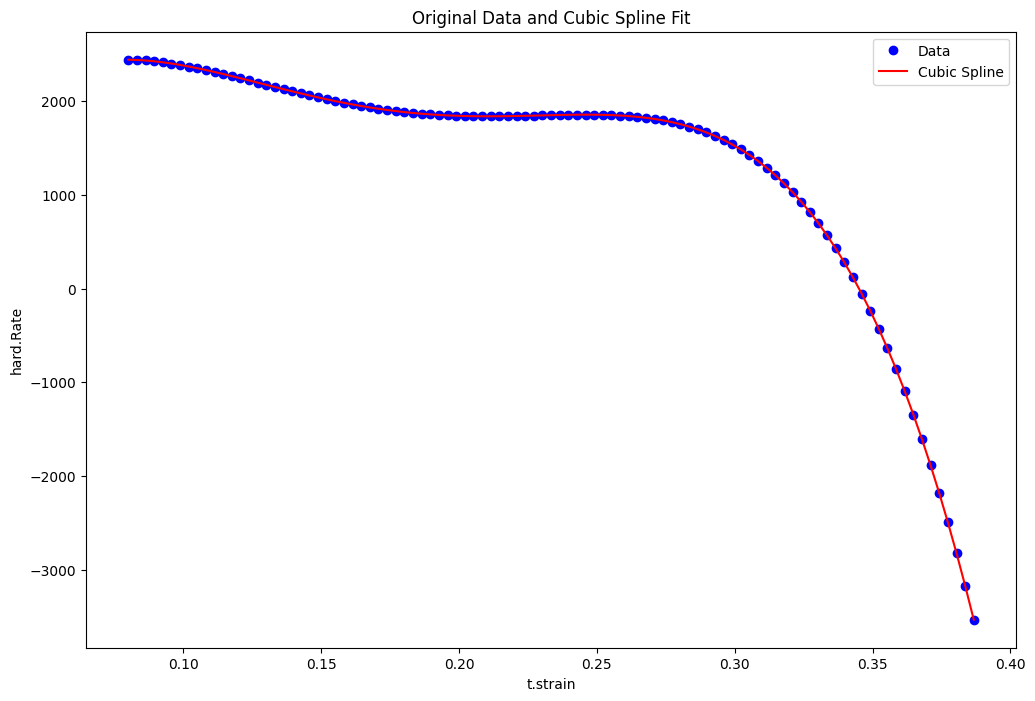

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.211   |   1838.857   |   206.394   |   56.914
2       |   0.215   |   1839.366   |   173.246   |   263.308
3       |   0.218   |   1840.470   |   137.213   |   436.554
4       |   0.221   |   1842.061   |   98.295   |   573.767

Average Slope of Printed Slopes: 332.6360149445077


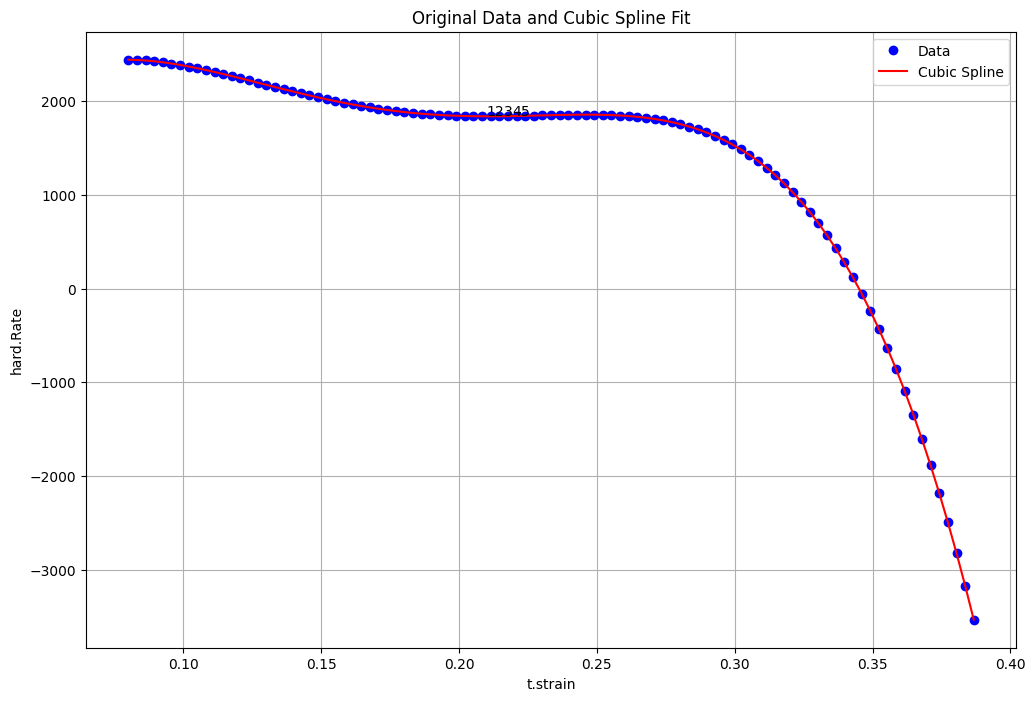


Minimum Slope: 56.91435345960751
Maximum Slope: 672.0621023752543
Finding best parameters...
Plotting comparison...


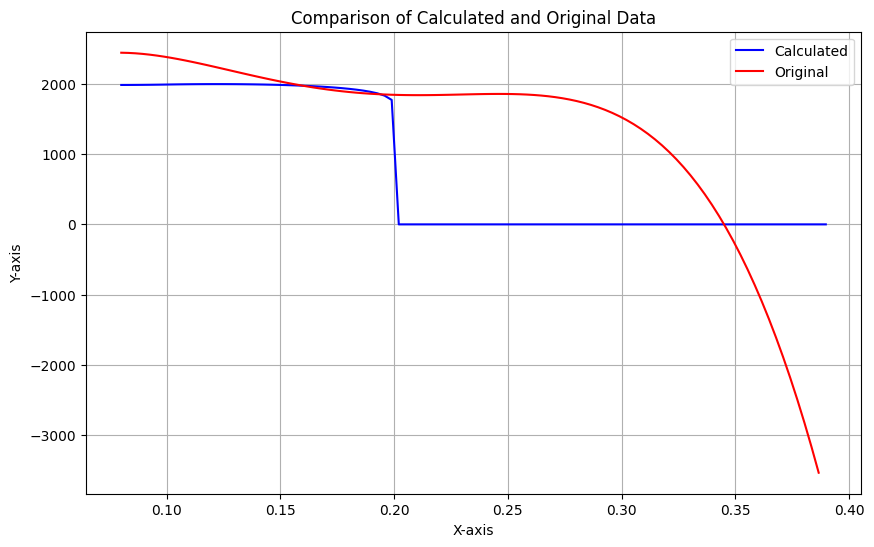

Extracting text and finding lemmas...
Finding max size chemical composition...

['Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'INCONEL800', 'Cr23Fe46Ni31', 'INCONEL600', 'Ni74Cr18Fe8', 'Cr18Fe67Mn2Mo1Ni12', 'Al0.3CoCrFeNi', 'CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.5CoCrCuFeNi', 'NbCrMo0.5Ta0.5TiZr', 'AlCrFeCuCo', 'CoCrFeMnNi', 'Al0.3CoCrFeNi', 'Al0.5CoCrCuFeNi', 'AlCoCrCuFeNi', 'TaNbHfZrTi', 'FeMnNiCoCr', 'Al0.3CoFeCrNi', 'Al0.3CuFeCrNi2', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'CoCrFeNiNb', 'CoCrFeNiNb0', 'Al0.3CoCrFeNi', 'AlCoCrFeNi']

Maximum sized chemical composition: Cr18Fe67Mn2Mo1Ni12
Data has been updated in data.json
JSON DATA SAVED

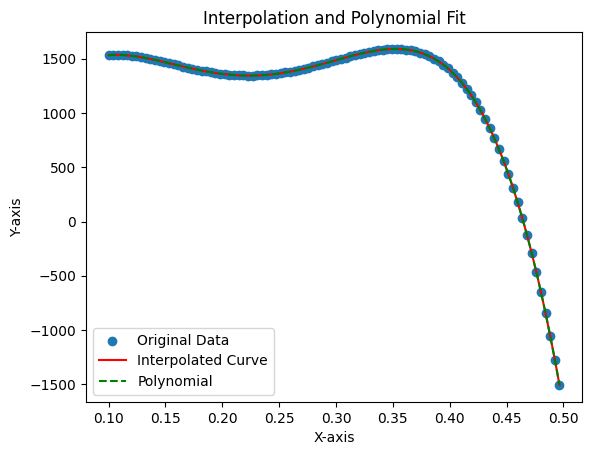

Original Y Values for the Roots:
For x = 11681615743334.353516, y = -3548674196154825279297079890305949837727538882606044020736.000000
For x = 0.352315, y = 1590.551196
For x = 0.223640, y = 1344.911627
For x = 0.106474, y = 1536.239770

Minimum b0: 1536.2397695431107
Maximum b0: 1590.5511958550953
From_b0: 1400
To_b0: 1700
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.100   |   1533.812   |   769.462
2       |   0.104   |   1535.921   |   269.869
3       |   0.108   |   1536.083   |   -183.009
4       |   0.112   |   1534.487   |   -590.161
5       |   0.116   |   1531.317   |   -953.306
6       |   0.120   |   1526.750   |   -1273.964
7       |   0.125   |   1520.956   |   -1553.709
8       |   0.129   |   1514.099   |   -1794.101
9       |   0.133   |   1506.337   |   -1996.704
10       |   0.137   |   1497.821   |   -2163.080
11       |   0.141   |   1488.696   |   -2294.793
12   

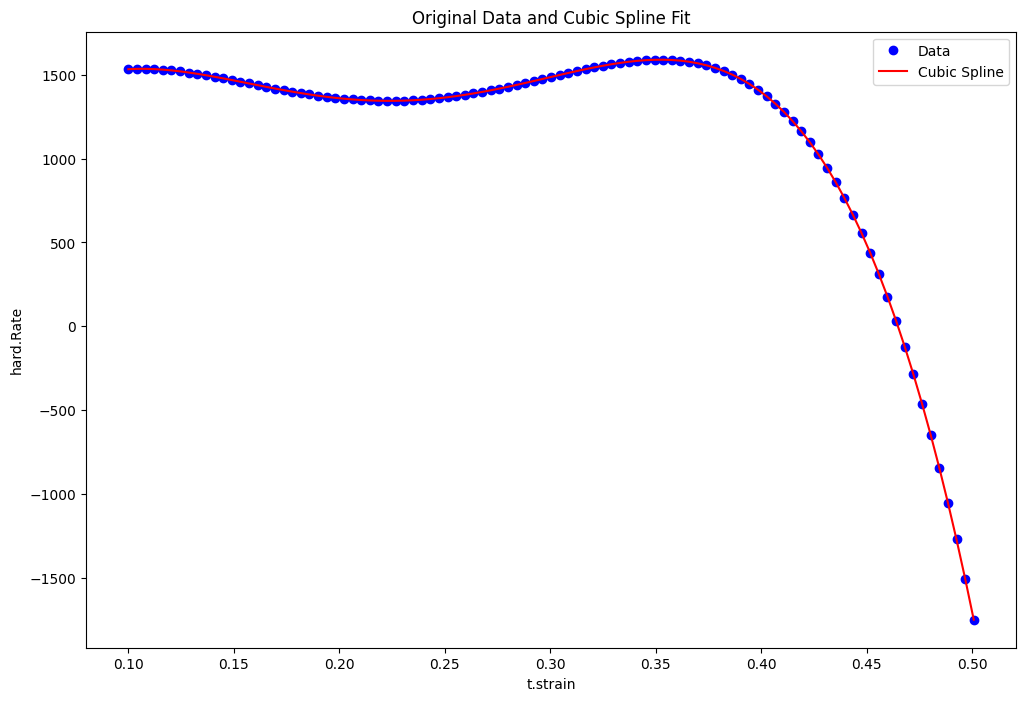

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.100   |   1533.812   |   -499.593   |   769.462
2       |   0.104   |   1535.921   |   -91.225   |   269.869
3       |   0.227   |   1345.189   |   235.475   |   178.644
4       |   0.231   |   1346.401   |   234.192   |   414.119

Average Slope of Printed Slopes: 408.0233729451405


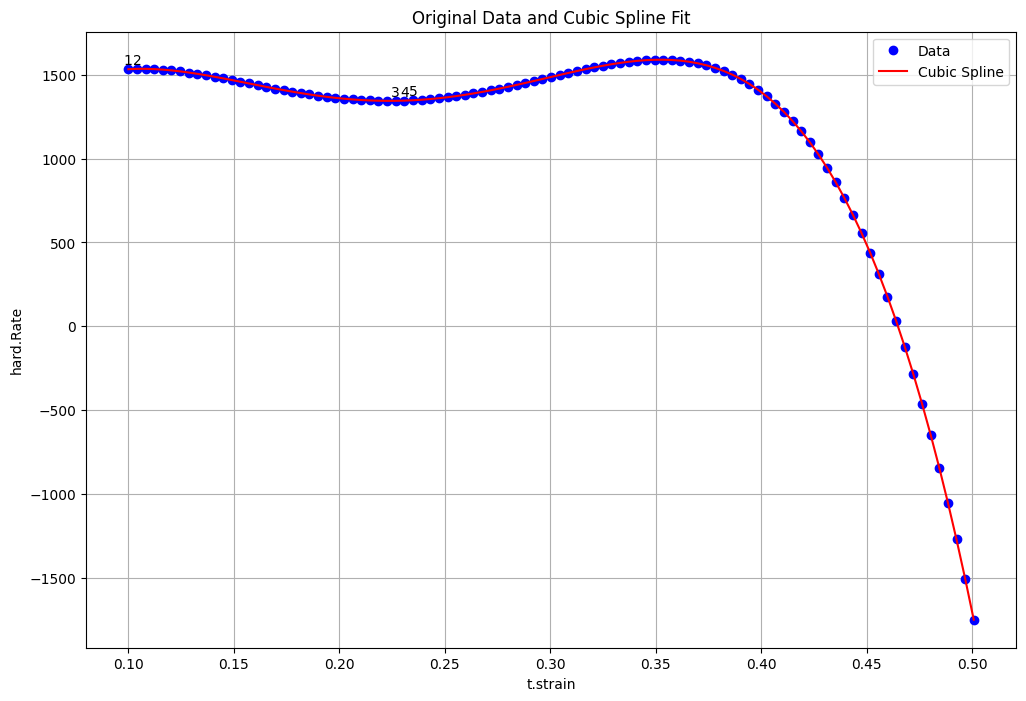


Minimum Slope: 178.64363032741326
Maximum Slope: 769.4620257147468
Finding best parameters...
Plotting comparison...


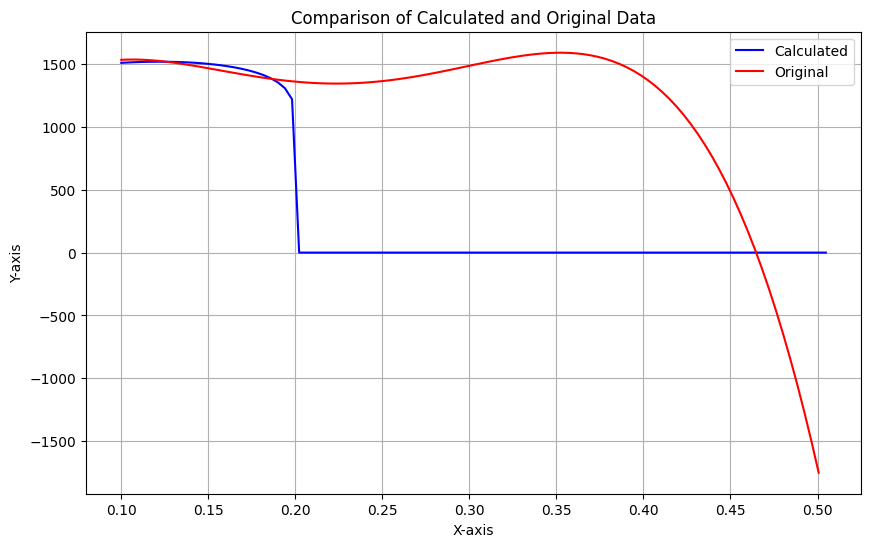

Extracting text and finding lemmas...
Finding max size chemical composition...

['Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'INCONEL800', 'Cr23Fe46Ni31', 'INCONEL600', 'Ni74Cr18Fe8', 'Cr18Fe67Mn2Mo1Ni12', 'Al0.3CoCrFeNi', 'CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.5CoCrCuFeNi', 'NbCrMo0.5Ta0.5TiZr', 'AlCrFeCuCo', 'CoCrFeMnNi', 'Al0.3CoCrFeNi', 'Al0.5CoCrCuFeNi', 'AlCoCrCuFeNi', 'TaNbHfZrTi', 'FeMnNiCoCr', 'Al0.3CoFeCrNi', 'Al0.3CuFeCrNi2', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'CoCrFeNiNb', 'CoCrFeNiNb0', 'Al0.3CoCrFeNi', 'AlCoCrFeNi']

Maximum sized chemical composition: Cr18Fe67Mn2Mo1Ni12
Data has been updated in data.json
JSON DATA SAVED

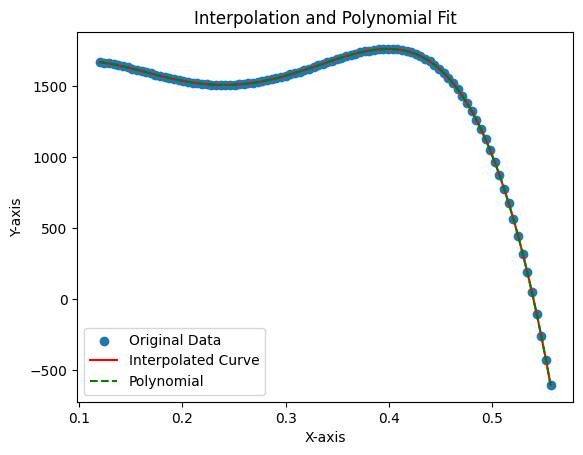

Original Y Values for the Roots:
For x = -2084989523278.209717, y = -1695378799421260673827027012329130743194100947704872960.000000
For x = 0.398870, y = 1764.377394
For x = 0.240706, y = 1510.455083
For x = 0.105178, y = 1678.639501

Minimum b0: 1678.6395007649808
Maximum b0: 1764.3773942601533
From_b0: 1500
To_b0: 1800
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.120   |   1671.609   |   -895.357
2       |   0.124   |   1667.099   |   -1105.240
3       |   0.129   |   1661.704   |   -1288.440
4       |   0.133   |   1655.545   |   -1445.579
5       |   0.138   |   1648.734   |   -1577.733
6       |   0.142   |   1641.384   |   -1685.857
7       |   0.147   |   1633.600   |   -1770.937
8       |   0.151   |   1625.483   |   -1833.953
9       |   0.156   |   1617.130   |   -1875.885
10       |   0.160   |   1608.634   |   -1897.714
11       |   0.165   |   1600.083   |   -1900.419
12

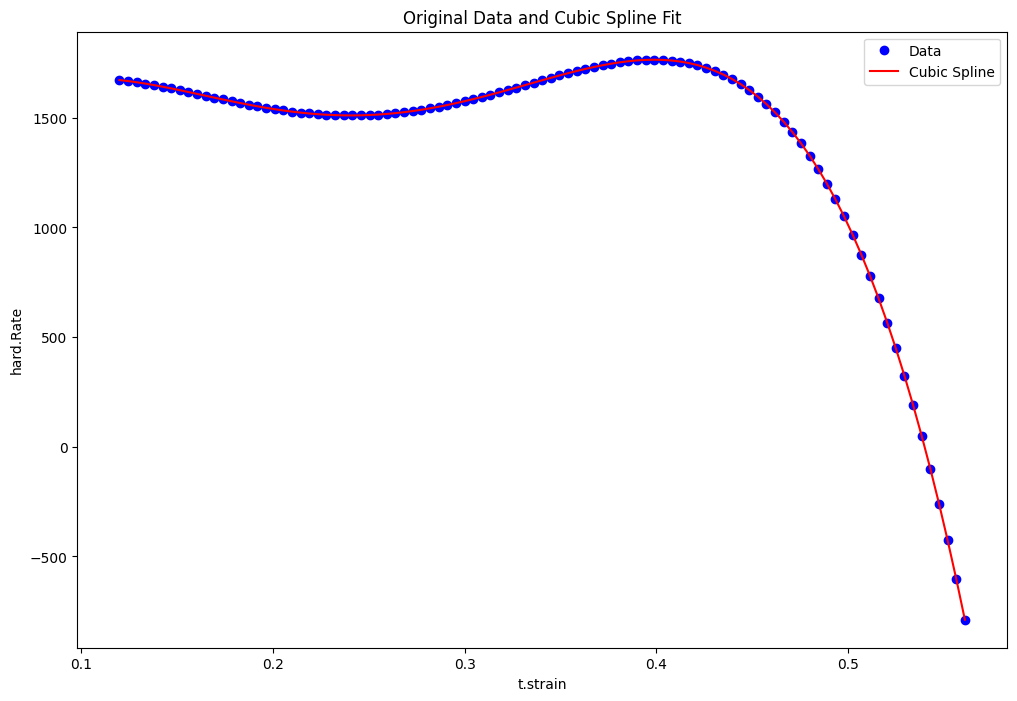

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.241   |   1510.466   |   173.875   |   29.494
2       |   0.246   |   1510.990   |   174.372   |   203.369
3       |   0.250   |   1512.297   |   173.888   |   377.741
4       |   0.255   |   1514.388   |   172.424   |   551.629

Average Slope of Printed Slopes: 290.55822298890496


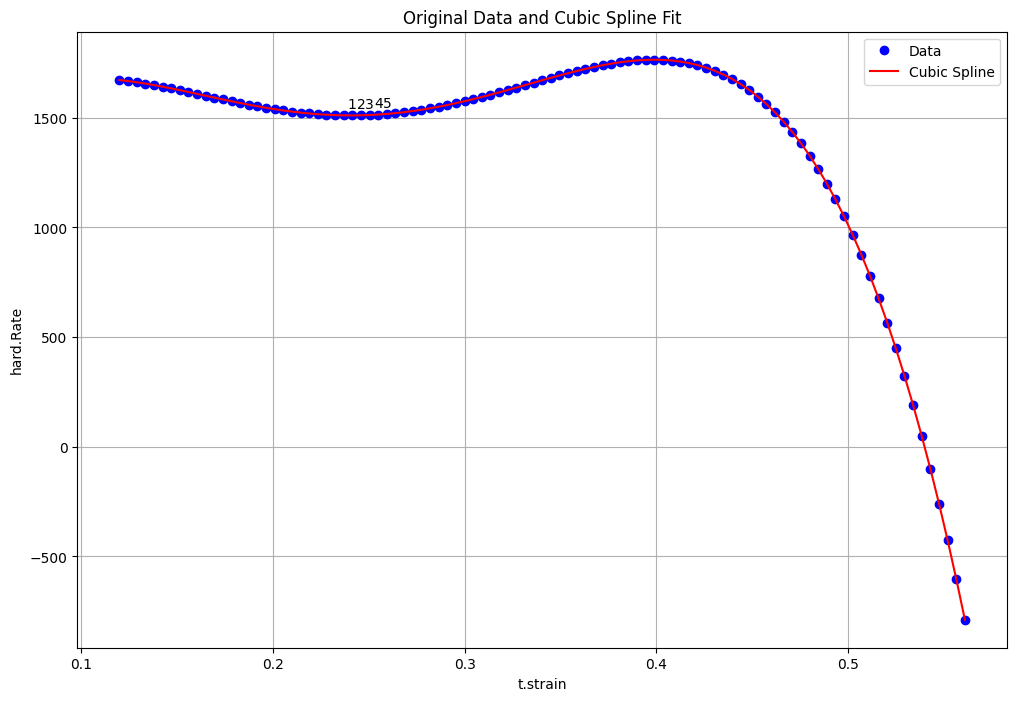


Minimum Slope: 29.494159937670613
Maximum Slope: 724.0533018219322
Finding best parameters...
Plotting comparison...


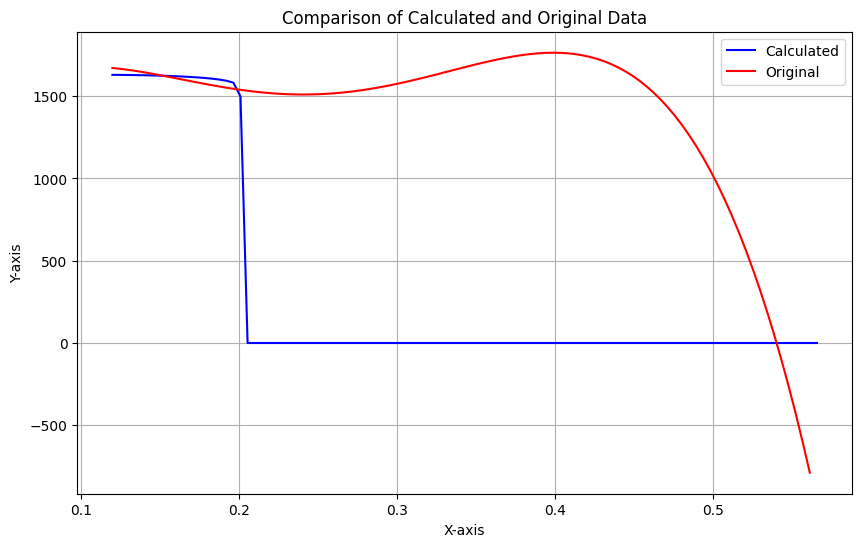

Extracting text and finding lemmas...
Finding max size chemical composition...

['DMAX2500', 'E2016202121', 'BJ2017009']

Maximum sized chemical composition: E2016202121
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-46
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-46/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-46/RS_CG_STEEL.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-2.93838963e-07  4.73911279e+05 -4.53299707e+05  1.43292035e+05
 -1.62282620e+04  2.00467423e+03]

Polynomial Equation: -0.000000 x^5 + 473911.278525 x^4 + -453299.707425 x^3 + 143292.035283 x^2 + -16228.261956 x^1 + 2004.674229

Derivative Equation: -0.000001 x^4 + 1895645.114099 x^3 + -1359899.122275 x^2 + 286584.070567 x^1 + -16228.261956

Roots (Zeros) of the Derivative Equation: [1.29026123e+12 3.75440449e-01 2.51149424e-01 9.

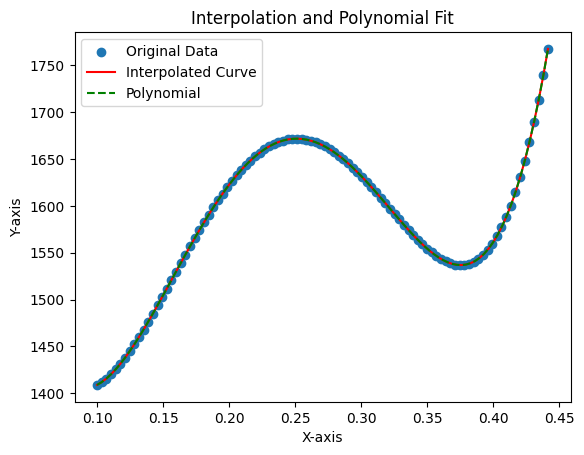

Original Y Values for the Roots:
For x = 1290261232141.991211, y = 262686427317983435908037128587287104912549399261872128.000000
For x = 0.375440, y = 1536.815870
For x = 0.251149, y = 1671.793941
For x = 0.090791, y = 1405.406777

Minimum b0: 1405.406777453298
Maximum b0: 1536.8158695494176
From_b0: 1300
To_b0: 1600
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.100   |   1408.860   |   726.888
2       |   0.104   |   1411.851   |   968.761
3       |   0.107   |   1415.661   |   1191.646
4       |   0.111   |   1420.223   |   1395.861
5       |   0.114   |   1425.472   |   1581.949
6       |   0.118   |   1431.345   |   1750.395
7       |   0.121   |   1437.781   |   1901.698
8       |   0.125   |   1444.720   |   2036.356
9       |   0.128   |   1452.105   |   2154.865
10       |   0.132   |   1459.880   |   2257.722
11       |   0.135   |   1467.990   |   2345.423
12       |   0.139

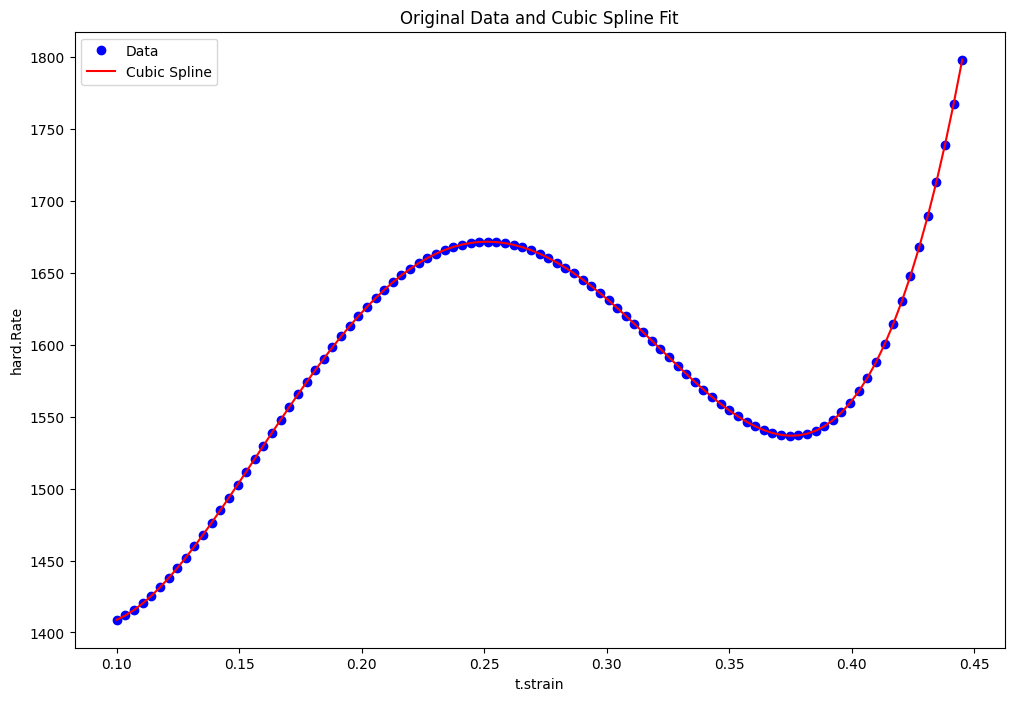

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.100   |   1408.860   |   241.872   |   726.888
2       |   0.104   |   1411.851   |   222.886   |   968.761
3       |   0.107   |   1415.661   |   204.214   |   1191.646
4       |   0.111   |   1420.223   |   186.088   |   1395.861

Average Slope of Printed Slopes: 1070.788907368929


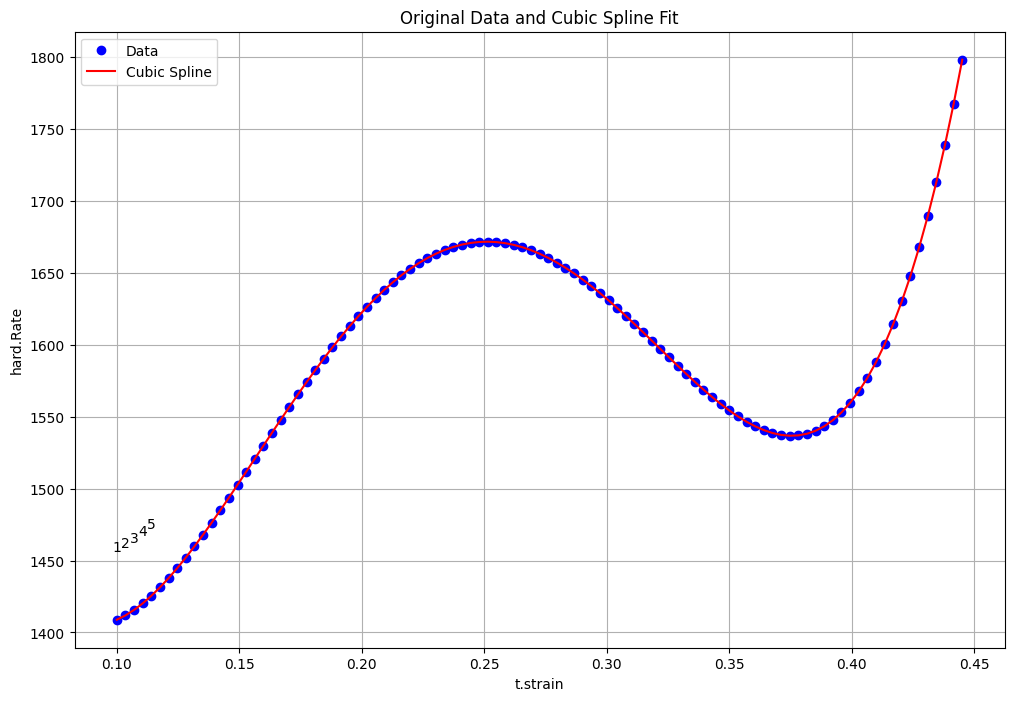


Minimum Slope: 726.8882010060563
Maximum Slope: 1581.948669747645
Finding best parameters...
Plotting comparison...


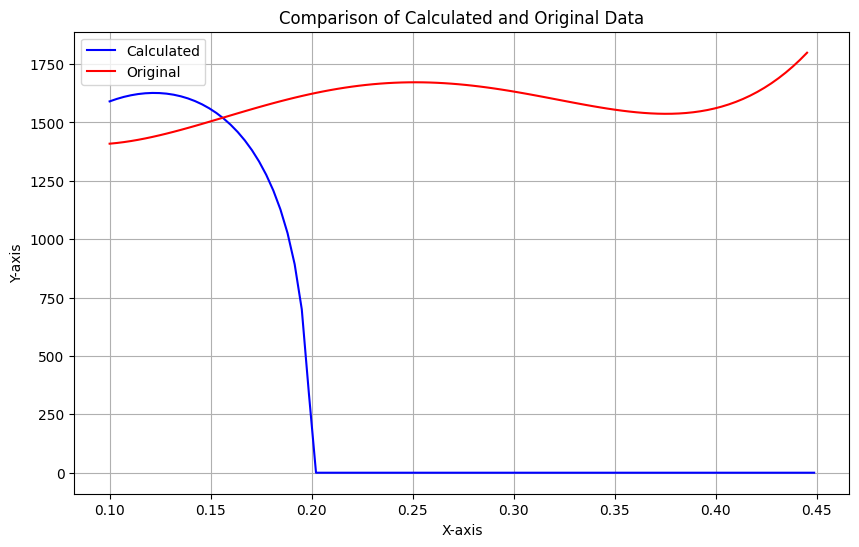

Extracting text and finding lemmas...
Finding max size chemical composition...

['CORROSION', 'FeCoNiCrMn']

Maximum sized chemical composition: FeCoNiCrMn
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-48
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-48/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-48/RS_strain_0.0.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-6.20809006e-08  4.57514978e+05 -4.77649628e+05  1.68588773e+05
 -2.38458247e+04  3.04906211e+03]

Polynomial Equation: -0.000000 x^5 + 457514.977899 x^4 + -477649.627913 x^3 + 168588.772519 x^2 + -23845.824676 x^1 + 3049.062111

Derivative Equation: -0.000000 x^4 + 1830059.911598 x^3 + -1432948.883740 x^2 + 337177.545038 x^1 + -23845.824676

Roots (Zeros) of the Derivative Equation: [5.89572604e+12 4.13986247e-01 2.35198696e-01 1.33821599e-01

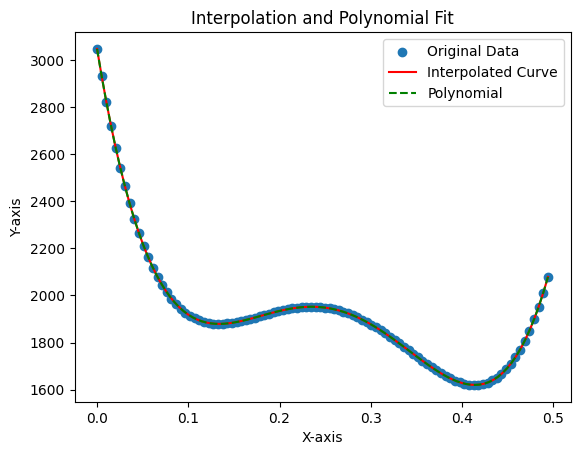

Original Y Values for the Roots:
For x = 5895726040838.047852, y = 110556553403127502920392383774097518195368806238254006272.000000
For x = 0.413986, y = 1619.525775
For x = 0.235199, y = 1952.061229
For x = 0.133822, y = 1879.137132

Minimum b0: 1879.137132114891
Maximum b0: 1952.0612291980071
From_b0: 1700
To_b0: 2000
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   3049.062   |   -23845.564
2       |   0.005   |   2931.866   |   -22164.714
3       |   0.010   |   2823.051   |   -20556.408
4       |   0.015   |   2722.247   |   -19019.724
5       |   0.020   |   2629.095   |   -17553.066
6       |   0.025   |   2543.241   |   -16155.021
7       |   0.031   |   2464.340   |   -14824.125
8       |   0.036   |   2392.052   |   -13558.928
9       |   0.041   |   2326.047   |   -12357.977
10       |   0.046   |   2266.001   |   -11219.818
11       |   0.051   |   2211.598   |   -1

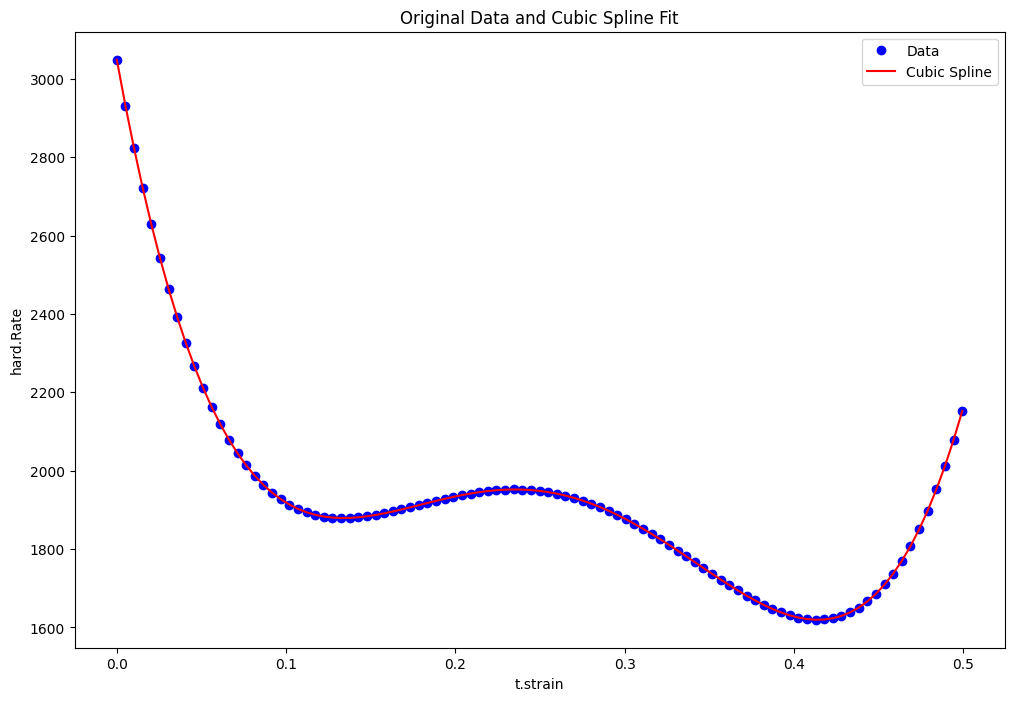

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.138   |   1879.493   |   221.139   |   185.734
2       |   0.143   |   1881.017   |   187.403   |   406.873
3       |   0.148   |   1883.582   |   155.120   |   594.276
4       |   0.153   |   1887.019   |   124.290   |   749.396

Average Slope of Printed Slopes: 484.0696743633509


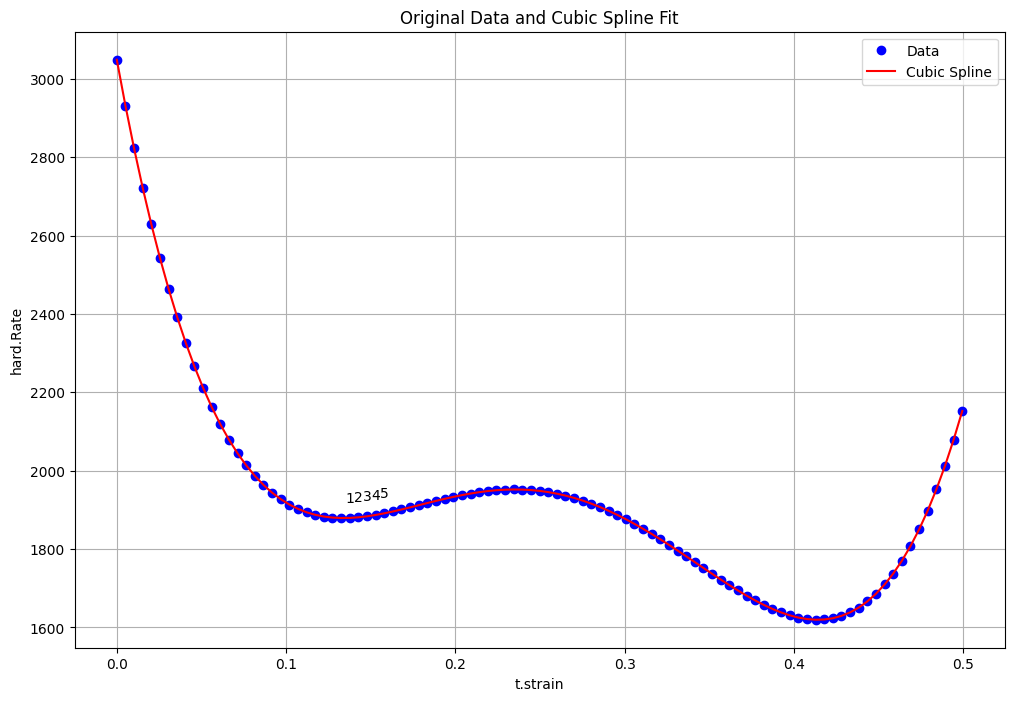


Minimum Slope: 185.73424977527245
Maximum Slope: 873.6858202562697
Finding best parameters...
Plotting comparison...


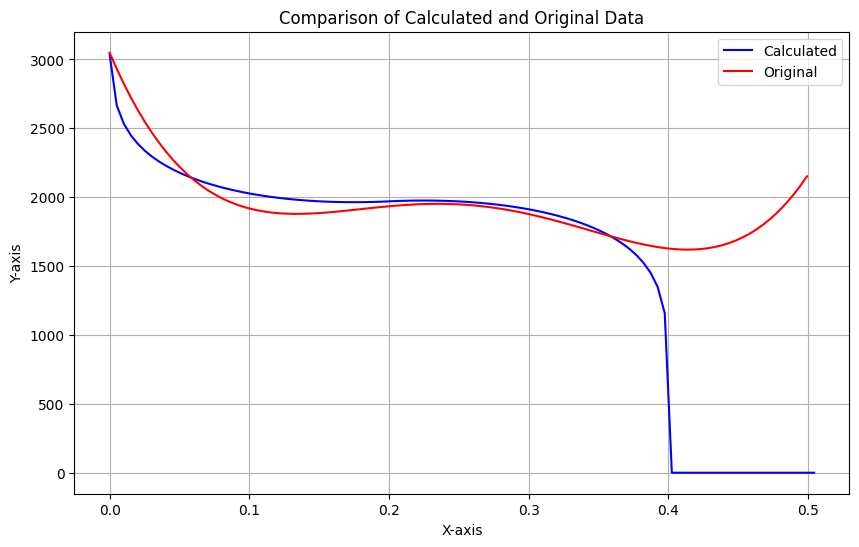

Extracting text and finding lemmas...
Finding max size chemical composition...

['CORROSION', 'FeCoNiCrMn']

Maximum sized chemical composition: FeCoNiCrMn
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-24
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-24/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-24/Research Paper.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-2.77085396e-05 -1.02508470e+07  6.43840370e+06 -1.35679576e+06
  9.85348417e+04  1.45786346e+03]

Polynomial Equation: -0.000028 x^5 + -10250847.027215 x^4 + 6438403.701398 x^3 + -1356795.758817 x^2 + 98534.841732 x^1 + 1457.863459

Derivative Equation: -0.000139 x^4 + -41003388.108862 x^3 + 19315211.104194 x^2 + -2713591.517634 x^1 + 98534.841732

Roots (Zeros) of the Derivative Equation: [-2.95962102e+11  2.18720255e-01  1.96401847e-01  5.

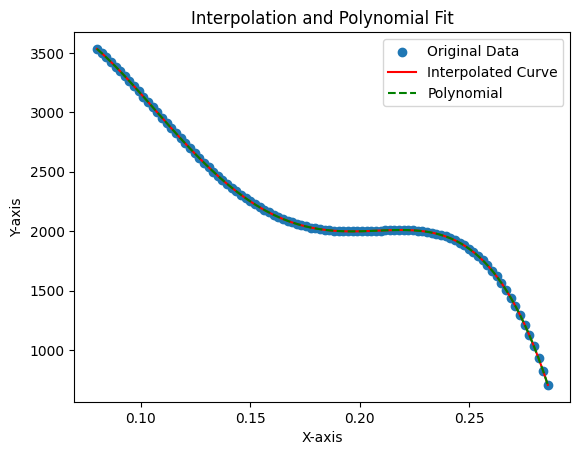

Original Y Values for the Roots:
For x = -295962101718.488892, y = -15730196910844081221933991176627283161553664397541376.000000
For x = 0.218720, y = 2009.639626
For x = 0.196402, y = 1998.120679
For x = 0.055942, y = 3750.779480

Minimum b0: 1998.1206792775924
Maximum b0: 2009.6396256902208
From_b0: 1800
To_b0: 2100
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.080   |   3533.746   |   -15929.285
2       |   0.082   |   3499.064   |   -16757.105
3       |   0.084   |   3462.713   |   -17502.690
4       |   0.086   |   3424.867   |   -18167.529
5       |   0.088   |   3385.694   |   -18754.200
6       |   0.091   |   3345.358   |   -19264.990
7       |   0.093   |   3304.016   |   -19702.263
8       |   0.095   |   3261.823   |   -20068.363
9       |   0.097   |   3218.926   |   -20365.640
10       |   0.099   |   3175.470   |   -20596.440
11       |   0.101   |   3131.593   |   -207

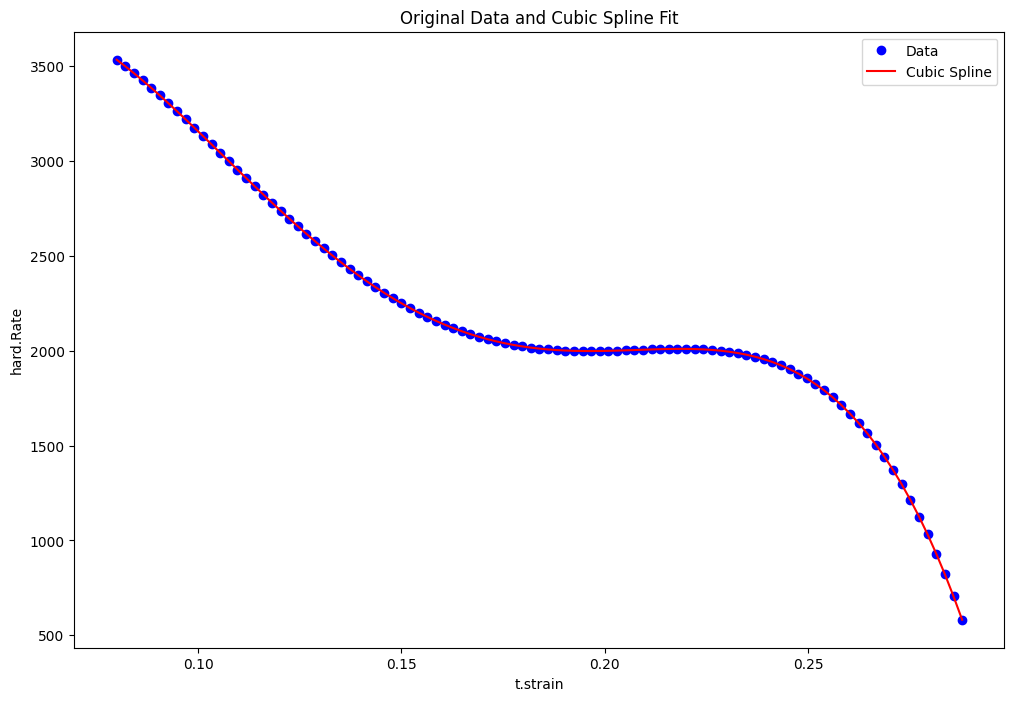

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.197   |   1998.125   |   244.864   |   33.699
2       |   0.199   |   1998.464   |   198.629   |   278.563
3       |   0.201   |   1999.274   |   150.046   |   477.192
4       |   0.203   |   2000.454   |   99.115   |   627.239

Average Slope of Printed Slopes: 354.1732879756063


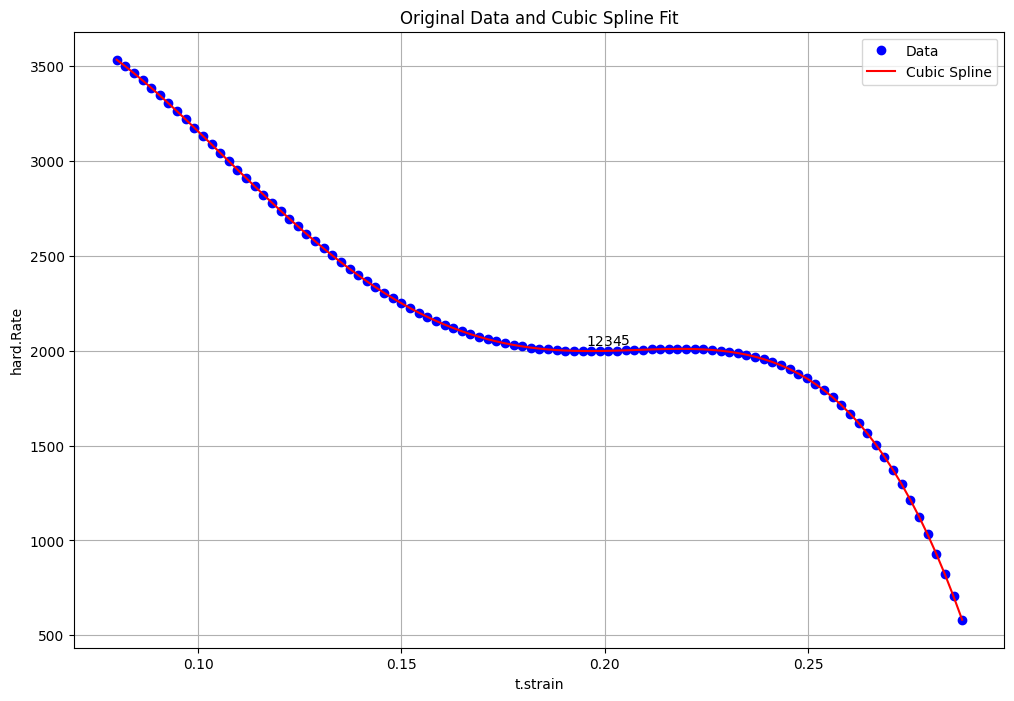


Minimum Slope: 33.69917890169919
Maximum Slope: 726.3538524366429
Finding best parameters...
Plotting comparison...


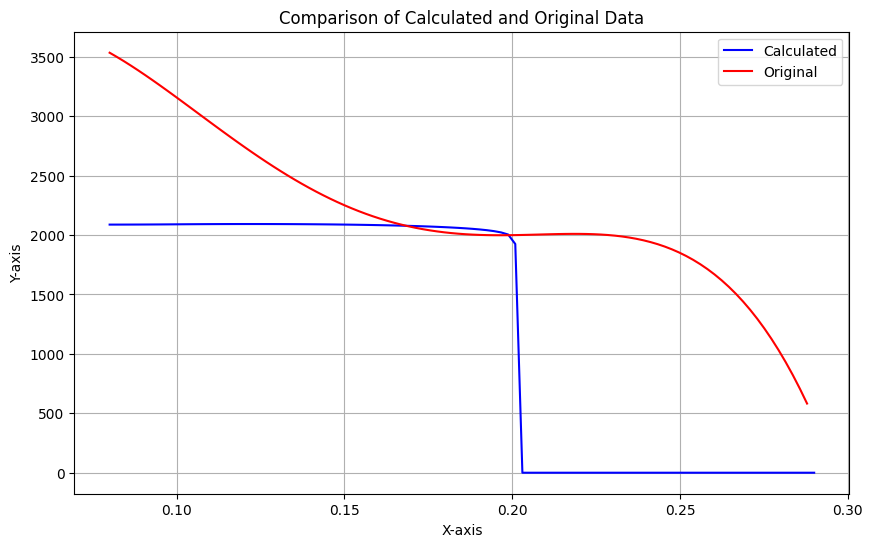

Extracting text and finding lemmas...
Finding max size chemical composition...

['ABSTRACT', 'Fe40Mn20Co20Cr15Si5HEA', 'Fe40Mn20Co20Cr15Si5', 'W911NF1920011', 'ADDMA.2020', 'BF02646526', 'BF02693159', 'AlSi10Mg', 'MTCOMM.2019', 'BF02642422']

Maximum sized chemical composition: Fe40Mn20Co20Cr15Si5HEA
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-29
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-29/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-29/Research Paper S350.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 7.43531039e-06  4.67627287e+06 -2.18182963e+06  3.17143702e+05
 -2.08310388e+04  3.51843758e+03]

Polynomial Equation: 0.000007 x^5 + 4676272.873307 x^4 + -2181829.630768 x^3 + 317143.701596 x^2 + -20831.038830 x^1 + 3518.437578

Derivative Equation: 0.000037 x^4 + 18705091.493227 x^3 + -65454

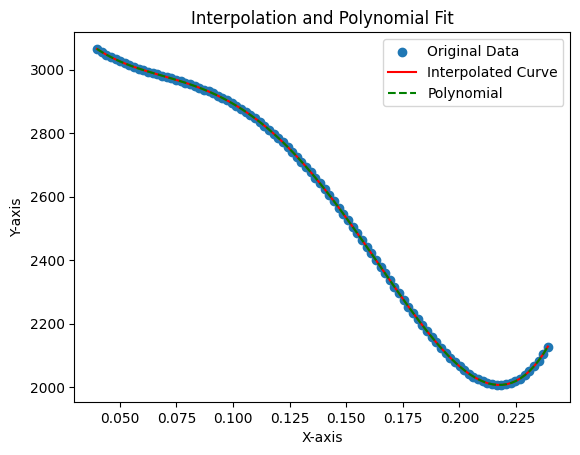

Original Y Values for the Roots:
For x = -503142182493.901672+0.000000j, y = 59936690402409990922634889618432845125246924212928512.000000
For x = 0.217630+0.000000j, y = 2006.422006

Minimum b0: 2006.4220058916148
Maximum b0: 5.993669040240999e+52
From_b0: 1900
To_b0: 2200
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.040   |   3065.196   |   -4744.991
2       |   0.042   |   3055.867   |   -4350.923
3       |   0.044   |   3047.311   |   -3991.863
4       |   0.046   |   3039.457   |   -3667.197
5       |   0.048   |   3032.235   |   -3375.859
6       |   0.050   |   3025.578   |   -3116.904
7       |   0.052   |   3019.419   |   -2889.355
8       |   0.054   |   3013.696   |   -2692.243
9       |   0.056   |   3008.347   |   -2524.597
10       |   0.058   |   3003.313   |   -2385.448
11       |   0.060   |   2998.537   |   -2273.824
12       |   0.063   |   2993.961   |   -2188.756


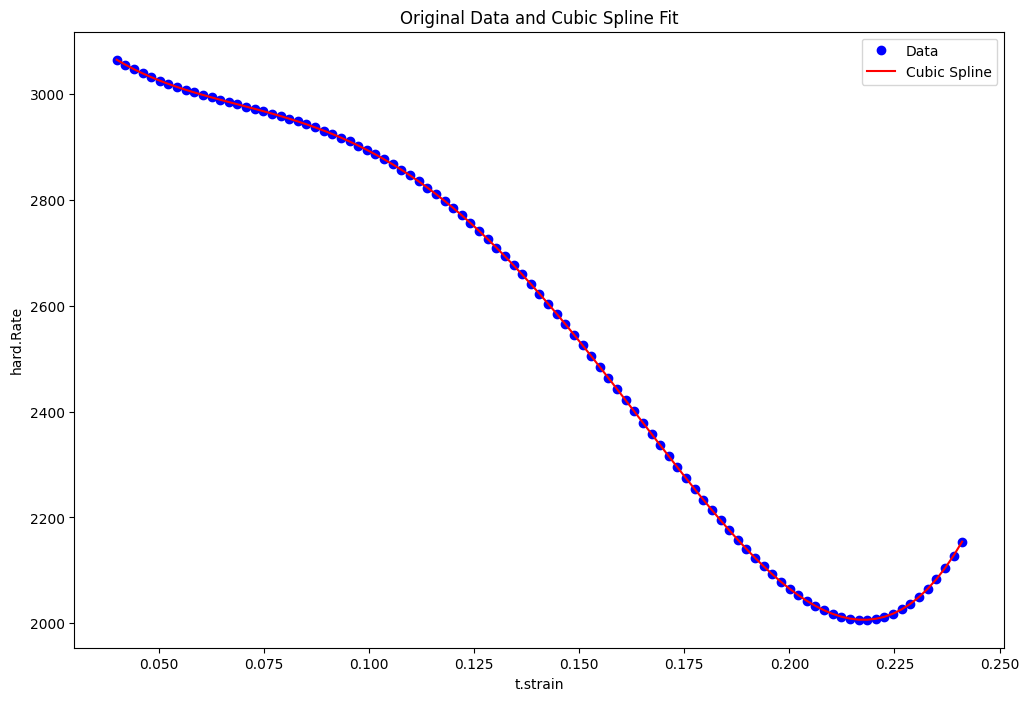

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.219   |   2006.597   |   954.291   |   396.325
2       |   0.221   |   2008.381   |   1003.424   |   1350.617
3       |   0.223   |   2012.174   |   1053.527   |   2354.041
4       |   0.225   |   2018.078   |   1104.600   |   3407.568

Average Slope of Printed Slopes: 1877.1376021590117


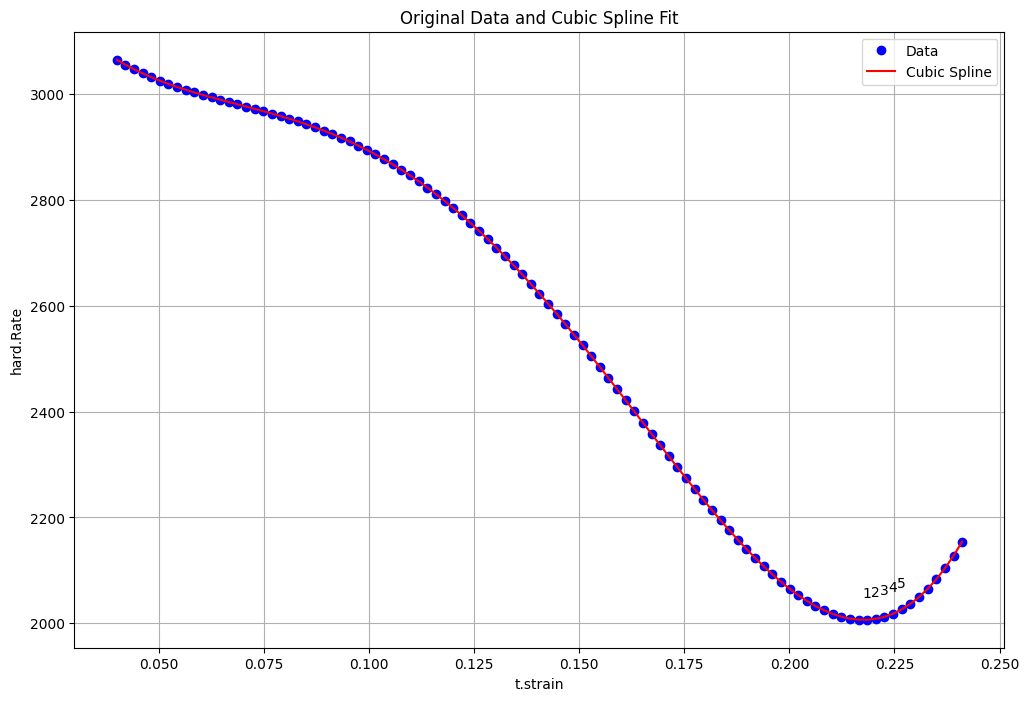


Minimum Slope: 396.32547909716203
Maximum Slope: 4512.16794225287
Finding best parameters...
Plotting comparison...


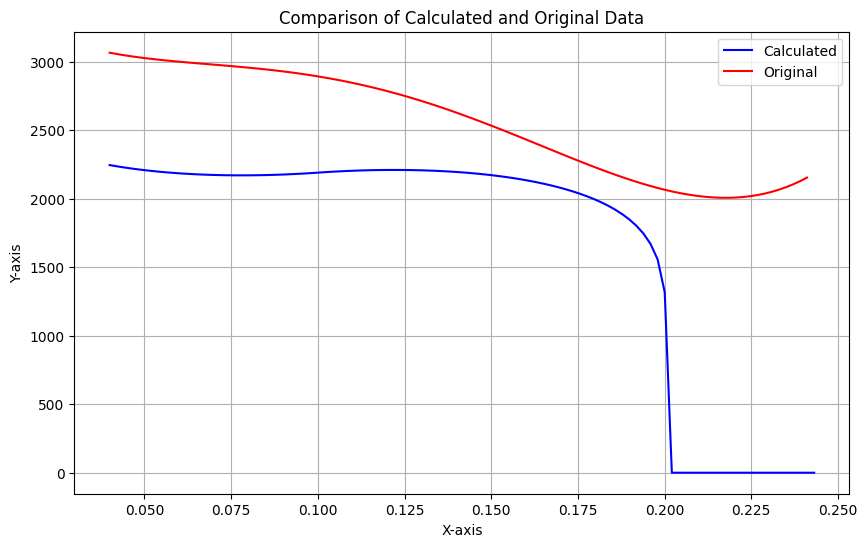

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe40Mn20Co20Cr15Si5HEA', 'CoCrMnFeNi', 'Fe40Mn20Co20Cr15Si5', 'Fe40Mn20Co20Cr15Si5', 'Fe40Mn20Co20Cr15Si5', 'S350S150D']

Maximum sized chemical composition: Fe40Mn20Co20Cr15Si5HEA
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-30
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-30/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-30/Research Paper s150.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [-3.40698527e-05 -3.87246852e+07  1.44747003e+07 -1.83410585e+06
  8.67579929e+04  1.61466316e+03]

Polynomial Equation: -0.000034 x^5 + -38724685.207775 x^4 + 14474700.259437 x^3 + -1834105.853004 x^2 + 86757.992923 x^1 + 1614.663155

Derivative Equation: -0.000170 x^4 + -154898740.831100 x^3 + 43424100.778312 x^2 + -3668211.706008 

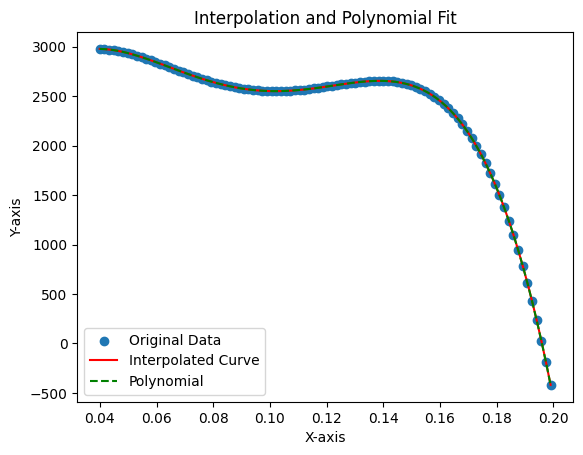

Original Y Values for the Roots:
For x = -909300911972.914673, y = -5294785835472620476756059478994490290826719593987309568.000000
For x = 0.138780, y = 2654.843473
For x = 0.101986, y = 2550.924351
For x = 0.039573, y = 2977.746110

Minimum b0: 2550.9243513990164
Maximum b0: 2654.843472783309
From_b0: 2400
To_b0: 2700
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.040   |   2977.678   |   -359.529
2       |   0.042   |   2975.861   |   -1834.551
3       |   0.043   |   2971.731   |   -3181.114
4       |   0.045   |   2965.495   |   -4401.820
5       |   0.047   |   2957.358   |   -5501.170
6       |   0.048   |   2947.514   |   -6483.157
7       |   0.050   |   2936.154   |   -7351.909
8       |   0.051   |   2923.458   |   -8111.521
9       |   0.053   |   2909.603   |   -8766.093
10       |   0.055   |   2894.759   |   -9319.726
11       |   0.056   |   2879.086   |   -9776.521
12  

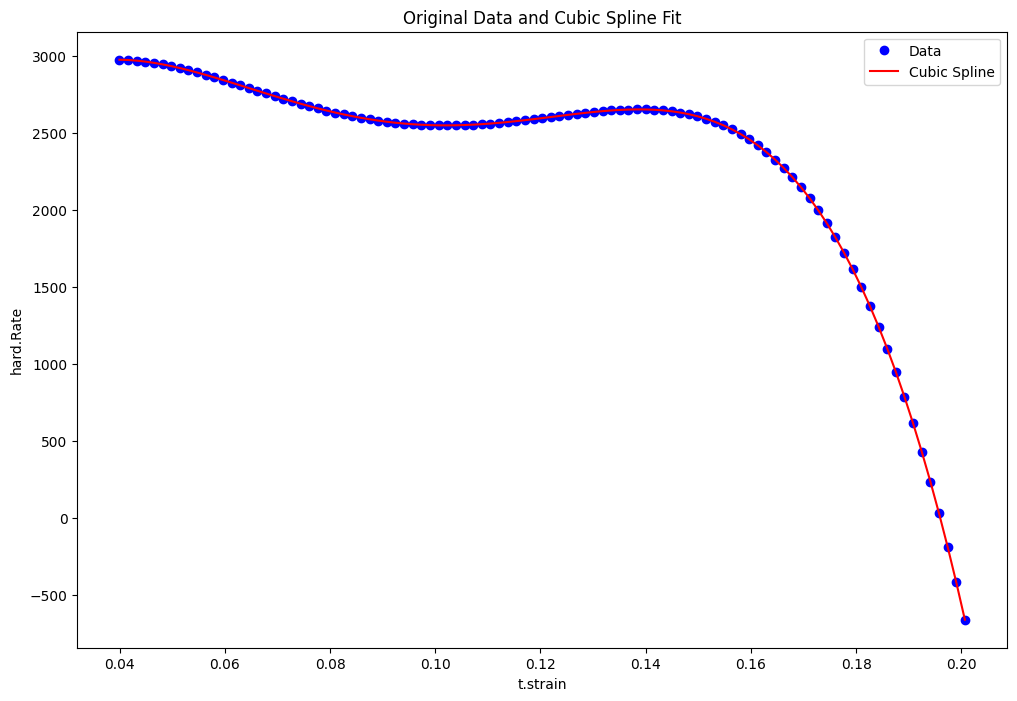

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.102   |   2550.939   |   567.876   |   102.321
2       |   0.104   |   2551.576   |   541.704   |   670.196
3       |   0.106   |   2553.123   |   511.432   |   1211.900
4       |   0.107   |   2555.535   |   477.059   |   1723.332

Average Slope of Printed Slopes: 926.9373311059181


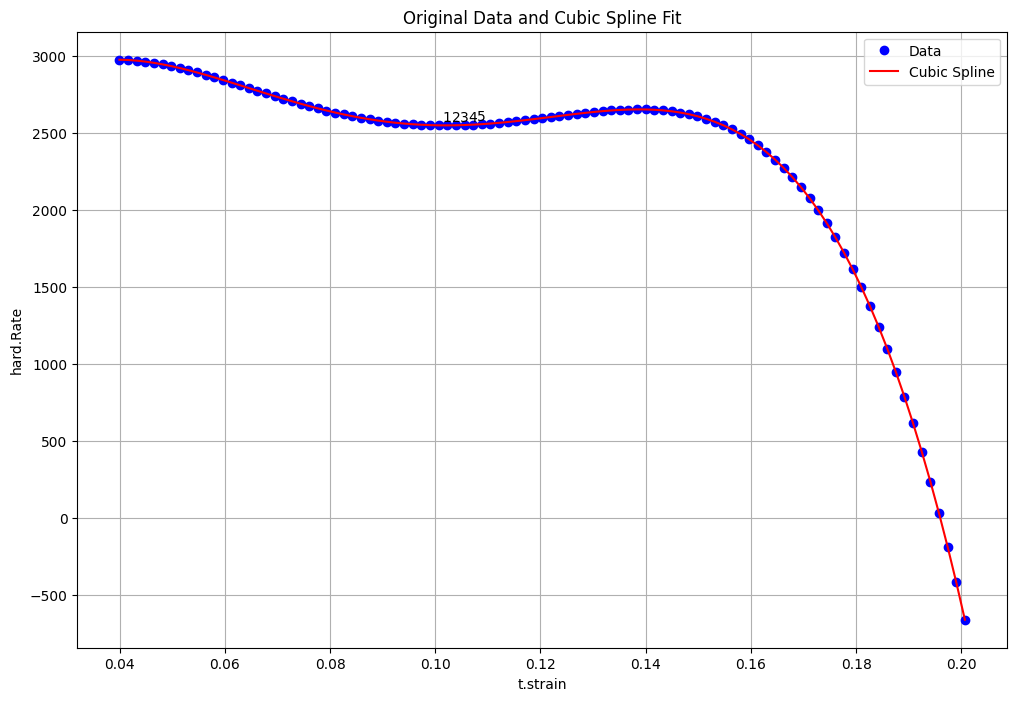


Minimum Slope: 102.32080663817963
Maximum Slope: 2200.391134986956
Finding best parameters...
Plotting comparison...


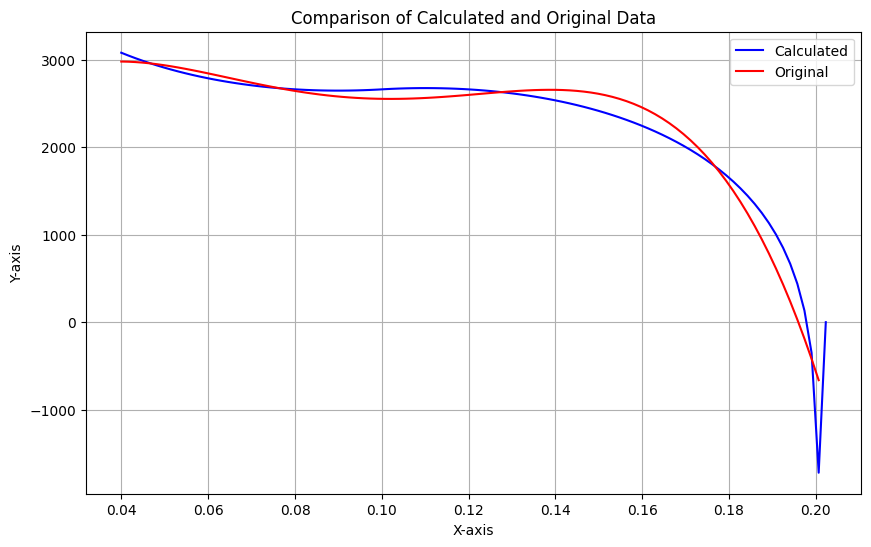

Extracting text and finding lemmas...
Finding max size chemical composition...

['Fe40Mn20Co20Cr15Si5HEA', 'CoCrMnFeNi', 'Fe40Mn20Co20Cr15Si5', 'Fe40Mn20Co20Cr15Si5', 'Fe40Mn20Co20Cr15Si5', 'S350S150D']

Maximum sized chemical composition: Fe40Mn20Co20Cr15Si5HEA
Data has been updated in data.json
JSON DATA SAVED.


PROCESSING FOLDER: paper-38
Found Excel file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-38/fitted_hard_rate_cal.xlsx
Found PDF file: /content/drive/MyDrive/Colab Notebooks/Material_Science/allData/paper-38/RS_CR-620.pdf
No text file found. Ignoring link.
Calculating B0 range...
Cubic Polynomial Coefficients: [ 2.47603059e-06 -6.11068539e+06  3.92554570e+06 -8.84101459e+05
  7.56170531e+04  3.13013062e+02]

Polynomial Equation: 0.000002 x^5 + -6110685.391473 x^4 + 3925545.695497 x^3 + -884101.458836 x^2 + 75617.053072 x^1 + 313.013062

Derivative Equation: 0.000012 x^4 + -24442741.565891 x^3 + 11776637.086491 x^2 + -1768202.917672 x^1 + 75617.05307

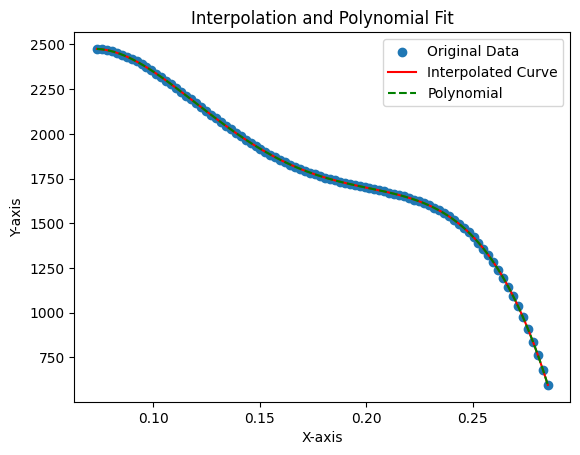

Original Y Values for the Roots:
For x = 1974348918929.635254+0.000000j, y = -18570155714974388549415247404506712306047516041981984768.000000
For x = 0.204643+0.027942j, y = 2475.303776

Minimum b0: -1.8570155714974389e+55
Maximum b0: 2475.3037763954394
From_b0: -18570155714974387528568146641691321915923693746677350500
To_b0: -18570155714974387528568146641691321915923693746677350200
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.074   |   2475.080   |   -442.732
2       |   0.076   |   2472.904   |   -1415.640
3       |   0.078   |   2468.541   |   -2321.726
4       |   0.081   |   2462.145   |   -3162.162
5       |   0.083   |   2453.867   |   -3938.982
6       |   0.085   |   2443.853   |   -4653.985
7       |   0.087   |   2432.245   |   -5309.036
8       |   0.090   |   2419.180   |   -5905.981
9       |   0.092   |   2404.791   |   -6446.671
10       |   0.094   |   2389.207   |  

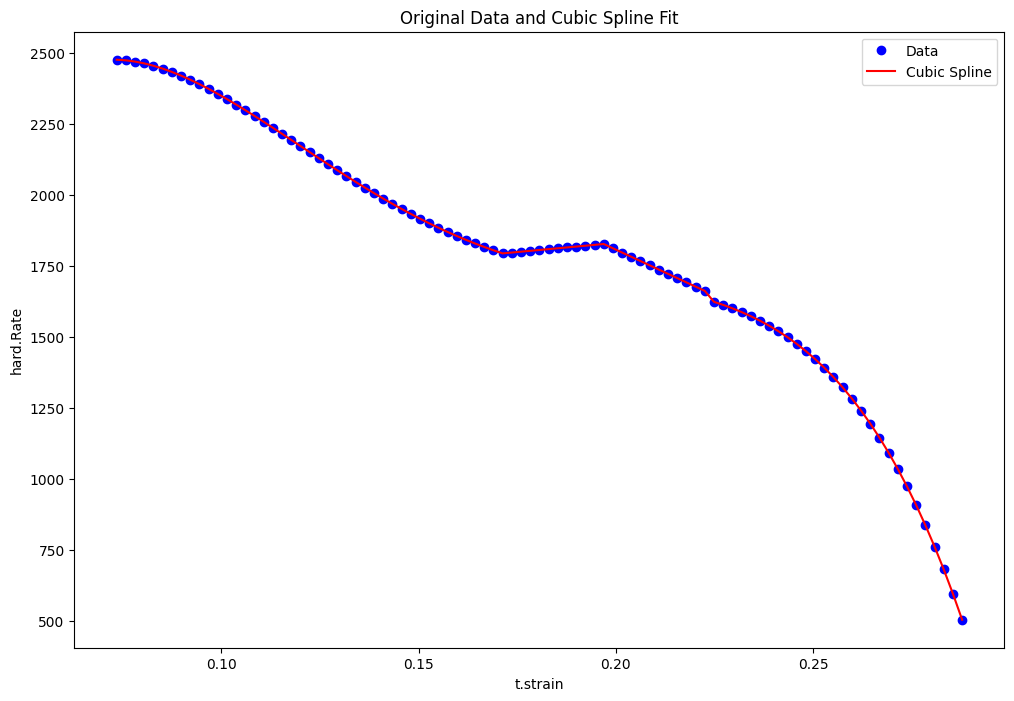

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.174   |   1796.838   |   -1008.177   |   2083.825
2       |   0.176   |   1799.838   |   270.019   |   1075.648
3       |   0.178   |   1802.838   |   -71.900   |   1345.667
4       |   0.181   |   1805.838   |   17.582   |   1273.767

Average Slope of Printed Slopes: 1444.7264153274261


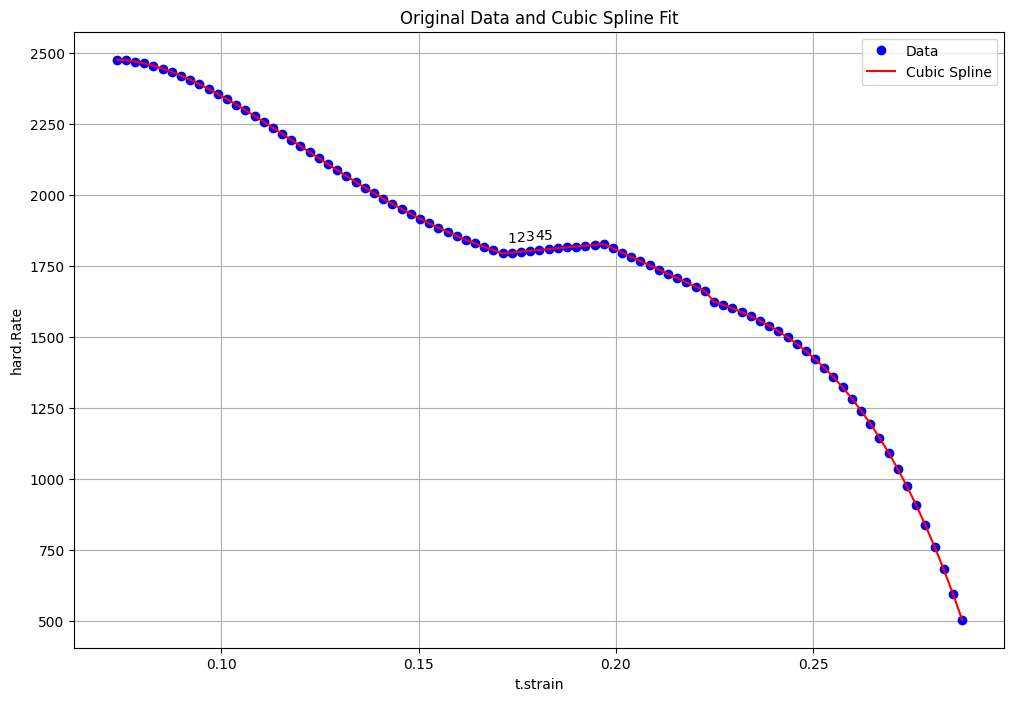


Minimum Slope: 1075.6475639107869
Maximum Slope: 2083.8245838725725
Finding best parameters...
Plotting comparison...


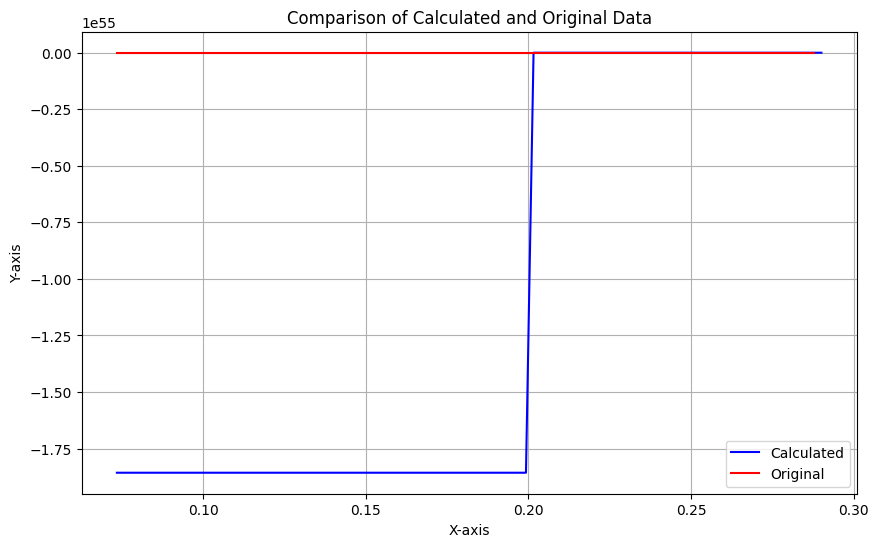

Extracting text and finding lemmas...
Finding max size chemical composition...

['Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'INCONEL800', 'Cr23Fe46Ni31', 'INCONEL600', 'Ni74Cr18Fe8', 'Cr18Fe67Mn2Mo1Ni12', 'Al0.3CoCrFeNi', 'CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.5CoCrCuFeNi', 'NbCrMo0.5Ta0.5TiZr', 'AlCrFeCuCo', 'CoCrFeMnNi', 'Al0.3CoCrFeNi', 'Al0.5CoCrCuFeNi', 'AlCoCrCuFeNi', 'TaNbHfZrTi', 'FeMnNiCoCr', 'Al0.3CoFeCrNi', 'Al0.3CuFeCrNi2', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'Al0.3CoCrFeNi', 'CoCrFeNiNb', 'CoCrFeNiNb0', 'Al0.3CoCrFeNi', 'AlCoCrFeNi']

Maximum sized chemical composition: Cr18Fe67Mn2Mo1Ni12
Data has been updated in data.json
JSON DATA SAVED

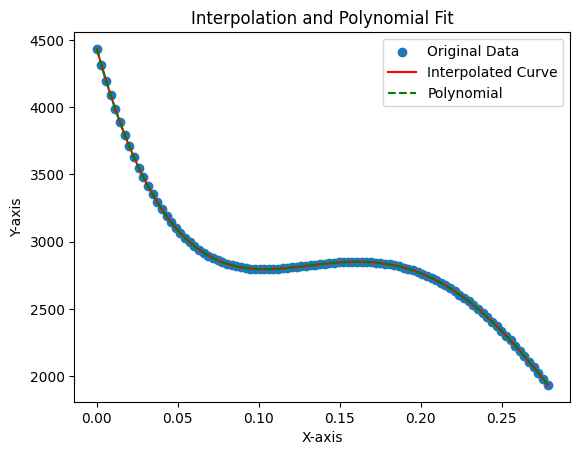

Original Y Values for the Roots:
For x = -907326571838.725830, y = 225363754097217694204076543487509913692908087496671232.000000
For x = 0.392496, y = 472.676399
For x = 0.161153, y = 2850.724915
For x = 0.103546, y = 2795.598133

Minimum b0: 2795.5981332382953
Maximum b0: 2850.724914721989
From_b0: 2600
To_b0: 2900
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.000   |   4433.114   |   -43557.548
2       |   0.003   |   4311.364   |   -41291.935
3       |   0.006   |   4196.015   |   -39097.118
4       |   0.009   |   4086.865   |   -36972.499
5       |   0.011   |   3983.713   |   -34917.042
6       |   0.014   |   3886.363   |   -32929.827
7       |   0.017   |   3794.620   |   -31009.906
8       |   0.020   |   3708.291   |   -29156.335
9       |   0.023   |   3627.189   |   -27368.172
10       |   0.026   |   3551.126   |   -25644.473
11       |   0.029   |   3479.919   |   -23984

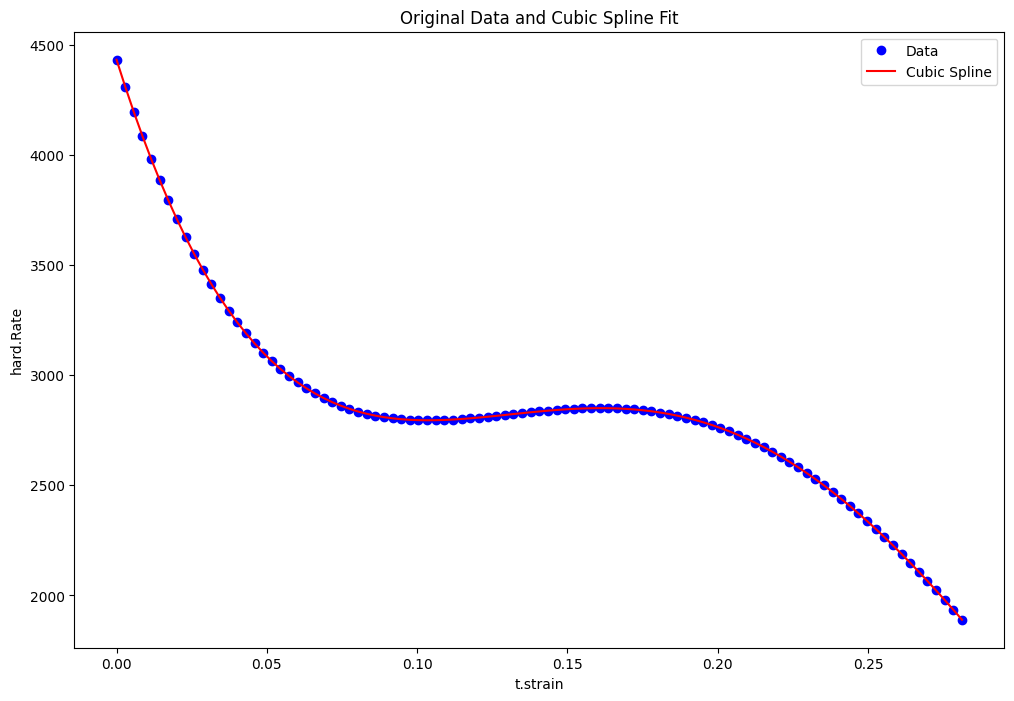

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.106   |   2795.973   |   264.671   |   277.421
2       |   0.109   |   2797.158   |   228.513   |   542.092
3       |   0.112   |   2799.050   |   193.297   |   770.605
4       |   0.115   |   2801.548   |   159.025   |   963.902

Average Slope of Printed Slopes: 638.505234455473


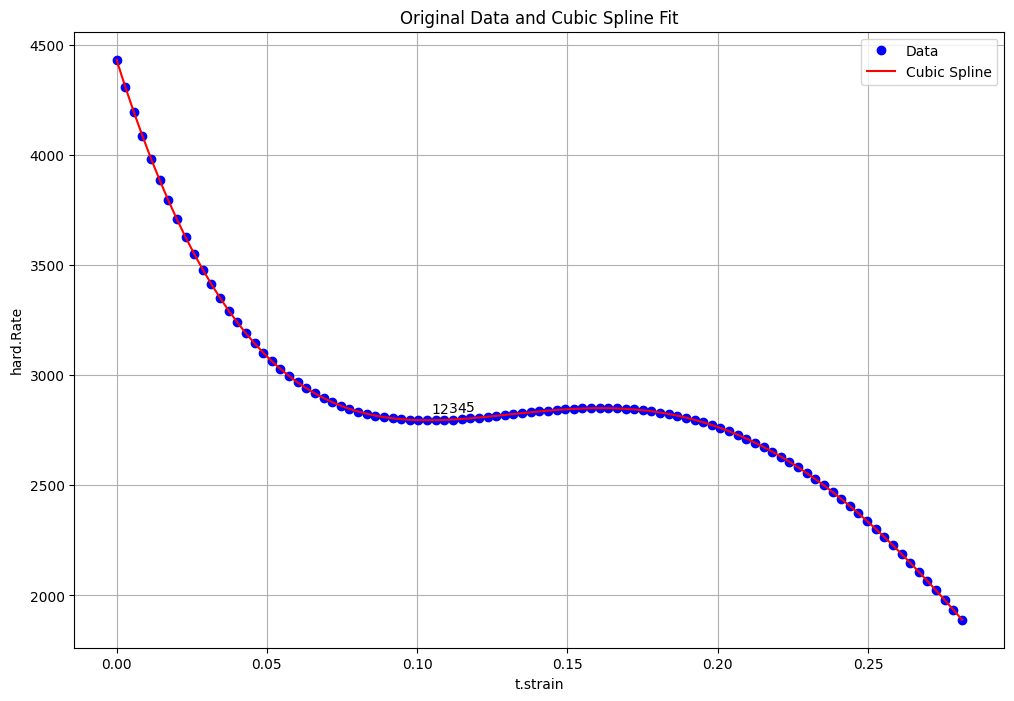


Minimum Slope: 277.42104630105285
Maximum Slope: 1122.9276886261234
Finding best parameters...
Plotting comparison...


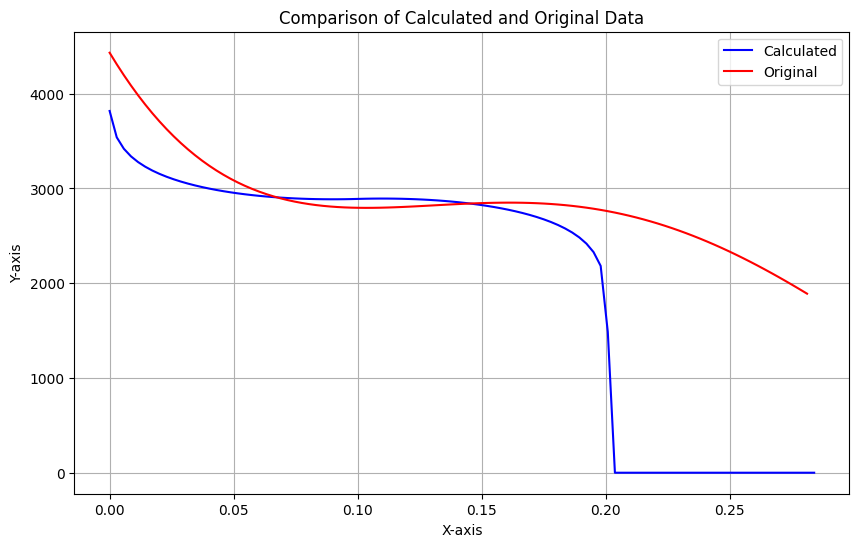

Extracting text and finding lemmas...
Finding max size chemical composition...

['CoCrFeMn', 'CoCrFeMnNi', 'FeNiMnAlCr', 'Al0.1CoCrFeNi', 'AlCrCuNiF', 'CoCrFeMnNi', 'Al0.1CoCrFeNi', 'CrMnFeCoNiAl0.75HEA', 'CrMnFeCoNi', 'AlCrCuNiFeCo', 'CrMnFeCoNiAl0.75', 'CrMnFeCoNi', 'CrMnFeCoNiAl0.75HEA', 'CrMnFeCoN', 'CoCrFeMnNi', 'CoCrFeNi', 'CoCrFeNi', 'Al0.7CoCrFeMn', 'Al0.7NiCoFeCr', 'Al0.7CoCrFeMn', 'Ti2ZrMo0.5Nb0.5HEA', 'NiCoFeCrAl0.7', 'Fe53Mn27C010Cr10HEA', 'FECoNiMnV', 'CoCrFeMnNi', 'CoCrFeNiMn', 'Al0.3CoCrFeNi', 'Al0.3CoCrFe', 'Co45Cr25Fe15Ni15HEA', 'CoCrFeMnNi', 'Fe40Mn40Co10Cr10HEA', 'CoCrFeMnNi', 'AlCrCuFeNi', 'CoCrCu1.2FeNi', 'AlCrCuNi', 'CoCuFeMn', 'AlCoCrFeNi2', 'AlCoCrFeNi', 'AlCoCrFe', 'AlCrCuFeNi', 'AlCoCrFeNi2', 'CoCrFeMn', 'AlCoCrFeNi', 'CoCrFeMn', 'CoCrFeMnNi', 'AlFeCuZn', 'CoCrFeMnNi', 'AlCoCrFe', 'Al0.5CoCrFeMn', 'Al0.5CoCrFeMn', 'FeCoNiCrMn', 'Sn0.5CoCrFeMnNi', 'Al0.5CoCrFeMnNi', 'SnAlZnCuMg', 'Al0.3CoCrFeNi', 'CoCrFeMnNi', 'CoCrFeMnNiC0.007La0.0004', 'CoCrFeMnNiC0.5', 'Al0.

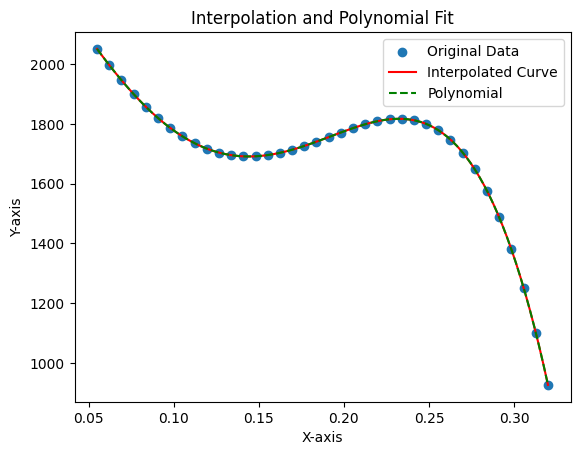

Original Y Values for the Roots:
For x = 3531253054167.686523, y = -35625597884228535420762698399835040657268724818220417024.000000
For x = 0.232357, y = 1817.059269
For x = 0.144137, y = 1690.953222
For x = -0.052250, y = 2769.266716

Minimum b0: 1690.9532223017286
Maximum b0: 1817.0592685438048
From_b0: 1500
To_b0: 1800
Calculating min and max slope values for D1...
Point   |   x       |   y       |   Slope
---------------------------------------------
1       |   0.055   |   2051.035   |   -7771.142
2       |   0.062   |   1996.991   |   -7314.043
3       |   0.069   |   1946.440   |   -6795.126
4       |   0.076   |   1899.811   |   -6220.791
5       |   0.084   |   1857.459   |   -5602.121
6       |   0.091   |   1819.667   |   -4948.943
7       |   0.098   |   1786.644   |   -4271.423
8       |   0.105   |   1758.531   |   -3579.635
9       |   0.112   |   1735.391   |   -2883.677
10       |   0.119   |   1717.220   |   -2193.641
11       |   0.127   |   1703.938   |   -1519.622


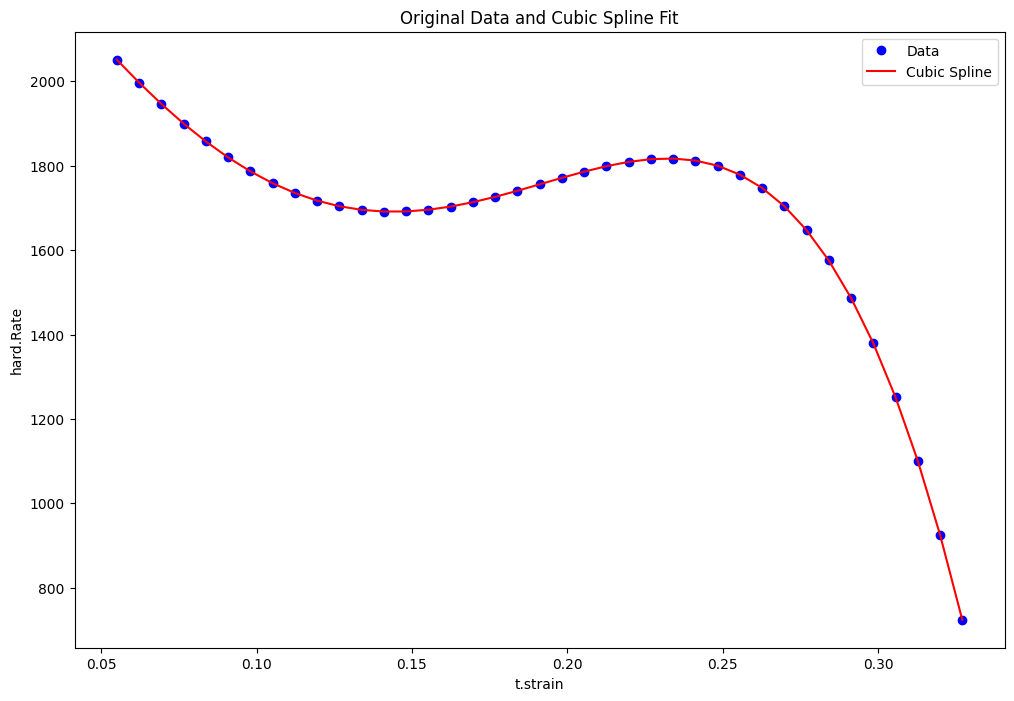

Data Point | x Value | y Value | Difference | Slope:
----------------------------------------------------
1       |   0.148   |   1691.561   |   509.020   |   305.403
2       |   0.155   |   1695.607   |   442.536   |   814.423
3       |   0.162   |   1703.066   |   365.959   |   1256.959
4       |   0.170   |   1713.425   |   279.289   |   1622.918

Average Slope of Printed Slopes: 999.9257698551794


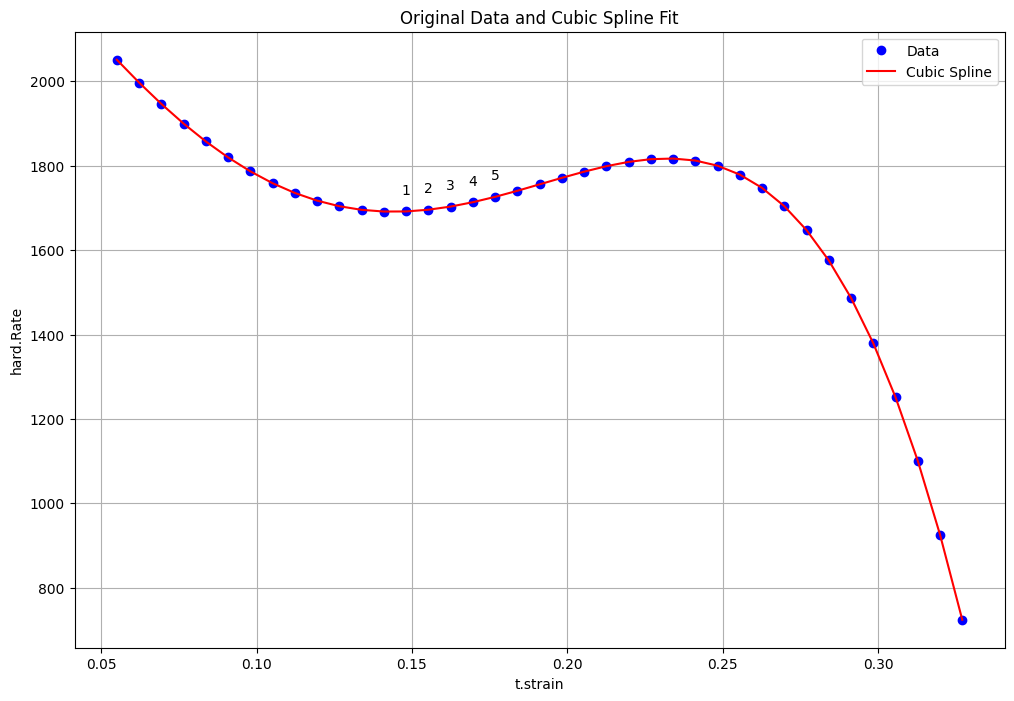


Minimum Slope: 305.4030429794096
Maximum Slope: 1902.2073193954743
Finding best parameters...
Plotting comparison...


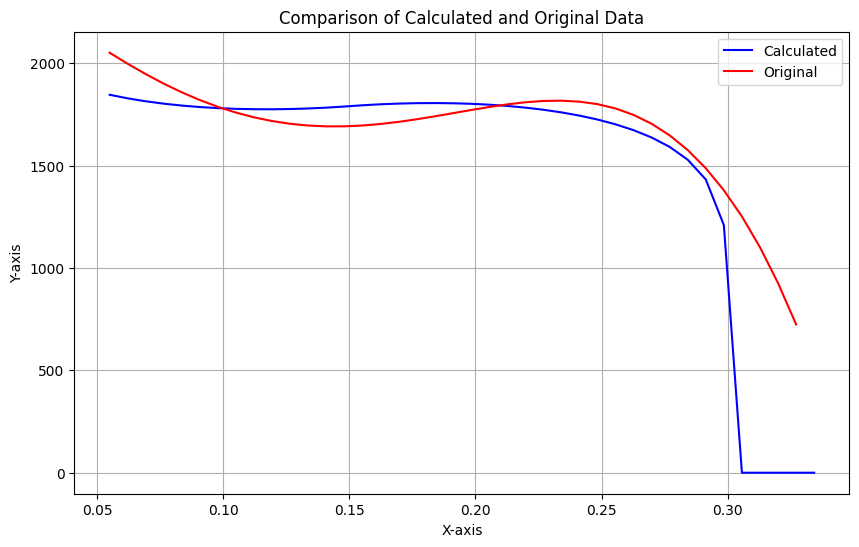

Extracting text and finding lemmas...
Finding max size chemical composition...

['CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'C2HAADFC', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNi', 'CrMnFeCoNi', 'CrFeCoNi', 'CrFeCoNiPd', 'CrFeCoNi', 'CrMnFeCoNi', 'CrFeCoNi', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrFeCoNiPd', 'CrFeCoNiPd', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CrMnFeCoNi', 'CoCrFeMnNi', 'CoCrFeNiMo', 'CoCrFeNiAl0', 'CrMnFeCoNi', 'CrF

In [61]:
# Loop through each folder in the data directory
for folder_name in os.listdir(data_directory):
    folder_path = os.path.join(data_directory, folder_name)

    # Check if the item in the directory is a folder
    if os.path.isdir(folder_path):
        print(f"\nPROCESSING FOLDER: {folder_name}")

        # Extract the file paths for the Excel and PDF files
        excel_file = None
        pdf_file = None
        text_file = None  # Variable to store the path of the text file

        # Loop through the files in the folder
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Check if the file is an Excel file
            if file_name.endswith(".xlsx"):
                excel_file = file_path

            # Check if the file is a PDF file
            elif file_name.endswith(".pdf"):
                pdf_file = file_path

            # Check if the file is a text file
            elif file_name.endswith(".txt"):
                text_file = file_path

        # Ensure both Excel and PDF files are found and handle the case if text_file is None
        if excel_file and pdf_file:
            print(f"Found Excel file: {excel_file}")
            print(f"Found PDF file: {pdf_file}")
            if text_file:
                print(f"Found text file: {text_file}")

                # Read the link from the text file
                with open(text_file, 'r') as txt_file:
                    link = txt_file.read().strip()  # Assuming the link is on the first line and there's no leading/trailing whitespace
            else:
                print("No text file found. Ignoring link.")
                link = None  # Set link to None if no text file is found

            # Read Excel data
            data = pd.read_excel(excel_file, usecols=[0, 1, 2])
            x_axis = data.columns[0]  # First column as x_axis - strain
            y1_axis = data.columns[1]  # Second column as y1_axis - stress
            y2_axis = data.columns[2]  # Third column as y2_axis - harding rate

            # Update global variables with file paths and column names
            file_path = excel_file
            pdf_file_path = pdf_file

            # Call the method and store the returned values
            analysis_results = analyze_pdf_data(file_path, pdf_file_path, keywords, x_axis, y2_axis, k_value)

            # Prepare the new details dictionary with the returned values
            new_details = {
                "title": folder_name,
                "b0": analysis_results["best_b0"],
                "d1": analysis_results["best_d1"],
                "d2": analysis_results["best_d2"],
                "ei": analysis_results["best_ei"],
                "ee": ee,
                "lemma": analysis_results["all_lemmas"],
                "composition": analysis_results["element_dict"],
                "link": link,
            }

            json_file_path = "data.json"
            update_json_data(json_file_path, new_details)

            print("JSON DATA SAVED.\n")
        else:
            print("Error: Both Excel and PDF files are required in each folder.")
    else:
        print(f"Skipping file: {folder_name}, it is not a folder.")
